In [260]:
# Imports
import warnings
warnings.filterwarnings('ignore')

# Section 1 
import numpy as np 
import pandas as pd 
from scipy.stats import norm
import matplotlib
import matplotlib.pyplot as plt 
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.api import VAR
import copy

# Section 2
from sklearn import linear_model
from scipy.stats import pearsonr, iqr
from sklearn.decomposition import PCA

# Section 3
from scipy.stats import iqr
from scipy.optimize import minimize

# Section 4 
import seaborn as sns
from scipy.stats import median_abs_deviation
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_squared_error

# Section 5
import networkx as nx
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

# Data folder
data_path = "Data/"

## 1. Regression Methods

### 1.1 Processing stock price data in Python


#### 1.1.1 Logarithmic Prices

In [253]:
# Import and format price data.
px = pd.read_csv(data_path + "priceData.csv", index_col=0)
px = px.dropna()

# Log-prices.
logpx = np.log(px)

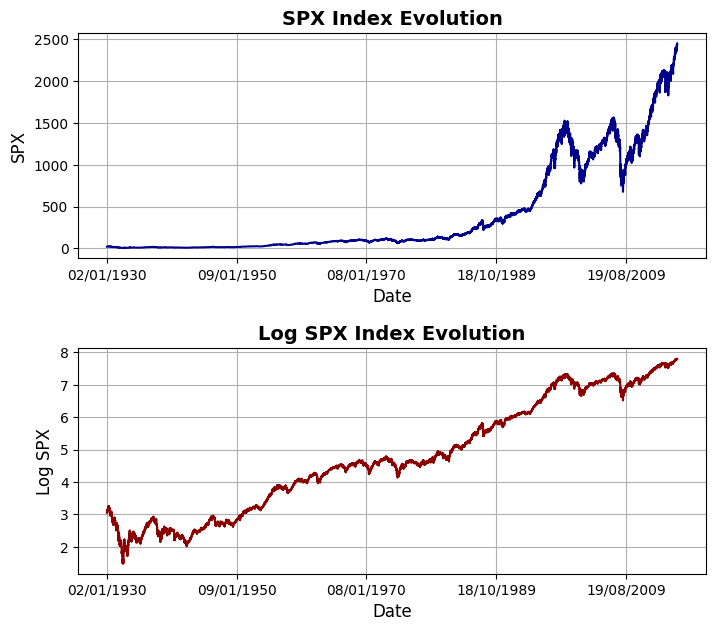

In [254]:
# plot prices and log-prices
fig, axs = plt.subplots(2)
fig.set_figheight(6)
fig.set_figwidth(7)  
fig.tight_layout()
fig.subplots_adjust(hspace = 0.4, wspace = 0.6)

# prices subplot 
px.plot( ax = axs[0],color ='darkblue', linewidth = 1.5, alpha = 1)
axs[0].set_xlabel('Date', fontsize = 12, fontweight = 'normal')
axs[0].set_ylabel('SPX', fontsize = 12, fontweight = 'normal')
axs[0].set_title('SPX Index Evolution', fontsize = 14, fontweight = 'bold')
#axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=20, horizontalalignment='right')
axs[0].legend().remove()
axs[0].grid(visible = True)

# log-prices subplot 
logpx.plot(ax=axs[1], color = 'darkred', linewidth = 1.5)
axs[1].set_xlabel('Date', fontsize = 12, fontweight = 'normal')
axs[1].set_ylabel('Log SPX', fontsize = 12, fontweight = 'normal')
axs[1].set_title('Log SPX Index Evolution', fontsize = 14, fontweight = 'bold')
#axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=20, horizontalalignment='right')
axs[1].legend().remove()
axs[1].grid(visible = True)

# Save figure
fig.savefig(('Section 1/1_1_1_index_evolution.pdf'), bbox_inches='tight')


#### 1.1.2 Stationarity analysis using rolling statistics

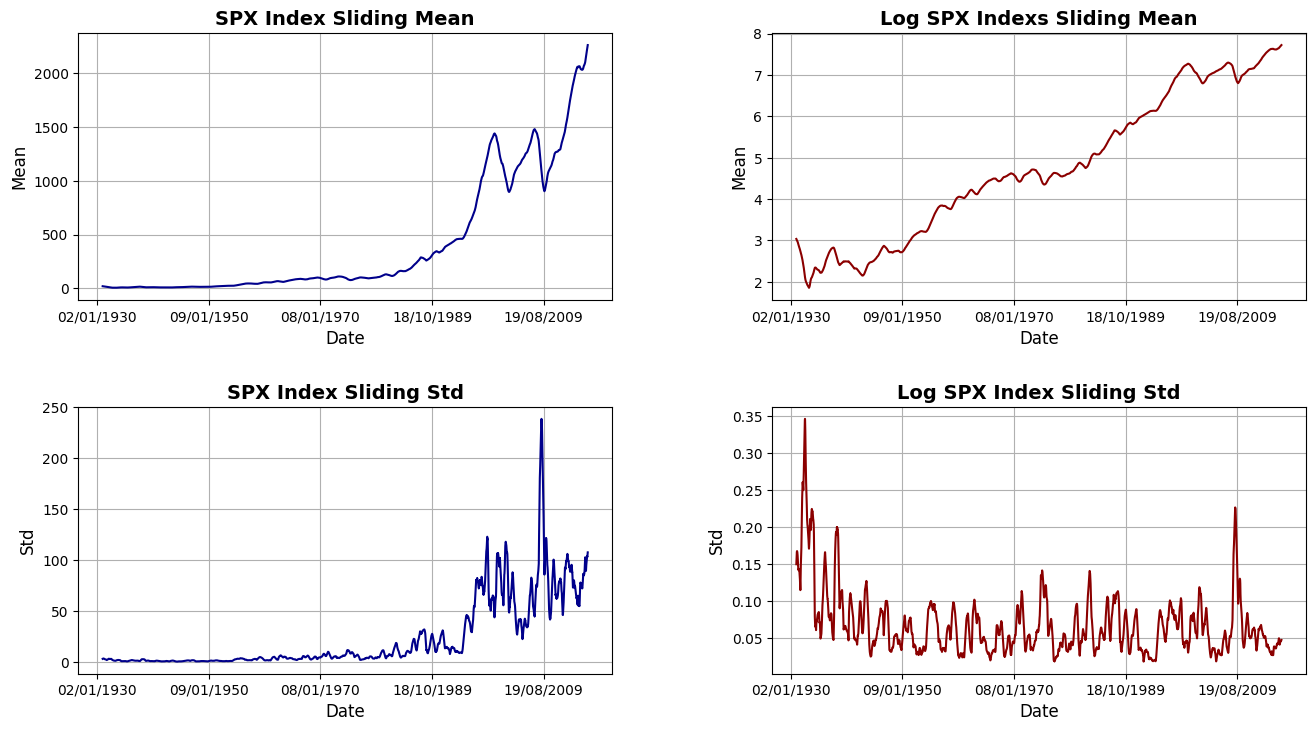

In [255]:
# Define sliding window size.
w = 252

fig, axs = plt.subplots(2,2)
fig.set_figheight(7)
fig.set_figwidth(13)  
fig.tight_layout()
fig.subplots_adjust(hspace = 0.4, wspace = 0.3)

# prices sliding mean subplot 
px.rolling(w).mean().plot(ax = axs[0][0],color ='darkblue', linewidth = 1.5, alpha = 1)
axs[0][0].set_xlabel('Date', fontsize = 12, fontweight = 'normal')
axs[0][0].set_ylabel('Mean', fontsize = 12, fontweight = 'normal')
axs[0][0].set_title('SPX Index Sliding Mean', fontsize = 14, fontweight = 'bold')
#axs[0][0].set_xticklabels(axs[0][0].get_xticklabels(), rotation=20, horizontalalignment='right')
axs[0][0].legend().remove()
axs[0][0].grid(visible = True)

# prices sliding std subplot 
px.rolling(w).std().plot(ax=axs[1][0], color = 'darkblue', linewidth = 1.5)
axs[1][0].set_xlabel('Date', fontsize = 12, fontweight = 'normal')
axs[1][0].set_ylabel('Std', fontsize = 12, fontweight = 'normal')
axs[1][0].set_title('SPX Index Sliding Std', fontsize = 14, fontweight = 'bold')
#axs[1][0].set_xticklabels(axs[1][0].get_xticklabels(), rotation=20, horizontalalignment='right')
axs[1][0].legend().remove()
axs[1][0].grid(visible = True)


# log-prices sliding mean subplot 
logpx.rolling(w).mean().plot(ax = axs[0][1],color ='darkred', linewidth = 1.5, alpha = 1)
axs[0][1].set_xlabel('Date', fontsize = 12, fontweight = 'normal')
axs[0][1].set_ylabel('Mean', fontsize = 12, fontweight = 'normal')
axs[0][1].set_title('Log SPX Indexs Sliding Mean', fontsize = 14, fontweight = 'bold')
#axs[0][1].set_xticklabels(axs[0][1].get_xticklabels(), rotation=20, horizontalalignment='right')
axs[0][1].legend().remove()
axs[0][1].grid(visible = True)

# log-prices sliding std subplot 
logpx.rolling(w).std().plot( ax = axs[1][1],color ='darkred', linewidth = 1.5, alpha = 1)
axs[1][1].set_xlabel('Date', fontsize = 12, fontweight = 'normal')
axs[1][1].set_ylabel('Std', fontsize = 12, fontweight = 'normal')
axs[1][1].set_title('Log SPX Index Sliding Std', fontsize = 14, fontweight = 'bold')
#axs[1][1].set_xticklabels(axs[1][1].get_xticklabels(), rotation=20, horizontalalignment='right')
axs[1][1].legend().remove()
axs[1][1].grid(visible = True)

# Save figure
fig.savefig(('Section 1/1_1_2_rolling_statistics.pdf'), bbox_inches='tight')


#### 1.1.3 Simple and log return 

In [257]:
# simple returns
simp_ret = px.pct_change() 
# log-returns
log_ret = logpx.diff()

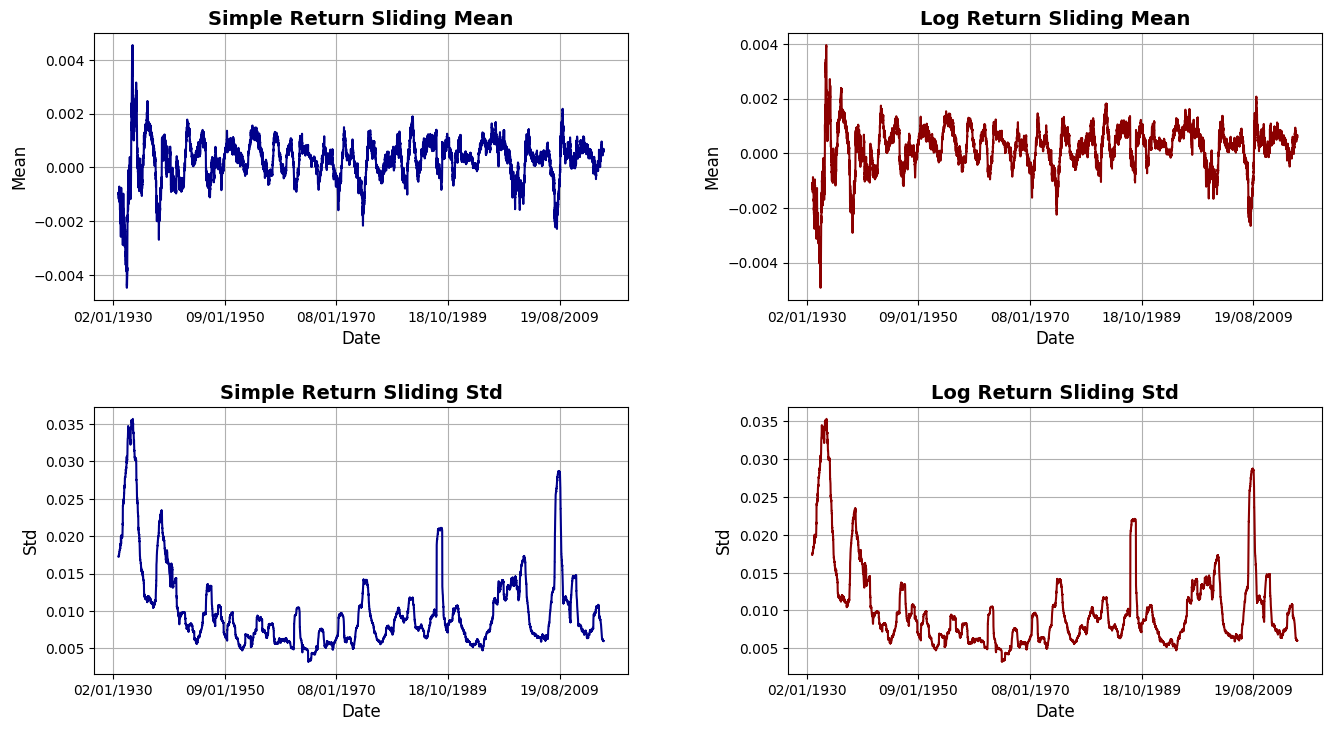

In [258]:
fig, axs = plt.subplots(2,2)
fig.set_figheight(7)
fig.set_figwidth(13)  
fig.tight_layout()
fig.subplots_adjust(hspace = 0.4, wspace = 0.3)

# Simple return sliding mean subplot 
simp_ret.rolling(w).mean().plot(ax = axs[0][0],color ='darkblue', linewidth = 1.5, alpha = 1)
axs[0][0].set_xlabel('Date', fontsize = 12, fontweight = 'normal')
axs[0][0].set_ylabel('Mean', fontsize = 12, fontweight = 'normal')
axs[0][0].set_title('Simple Return Sliding Mean', fontsize = 14, fontweight = 'bold')
#axs[0][0].set_xticklabels(axs[0][0].get_xticklabels(), rotation=20, horizontalalignment='right')
axs[0][0].legend().remove()
axs[0][0].grid(visible = True)

# Simple Return sliding std subplot 
simp_ret.rolling(w).std().plot(ax=axs[1][0], color = 'darkblue', linewidth = 1.5)
axs[1][0].set_xlabel('Date', fontsize = 12, fontweight = 'normal')
axs[1][0].set_ylabel('Std', fontsize = 12, fontweight = 'normal')
axs[1][0].set_title('Simple Return Sliding Std', fontsize = 14, fontweight = 'bold')
#axs[1][0].set_xticklabels(axs[1][0].get_xticklabels(), rotation=20, horizontalalignment='right')
axs[1][0].legend().remove()
axs[1][0].grid(visible = True)


# log-return sliding mean subplot 
log_ret.rolling(w).mean().plot(ax = axs[0][1],color ='darkred', linewidth = 1.5, alpha = 1)
axs[0][1].set_xlabel('Date', fontsize = 12, fontweight = 'normal')
axs[0][1].set_ylabel('Mean', fontsize = 12, fontweight = 'normal')
axs[0][1].set_title('Log Return Sliding Mean', fontsize = 14, fontweight = 'bold')
#axs[0][1].set_xticklabels(axs[0][1].get_xticklabels(), rotation=20, horizontalalignment='right')
axs[0][1].legend().remove()
axs[0][1].grid(visible = True)

# log-return sliding std subplot 
log_ret.rolling(w).std().plot( ax = axs[1][1],color ='darkred', linewidth = 1.5, alpha = 1)
axs[1][1].set_xlabel('Date', fontsize = 12, fontweight = 'normal')
axs[1][1].set_ylabel('Std', fontsize = 12, fontweight = 'normal')
axs[1][1].set_title('Log Return Sliding Std', fontsize = 14, fontweight = 'bold')
#axs[1][1].set_xticklabels(axs[1][1].get_xticklabels(), rotation=20, horizontalalignment='right')
axs[1][1].legend().remove()
axs[1][1].grid(visible = True)

# Save figure
fig.savefig(('Section 1/1_1_3_rolling_statistics.pdf'), bbox_inches='tight')

#### 1.1.4 Suitability of log-returns and “Jarque-Bera” test

In financial signal processing, log returns have several advantages over simple returns. Firstly, prices are considered to be log-normally distributed over short periods of time, therefore the log returns $r_t$ are assumed to be also normally distributed. Gaussian behavior has a fundamental mathematical advantage as many statistical and signal processing techniques assume it. Moreover, logarithms, as mathematical operations, offer numerical stability since additions of small-valued numbers to the argument don't have significant effects, allow for easier manipulation of exponents with calculus and posses the time additive property. It is possible to observe the gaussian-like behaviour of returns from the simple and log return distribution plots below. 

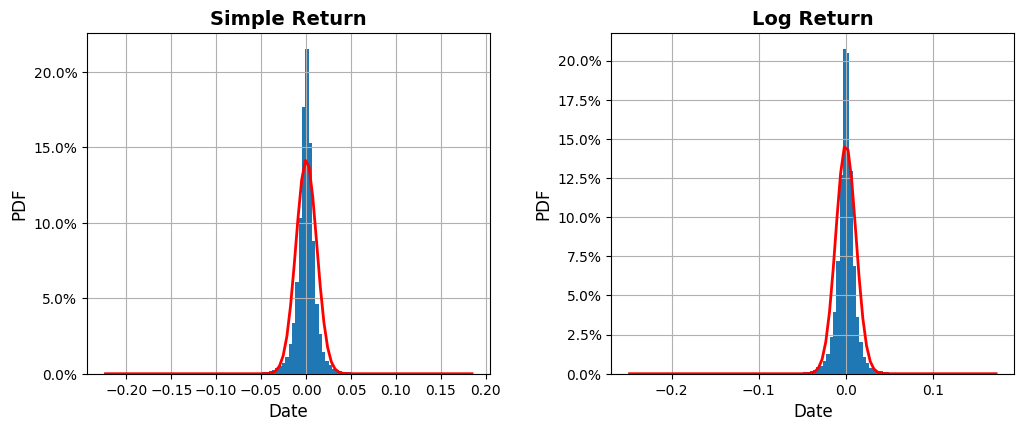

In [261]:
def mypdf(data, ax, bins):
        # Get pdf parameters.
    (mu, std) = norm.fit(data)
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    p = p / sum(p) * (100 / bins)

    return x, p


# plot prices and log-prices
fig, axs = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(10)  
fig.tight_layout()
fig.subplots_adjust(hspace = 0.6, wspace = 1)

bins = 100

# simple return subplot 
simp_ret = simp_ret.dropna()
weights = np.ones_like(simp_ret)/float(len(simp_ret))
simp_ret.hist( ax = axs[0], bins=bins, weights = weights)
x, p =  mypdf(simp_ret, axs[0], bins)

axs[0].plot(x, p, linewidth = 2, color = 'red')
vals = axs[0].get_yticks()
axs[0].set_yticklabels(['{:,.1%}'.format(x) for x in vals])
axs[0].set_xlabel('Date', fontsize = 12, fontweight = 'normal')
axs[0].set_ylabel('PDF', fontsize = 12, fontweight = 'normal')
axs[0].set_title('Simple Return', fontsize = 14, fontweight = 'bold')
axs[0].grid(visible = True)


# log-return subplot 
log_ret = log_ret.dropna()
weights = np.ones_like(log_ret)/float(len(log_ret))
log_ret.hist(ax=axs[1], bins=bins, weights = weights)
x, p =  mypdf(log_ret, axs[1], bins)

axs[1].plot(x, p, linewidth = 2, color = 'red')
vals = axs[1].get_yticks()
axs[1].set_yticklabels(['{:,.1%}'.format(x) for x in vals])
axs[1].set_xlabel('Date', fontsize = 12, fontweight = 'normal')
axs[1].set_ylabel('PDF', fontsize = 12, fontweight = 'normal')
axs[1].set_title('Log Return', fontsize = 14, fontweight = 'bold')
axs[1].grid(visible = True)

# Save figure
fig.savefig(('Section 1/1_1_4_simple_log_return_hist.pdf'), bbox_inches='tight')

In [262]:
# return the Jarque−Bera test p−value for a time−series x 
x = [i for i in range (100, len(log_ret.dropna()), 100)]
log_JB = [stats.jarque_bera(log_ret.dropna()[:i]) for i in x]

x = [i for i in range (100, len(simp_ret.dropna()), 100)]
simp_JB = [stats.jarque_bera(simp_ret.dropna()[:i]) for i in x]

In order to test for Gaussianity on the data, the “Jarque-Bera” goodness-of-fit test can be used. This test checks whether the sample data have skewness (asymmetry of the distribution) and kurtosis - tailedness/shape of the curve: heavy-tailed or light-tailed - matching a normal distribution i.e. zero skewness and kurtosis equal to 3. As the number of samples increases, the log returns deviate more slowly from gaussianity compared to simple returns, thus showing a more Gaussian behaviour. 

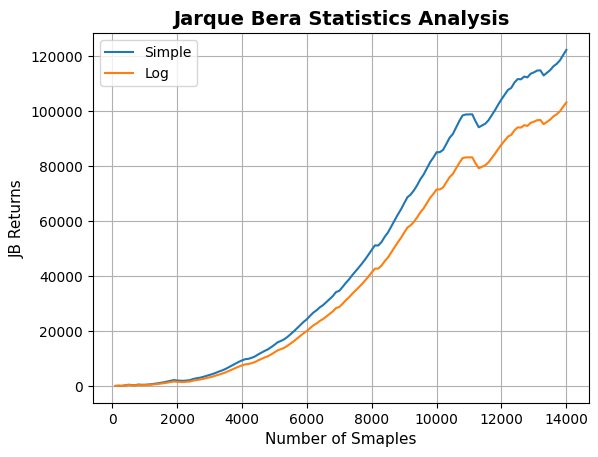

In [263]:
fig = plt.figure()
plt.rcParams['figure.figsize'] = [9, 4]

simp_JB_stat = [x[0] for x in simp_JB]
log_JB_stat = [x[0] for x in log_JB]

plt.plot(x[:140], np.array(simp_JB_stat[:140]), label="Simple")
plt.plot(x[:140], np.array(log_JB_stat[:140]), label="Log")

plt.xlabel('Number of Smaples', fontsize = 11, fontweight = 'normal')
plt.ylabel('JB Returns', fontsize = 11, fontweight = 'normal')
plt.title('Jarque Bera Statistics Analysis', fontsize = 14, fontweight = 'bold')
plt.legend()
plt.grid(visible = True)
plt.show()

# Save figure
fig.savefig(('Section 1/1_1_4_JB_stats.pdf'), bbox_inches='tight')

In [264]:
simp_JB, p_simp = stats.jarque_bera(simp_ret.dropna())
log_JB , p_log  = stats.jarque_bera(log_ret.dropna())

print('JB statistic for simple returns = ', simp_JB)
print('p-value = ', p_simp)
print('\n')
print('JB statistic for log returns = ', log_JB)
print('p-value = ', p_log)


JB statistic for simple returns =  257540.06493683602
p-value =  0.0


JB statistic for log returns =  309277.64126696053
p-value =  0.0


#### 1.1.5 Simple and log return for Stock Purchase example

*You purchase a stock for £1. The next day its value goes up to £2 and the following day back to £1. What are the simple and logarithmic returns over this period and what can you conclude about logarithmic returns on the basis of this example?*

After the first day, the simple return would be $100\%$ and the log return would be $69\%$ while the following day, the simple return would now go down $50\%$ and the log return would be $-69\%$. 

It is possible to see that while the value of the stock has not changed as it returned to 1, the sum of the simple returns does not add to zero $(1 - 0.5 \neq 0)$. However, the sum of the logarithmic returns gives zero $(0.69 - 0.69 = 0)$ due to the time additive property of logarithms, hence providing an insight that the asset did not change in value.

Therefore, the above example shows the advantage of using log-returns as a metric for describing the changes in the value of financial assets over time.


In [150]:
expl = pd.Series([1,2,1])

simp_ret = expl.pct_change()[1:].values
log_ret = np.log(expl).diff()[1:].values

print('Simple Return Day 1 = ', simp_ret[0])
print('Log Return Day 1 = ', log_ret[0])
print('\n')
print('Simple Return Day 2 = ', simp_ret[1])
print('Log Return Day 2 = ', log_ret[1])

Simple Return Day 1 =  1.0
Log Return Day 1 =  0.6931471805599453


Simple Return Day 2 =  -0.5
Log Return Day 2 =  -0.6931471805599453


#### 1.1.6 Adavantages of simple return over log return

In certain circumstances, log returns are less suitable than simple returns:

* Firstly, the log-normality property vanishes over long-time periods. Log-normal distributions are assumed to be positively skewed but in reality, most financial time series might be negatively skewed due to financial crashes, therefore for long-term analysis it may not be suitable.

* Moreover, log-returns are not linearly additive across assets whereas simple returns are, thus making them more suitable when calculating the overall return of a  multi-asset portfolio

### 1.2 ARMA vs. ARIMA Models for Financial Applications



#### 1.2.1  Suitability of ARMA and ARIMA models


Both ARMA and ARIMA models are composed of Autoregressive (AR) and Moving Average (MA) components. An autoregressive model forecasts attempt future values based on past behavior data in a stationary time series, while a moving average model attempts to forecast future behavior based on past prediction errors. ARMA is the combination of the AR and MA models while ARIMA applies an extra integration step that removes elements of non-stationarity by differentiating.

In [265]:
snp = pd.read_csv(data_path + 'snp_500_2015_2019.csv', index_col=0)
snp_close = snp['Close'].to_frame().apply(np.log)

<Figure size 900x400 with 0 Axes>

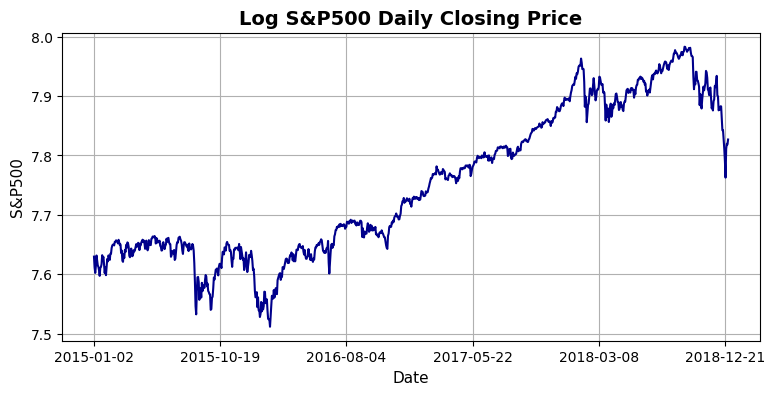

In [266]:
fig = plt.figure()
plt.rcParams['figure.figsize'] = [9, 4]

fig = snp_close.plot( color ='darkblue', linewidth = 1.5, alpha = 1).get_figure()
plt.xlabel('Date', fontsize = 11, fontweight = 'normal')
plt.ylabel('S&P500', fontsize = 11, fontweight = 'normal')
plt.title('Log S&P500 Daily Closing Price', fontsize = 14, fontweight = 'bold')
plt.legend().remove()
plt.grid(visible = True)
plt.show()

# Save figure
fig.savefig(('Section 1/1_2_1_closing_log_price.pdf'), bbox_inches='tight')

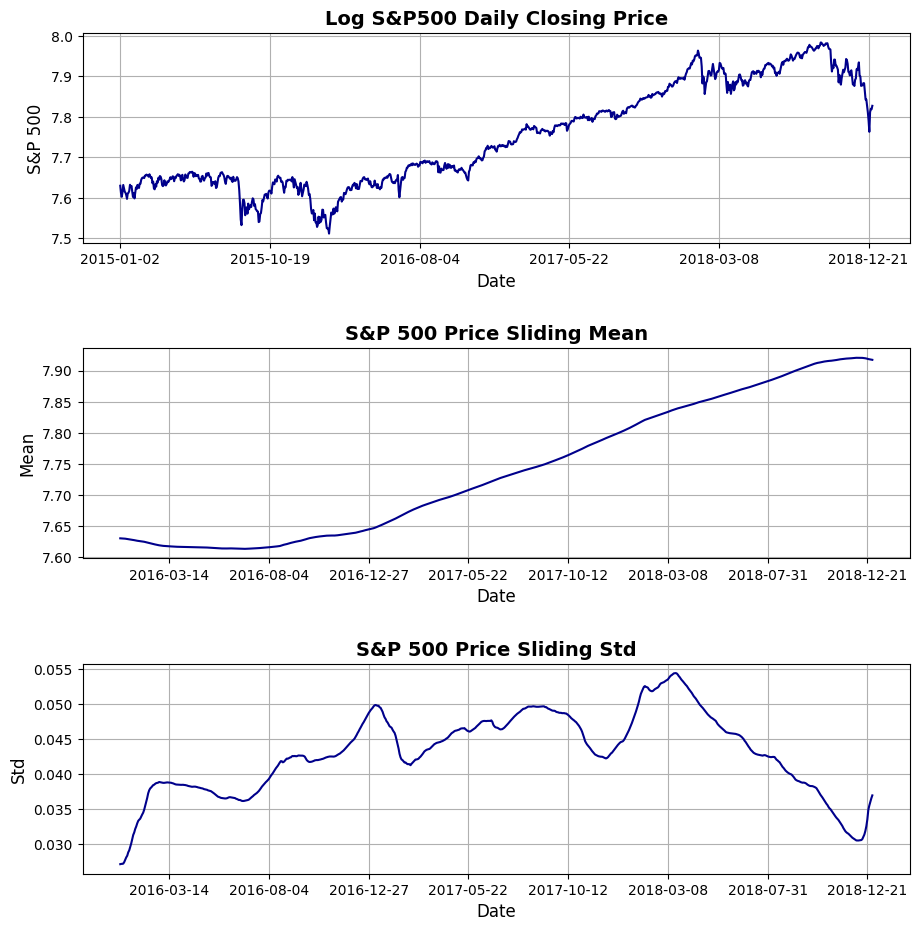

In [267]:
# window size.
w = 252 

# Initialise subplot.
fig, axs = plt.subplots(3,1)
fig.set_figheight(9)
fig.set_figwidth(9)  
fig.tight_layout()
fig.subplots_adjust(hspace = 0.5, wspace = 0.5)

# Log S&P 500 Price subplot
snp_close.plot(ax = axs[0], color ='darkblue', linewidth = 1.5, alpha = 1)
axs[0].set_xlabel('Date', fontsize = 12, fontweight = 'normal')
axs[0].set_ylabel('S&P 500', fontsize = 12, fontweight = 'normal')
axs[0].set_title('Log S&P500 Daily Closing Price', fontsize = 14, fontweight = 'bold')
#axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=20, horizontalalignment='right')
axs[0].legend().remove()
axs[0].grid(visible = True)

# S&P 500 Price sliding mean subplot 
snp_close.rolling(w).mean().plot(ax = axs[1],color ='darkblue', linewidth = 1.5, alpha = 1)
axs[1].set_xlabel('Date', fontsize = 12, fontweight = 'normal')
axs[1].set_ylabel('Mean', fontsize = 12, fontweight = 'normal')
axs[1].set_title('S&P 500 Price Sliding Mean', fontsize = 14, fontweight = 'bold')
#axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=20, horizontalalignment='right')
axs[1].legend().remove()
axs[1].grid(visible = True)

# S&P 500 Price sliding std subplot 
snp_close.rolling(w).std().plot(ax=axs[2], color = 'darkblue', linewidth = 1.5)
axs[2].set_xlabel('Date', fontsize = 12, fontweight = 'normal')
axs[2].set_ylabel('Std', fontsize = 12, fontweight = 'normal')
axs[2].set_title('S&P 500 Price Sliding Std', fontsize = 14, fontweight = 'bold')
#axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=20, horizontalalignment='right')
axs[2].legend().remove()
axs[2].grid(visible = True)

# Save figure
fig.savefig(('Section 1/1_2_1_S&P500_stats.pdf'), bbox_inches='tight')

#### 1.2.2 ARMA (1, 0) Model

In [268]:
with warnings.catch_warnings(record=True):
    # Define days range to zoom in.
    days = range(400,500)

    # Retrieve s&p data for ARMA model.
    snp_arma = copy.deepcopy(snp_close)
    snp_arma.columns = ['True']

    # model summary
    print(ARIMA(snp_arma['True'], order=(1,0,0)).fit().summary())

    # Find the residual fitting the model and calculate the prediction.
    snp_arma['Res'] = ARIMA(snp_arma['True'].values, order=(1, 0, 0)).fit().resid
    snp_arma['Prediction'] = snp_arma['True'] - snp_arma['Res']

                               SARIMAX Results                                
Dep. Variable:                   True   No. Observations:                 1006
Model:                 ARIMA(1, 0, 0)   Log Likelihood                3352.696
Date:                Fri, 12 May 2023   AIC                          -6699.392
Time:                        13:24:26   BIC                          -6684.651
Sample:                             0   HQIC                         -6693.791
                               - 1006                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7489      0.079     98.290      0.000       7.594       7.903
ar.L1          0.9974      0.002    520.016      0.000       0.994       1.001
sigma2      7.422e-05   1.99e-06     37.368      0.0

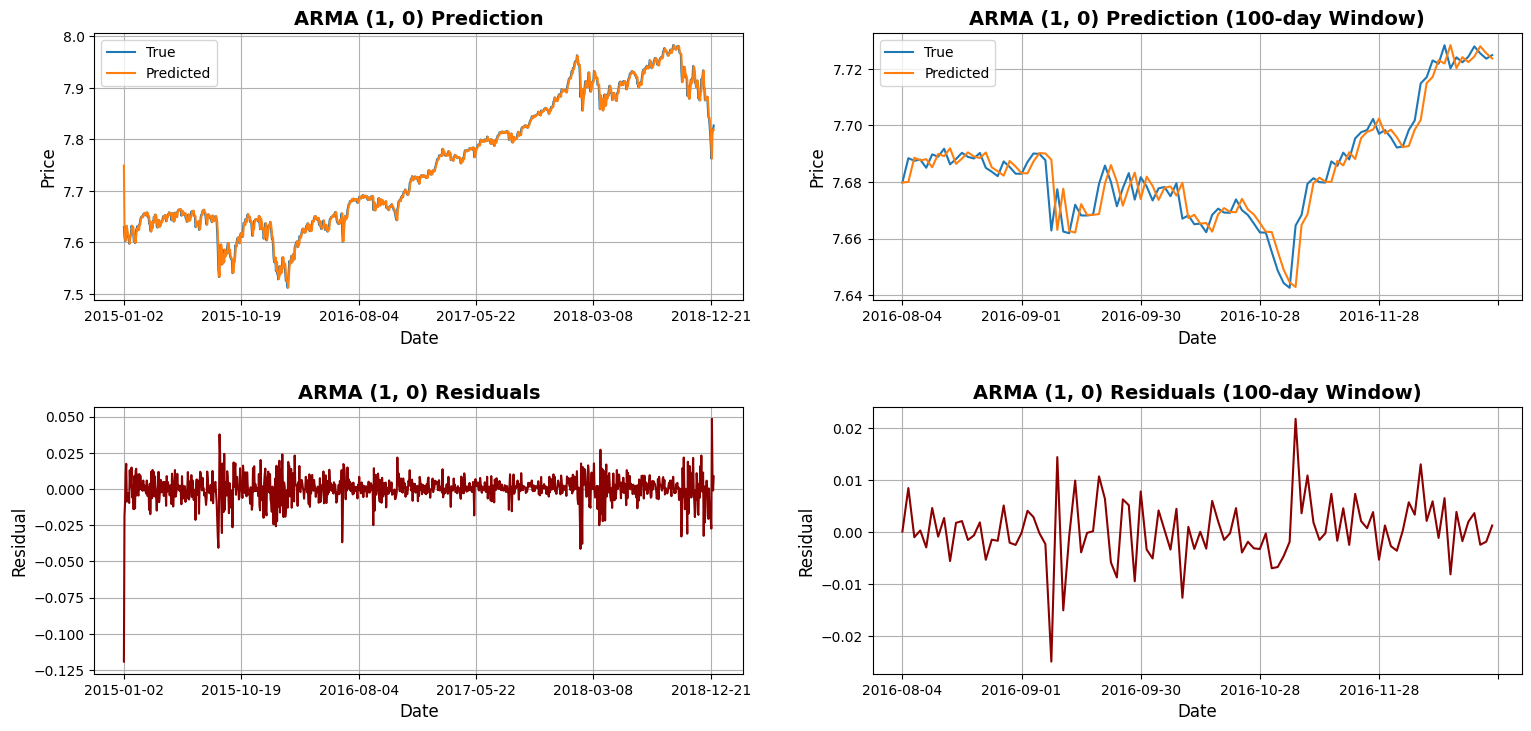

In [269]:
fig, axs = plt.subplots(2,2)
fig.set_figheight(7)
fig.set_figwidth(15)  
fig.tight_layout()
fig.subplots_adjust(hspace = 0.4, wspace = 0.2)

# ARMA Prediction vs true prices
snp_arma['True'].plot( ax = axs[0][0], linewidth = 1.5, label = "True")
snp_arma['Prediction'].plot( ax = axs[0][0], linewidth = 1.5, label = "Predicted")
axs[0][0].set_xlabel('Date', fontsize = 12, fontweight = 'normal')
axs[0][0].set_ylabel('Price', fontsize = 12, fontweight = 'normal')
axs[0][0].set_title('ARMA (1, 0) Prediction', fontsize = 14, fontweight = 'bold')
axs[0][0].legend()
axs[0][0].grid(visible = True)

# ARMA Residuals 
snp_arma['Res'].plot(ax=axs[1][0], color = 'darkred', linewidth = 1.5)
axs[1][0].set_xlabel('Date', fontsize = 12, fontweight = 'normal')
axs[1][0].set_ylabel('Residual', fontsize = 12, fontweight = 'normal')
axs[1][0].set_title('ARMA (1, 0) Residuals', fontsize = 14, fontweight = 'bold')
axs[1][0].legend().remove()
axs[1][0].grid(visible = True)


# ARMA Prediction vs true prices (100-day Window)
snp_arma['True'][days].plot( ax = axs[0][1], linewidth = 1.5, label = "True")
snp_arma['Prediction'][days].plot( ax = axs[0][1], linewidth = 1.5, label = "Predicted")
axs[0][1].set_xlabel('Date', fontsize = 12, fontweight = 'normal')
axs[0][1].set_ylabel('Price', fontsize = 12, fontweight = 'normal')
axs[0][1].set_title('ARMA (1, 0) Prediction (100-day Window)', fontsize = 14, fontweight = 'bold')
axs[0][1].legend()
axs[0][1].grid(visible = True)

# ARMA Residuals (100-day Window)
snp_arma['Res'][days].plot(ax=axs[1][1], color = 'darkred', linewidth = 1.5)
axs[1][1].set_xlabel('Date', fontsize = 12, fontweight = 'normal')
axs[1][1].set_ylabel('Residual', fontsize = 12, fontweight = 'normal')
axs[1][1].set_title('ARMA (1, 0) Residuals (100-day Window)', fontsize = 14, fontweight = 'bold')
axs[1][1].legend().remove()
axs[1][1].grid(visible = True)

# Save figure
fig.savefig(('Section 1/1_2_2_ARMA(1,0)_model.pdf'), bbox_inches='tight')

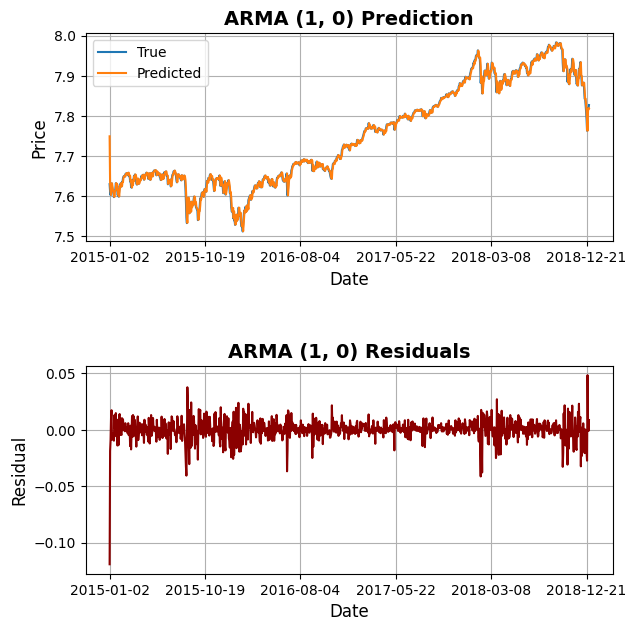

In [270]:
# plot prices and log-prices
fig, axs = plt.subplots(2)
fig.set_figheight(6)
fig.set_figwidth(6)  
fig.tight_layout()
fig.subplots_adjust(hspace = 0.6, wspace = 0.5)

# prices subplot 
snp_arma['True'].plot( ax = axs[0], linewidth = 1.5, label = "True")
snp_arma['Prediction'].plot( ax = axs[0], linewidth = 1.5, label = "Predicted")
axs[0].set_xlabel('Date', fontsize = 12, fontweight = 'normal')
axs[0].set_ylabel('Price', fontsize = 12, fontweight = 'normal')
axs[0].set_title('ARMA (1, 0) Prediction', fontsize = 14, fontweight = 'bold')
axs[0].legend()
axs[0].grid(visible = True)

# log-prices subplot 
snp_arma['Res'].plot(ax=axs[1], color = 'darkred', linewidth = 1.5)
axs[1].set_xlabel('Date', fontsize = 12, fontweight = 'normal')
axs[1].set_ylabel('Residual', fontsize = 12, fontweight = 'normal')
axs[1].set_title('ARMA (1, 0) Residuals', fontsize = 14, fontweight = 'bold')
axs[1].legend().remove()
axs[1].grid(visible = True)

# Save figure
fig.savefig(('Section 1/1_2_2_ARMA(1,0)_prediction.pdf'), bbox_inches='tight')

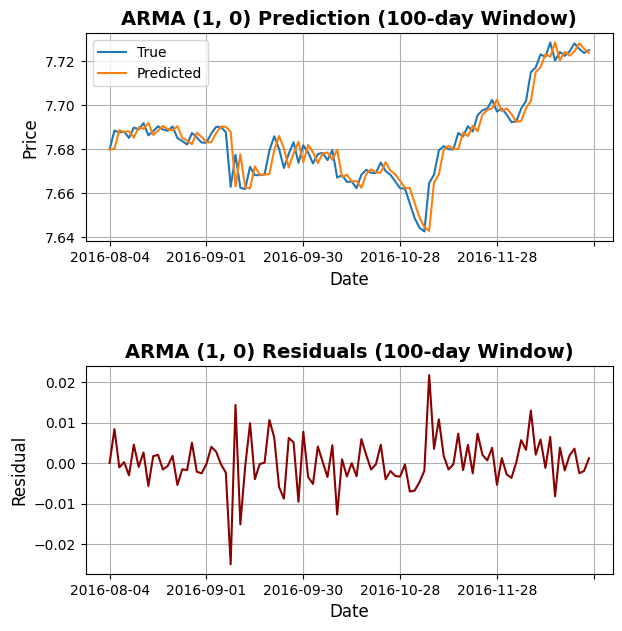

In [272]:
# plot prices and log-prices
fig, axs = plt.subplots(2)
fig.set_figheight(6)
fig.set_figwidth(6)  
fig.tight_layout()
fig.subplots_adjust(hspace = 0.6, wspace = 0.5)

# prices subplot 
snp_arma['True'][days].plot( ax = axs[0], linewidth = 1.5, label = "True")
snp_arma['Prediction'][days].plot( ax = axs[0], linewidth = 1.5, label = "Predicted")
axs[0].set_xlabel('Date', fontsize = 12, fontweight = 'normal')
axs[0].set_ylabel('Price', fontsize = 12, fontweight = 'normal')
axs[0].set_title('ARMA (1, 0) Prediction (100-day Window)', fontsize = 14, fontweight = 'bold')
axs[0].legend()
axs[0].grid(visible = True)

# log-prices subplot 
snp_arma['Res'][days].plot(ax=axs[1], color = 'darkred', linewidth = 1.5)
axs[1].set_xlabel('Date', fontsize = 12, fontweight = 'normal')
axs[1].set_ylabel('Residual', fontsize = 12, fontweight = 'normal')
axs[1].set_title('ARMA (1, 0) Residuals (100-day Window)', fontsize = 14, fontweight = 'bold')
axs[1].legend().remove()
axs[1].grid(visible = True)

# Save figure
fig.savefig(('Section 1/1_2_2_ARMA(1,0)_prediction_zoom.pdf'), bbox_inches='tight')

In [273]:
with warnings.catch_warnings(record=True):
    model_arma =  ARIMA(snp_arma['True'] , order = (1,0,0)).fit()
    print(model_arma.params)
    print('\n')
    print('Model Coefficient: ', model_arma.arparams)

const     7.748867
ar.L1     0.997354
sigma2    0.000074
dtype: float64


Model Coefficient:  [0.99735438]


In [275]:
ARMA_mae = abs(snp_arma['Res']).mean()
ARMA_rmse = np.sqrt(np.mean(snp_arma["Res"]**2))
print('ARMA Mean Absolute Residual: ', ARMA_mae)
print('ARMA Root Mean Square Error: ', ARMA_rmse)

ARMA Mean Absolute Residual:  0.00598200561569962
ARMA Root Mean Square Error:  0.009396125149027722


#### 1.2.3 ARIMA (1, 1, 0) Model

In [276]:
import warnings

with warnings.catch_warnings(record=True):
    # Define days range to zoom in.
    days = range(400,500)

    # Retrieve s&p data for ARMA model.
    snp_arima = copy.deepcopy(snp_close)
    snp_arima.columns = ['True']

    # model summary
    print(ARIMA(snp_arima['True'], order=(1,1,0)).fit().summary())

    # Find the residual fitting the model and calculate the prediction.
    snp_arima['Res'] = ARIMA(snp_arima['True'].values, order=(1, 1, 0)).fit().resid
    snp_arima['Prediction'] = snp_arima['True'][1:] - snp_arima['Res']

                               SARIMAX Results                                
Dep. Variable:                   True   No. Observations:                 1006
Model:                 ARIMA(1, 1, 0)   Log Likelihood                3351.284
Date:                Fri, 12 May 2023   AIC                          -6698.568
Time:                        13:25:25   BIC                          -6688.743
Sample:                             0   HQIC                         -6694.835
                               - 1006                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0082      0.019     -0.426      0.670      -0.046       0.029
sigma2      7.424e-05   1.93e-06     38.401      0.000    7.04e-05     7.8e-05
Ljung-Box (L1) (Q):                   0.00   Jarque-

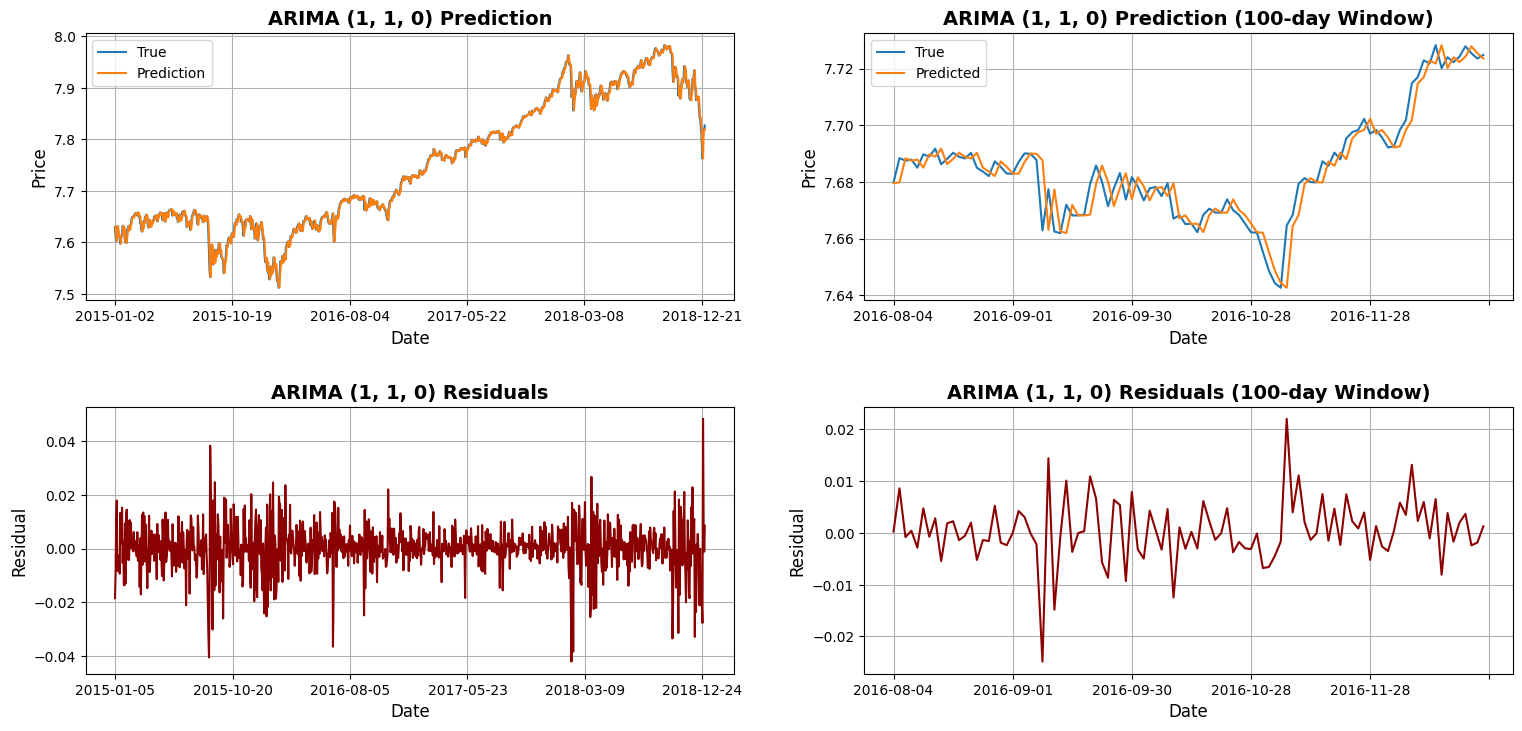

In [277]:
fig, axs = plt.subplots(2,2)
fig.set_figheight(7)
fig.set_figwidth(15)  
fig.tight_layout()
fig.subplots_adjust(hspace = 0.4, wspace = 0.2)

# ARMA Prediction vs true prices
snp_arima[['True', 'Prediction']].plot( ax = axs[0][0], linewidth = 1.5, label = "True")
#snp_arima['Prediction'].plot( ax = axs[0][0], linewidth = 1.5, label = "Predicted")
axs[0][0].set_xlabel('Date', fontsize = 12, fontweight = 'normal')
axs[0][0].set_ylabel('Price', fontsize = 12, fontweight = 'normal')
axs[0][0].set_title('ARIMA (1, 1, 0) Prediction', fontsize = 14, fontweight = 'bold')
axs[0][0].legend()
axs[0][0].grid(visible = True)

# ARMA Residuals 
snp_arima['Res'][1:].plot(ax=axs[1][0], color = 'darkred', linewidth = 1.5)
axs[1][0].set_xlabel('Date', fontsize = 12, fontweight = 'normal')
axs[1][0].set_ylabel('Residual', fontsize = 12, fontweight = 'normal')
axs[1][0].set_title('ARIMA (1, 1, 0) Residuals', fontsize = 14, fontweight = 'bold')
axs[1][0].legend().remove()
axs[1][0].grid(visible = True)


# ARMA Prediction vs true prices (100-day Window)
snp_arima['True'][days].plot( ax = axs[0][1], linewidth = 1.5, label = "True")
snp_arima['Prediction'][days].plot( ax = axs[0][1], linewidth = 1.5, label = "Predicted")
axs[0][1].set_xlabel('Date', fontsize = 12, fontweight = 'normal')
axs[0][1].set_ylabel('Price', fontsize = 12, fontweight = 'normal')
axs[0][1].set_title('ARIMA (1, 1, 0) Prediction (100-day Window)', fontsize = 14, fontweight = 'bold')
axs[0][1].legend()
axs[0][1].grid(visible = True)

# ARMA Residuals (100-day Window)
snp_arima['Res'][days].plot(ax=axs[1][1], color = 'darkred', linewidth = 1.5)
axs[1][1].set_xlabel('Date', fontsize = 12, fontweight = 'normal')
axs[1][1].set_ylabel('Residual', fontsize = 12, fontweight = 'normal')
axs[1][1].set_title('ARIMA (1, 1, 0) Residuals (100-day Window)', fontsize = 14, fontweight = 'bold')
axs[1][1].legend().remove()
axs[1][1].grid(visible = True)

# Save figure
fig.savefig(('Section 1/1_2_3_ARIMA(1,1,0)_model.pdf'), bbox_inches='tight')

In [278]:
with warnings.catch_warnings(record=True):
    model_arima =  ARIMA(snp_arima['True'] , order = (1,1,0)).fit()
    print(model_arima.params)
    print('\n')
    print('Model Coefficient: ', model_arima.arparams)

ar.L1    -0.008170
sigma2    0.000074
dtype: float64


Model Coefficient:  [-0.00816978]


In [279]:
ARIMA_mae = abs(snp_arima['Res'][1:]).mean()
ARIMA_rmse = np.sqrt(np.mean(snp_arima["Res"][1:]**2))
print('ARIMA Mean Absolute Residual: ', ARIMA_mae)
print('ARIMA Root Mean Square Error: ', ARIMA_rmse)

ARIMA Mean Absolute Residual:  0.0058548236753216305
ARIMA Root Mean Square Error:  0.008621037919608682


#### 1.2.4 ARIMA analysis with log-prices

For an ARIMA analysis, taking the log of prices allows to maximise the log returns by using logarithmic price changes. If the ARIMA modeling is conducted on linear price changes, the outcome would not be interpreted it as modeling simple returns. Therefore, the predictions would not describe the maximum profit. This is due to the mathematical properties of the logarithms, which allow for easier manipulation of data for modeling and eventually better results. 

### 1.3 Vector Autoregressive (VAR) Models

#### 1.3.1 Concise VAR matrix form


Vector Autoregressive Models, Var(p), are multivariate extentions of AR models, AR(p), and are given by 
\begin{equation}
\begin{aligned}
    \mathbf{y}_t &= \mathbf{c} + \mathbf{A}_1 \mathbf{y}_{t-1} + \mathbf{A}_2 \mathbf{y}_{t-2} + \dots + \mathbf{A}_p \mathbf{y}_{t-p} + \mathbf{e}_t \\
    &= \mathbf{c} + \sum_{i=1}^p \mathbf{A}_i \mathbf{y}_{t-i} + \mathbf{e}_t \\
\end{aligned}
\end{equation}

Where $\mathbf{c} \in \mathbb{R}^{k \times 1}$, $\mathbf{A}_i \in \mathbb{R}^{k \times k} ~\forall i$, $\mathbf{y}_n \in \mathbb{R}^{k \times 1} ~\forall n \in [t-1, t-p] $ and $\mathbf{e}_t \in \mathbb{R}^{k \times 1} ~\forall t$. This equation can also be extended in matrix form:

$$
\left[\begin{array}{c}
y_{1, t} \\
y_{2, t} \\
\vdots \\
y_{k, t}
\end{array}\right]=\left[\begin{array}{c}
c_1 \\
c_2 \\
\vdots \\
c_k
\end{array}\right]+\sum_{i=1}^p\left[\begin{array}{cccc}
a_{1,1}^i & a_{1,2}^i & \ldots & a_{1, k}^i \\
a_{2,1}^i & a_{2,2}^i & \ldots & a_{2, k}^i \\
\vdots & \vdots & \ddots & \vdots \\
a_{k, 1}^i & a_{2 k, 2}^i & \ldots & a_{k, k}^i
\end{array}\right]\left[\begin{array}{c}
y_{1, t-i} \\
y_{2, t-i} \\
\vdots \\
y_{k, t-i}
\end{array}\right]+\left[\begin{array}{c}
e_{1, t} \\
e_{2, t} \\
\vdots \\
e_{k, t}
\end{array}\right]
$$

This above equation can be represented in a concise matrix form as

$$
    \mathbf{Y} = \mathbf{B}\mathbf{Z} + \mathbf{U}
$$

where:

$$
\begin{gathered}
    \mathbf{Y} = \mathbf{y}_t \\
    \mathbf{B} = \begin{bmatrix} \mathbf{c} & \mathbf{A}_1 & \mathbf{A}_2 & \cdots & \mathbf{A}_p \end{bmatrix} \\
    \mathbf{Z} =  \begin{bmatrix} 1 \\ \mathbf{y}_{t-1} \\ \vdots \\ \mathbf{y}_{t-p} \end{bmatrix} \\
    \mathbf{U} = \mathbf{e}_t \\
\end{gathered}
$$

This representation can also be generalized for a multi-period case, where T time instances are modeled:
$$
\begin{aligned}
\mathbf{Y} & =\left[\begin{array}{lllll}
\mathbf{y}_t & \mathbf{y}_{t+1} & \mathbf{y}_{t+2} & \cdots & \mathbf{y}_{T}
\end{array}\right] \\
\mathbf{B} &= \begin{bmatrix} \mathbf{c} & \mathbf{A}_1 & \mathbf{A}_2 & \cdots & \mathbf{A}_p \end{bmatrix} \\
\mathbf{Z} & =\left[\begin{array}{cccc}
1 & 1 & \cdots & 1 \\
\mathbf{y}_{t-1} & \mathbf{y}_t & \cdots & \mathbf{y}_{T-1} \\
\mathbf{y}_{t-2} & \mathbf{y}_{t-1} & \cdots & \mathbf{y}_{T-2} \\
\vdots & \vdots & \ddots & \vdots \\
\mathbf{y}_{t-p} & \mathbf{y}_{t-p+1} & \cdots & \mathbf{y}_{T-p}
\end{array}\right] \\
\mathbf{U} & =\left[\begin{array}{lllll}
\mathbf{e}_t & \mathbf{e}_{t+1} & \mathbf{e}_{t+2} & \cdots & \mathbf{e}_{T}
\end{array}\right]
\end{aligned}
$$

Where $\mathbf{Y} \in \mathbb{R}^{K \times T}, \mathbf{B} \in \mathbb{R}^{K \times(K P+1)}, \mathbf{Z} \in \mathbb{R}^{(K P+1) \times T}$ and $\mathbf{U} \in \mathbb{R}^{K \times T}$.

#### 1.3.2 Optimal VAR coefficients 

In order to find the optimal coefficients $\mathbf{B}_{\text{opt}}$, the error $J$ of the VAR model has to be minimized. By defining $J = \mathbf{U}\mathbf{U}^{\top}$ where $\mathbf{U} = \mathbf{Y} - \mathbf{B}\mathbf{Z}$, the least squares method can be used. 

$$
\begin{aligned}
    J(\mathbf{B}) &= \mathbf{U}^{\top}\mathbf{U} \\
    &= (\mathbf{Y} - \mathbf{B}\mathbf{Z})^{{\top}}(\mathbf{Y} - \mathbf{B}\mathbf{Z}) \\
    &= \mathbf{Y}^{\top}\mathbf{Y} - \mathbf{Y}^{\top}\mathbf{B}\mathbf{Z} - (\mathbf{B}\mathbf{Z})^{\top}\mathbf{Y} + (\mathbf{B}\mathbf{Z})^{\top}\mathbf{B}\mathbf{Z} \\
    &= \mathbf{Y}^{\top}\mathbf{Y} - 2\mathbf{Y}^{\top}\mathbf{B}\mathbf{Z} +
    \mathbf{Z}^{\top}\mathbf{B}^{\top}\mathbf{B}\mathbf{Z} \\
\end{aligned}
$$

To find the optimal solution, the gradient of the above function is set to zero

$$
\begin{aligned}
    \frac{\partial J}{\partial \mathbf{B}} = -  2\mathbf{Y}\mathbf{Z}^{\top}  + 2 \mathbf{B}\mathbf{Z} \mathbf{Z}^{\top} = 0 \\
\end{aligned}
$$

Then solving for $\mathbf{B}_{\text{opt}}$

$$
\begin{aligned}
    & 2 \mathbf{Y}\mathbf{Z}^{\top} = 2 \mathbf{B}\mathbf{Z} \mathbf{Z}^{\top} \\
    & \mathbf{B}_{\text{opt}} = \mathbf{Y}\mathbf{Z}^{\top} \left(\mathbf{Z} \mathbf{Z}^{\top}\right)^{-1}
\end{aligned}
$$


#### 1.3.3 Stability of VAR

Consider a VAR(1) process
$$
    \mathbf{y}_t = \mathbf{A}\mathbf{y}_{t-1}+\mathbf{e}_t
$$

The previous instants can be written as 

$$
\begin{aligned}
    \mathbf{y}_{t-1} &= \mathbf{A}\mathbf{y}_{t-2}+\mathbf{e}_{t-1}\\
    \mathbf{y}_{t-2} &= \mathbf{A}\mathbf{y}_{t-3}+\mathbf{e}_{t-2}\\
    & \vdots
\end{aligned}
$$

By recursively substituting equations (12) for earlier instants, the equation for VAR(1) becomes:
$$
    \mathbf{y}_t = \mathbf{A}^n\mathbf{y}_{t-n}+ \sum_{i=0}^{n-1}\mathbf{A}^i\mathbf{e}_{t-i} \quad \text{for}~ n \in [1,2,\dots,t]
$$

The eigenvalues $\lambda$ for a diagonisable matrix $\mathbf{A} \in \mathbb{R}^{k \times k}$, satisfy the equation $\text{det}(\mathbf{I}\lambda-\mathbf{A})$. Therefore the eigenvalues correspond to the reciprocal of the roots of  $\text{det}(\mathbf{I}-\mathbf{A}\mathbf{z})$. This is because if we look at the z-transform of equation (11), we obtain:
$$
\begin{aligned}
    Y[z] = \mathbf{A} Y[z]z^{-1} + E[z] \\
    Y[z](\mathbf{I} - \mathbf{A}z^{-1}) = E[z] \\
    \frac{Y[z]}{E[z]} = \frac{1}{\mathbf{I} - \mathbf{A}z^{-1}}
\end{aligned}
$$

From equation (--) it is possible to notice that VAR(1) is stable if $\text{det}(\mathbf{I}-\mathbf{A}\mathbf{z}) \neq 0$ for $|z| \leq 1$. Which means that for a diagonisable matrix, $\mathbf{A} = \mathbf{S}\mathbf{\Lambda}\mathbf{S}^{-1}$, stability requires

#### 1.3.4 Moving Average VAR portfolio analysis 

In [280]:
# Retrieve dataframes.
df = pd.read_csv(data_path + 'snp_allstocks_2015_2019.csv', header = 0, index_col = 'Date')
info = pd.read_csv(data_path + 'snp_info.csv')
info.drop(columns=info.columns[0], inplace=True)

<Figure size 900x400 with 0 Axes>

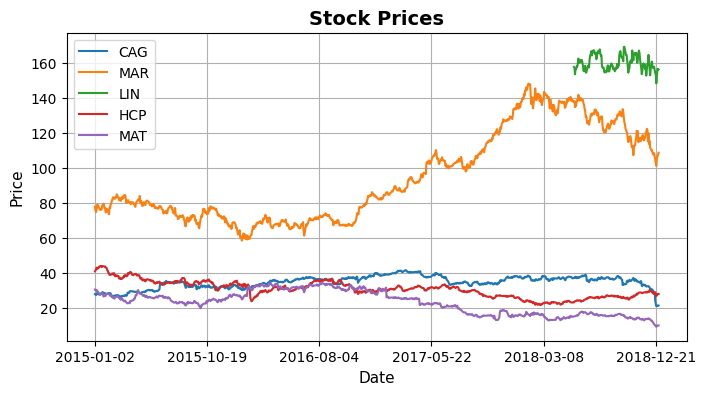

In [281]:
# Select stocks to analyze 
tickers = ['CAG', 'MAR', 'LIN', 'HCP', 'MAT']
stocks = df[tickers]

# plot stocks 
fig = plt.figure()
plt.rcParams['figure.figsize'] = [8, 4]

fig = stocks.plot(linewidth = 1.5, alpha = 1).get_figure()
plt.xlabel('Date', fontsize = 11, fontweight = 'normal')
plt.ylabel('Price', fontsize = 11, fontweight = 'normal')
plt.title('Stock Prices', fontsize = 14, fontweight = 'bold')
plt.grid(visible = True)
plt.show()

# Save figure
fig.savefig(('Section 1/1_3_4_stock_prices.pdf'), bbox_inches='tight')

<Figure size 800x400 with 0 Axes>

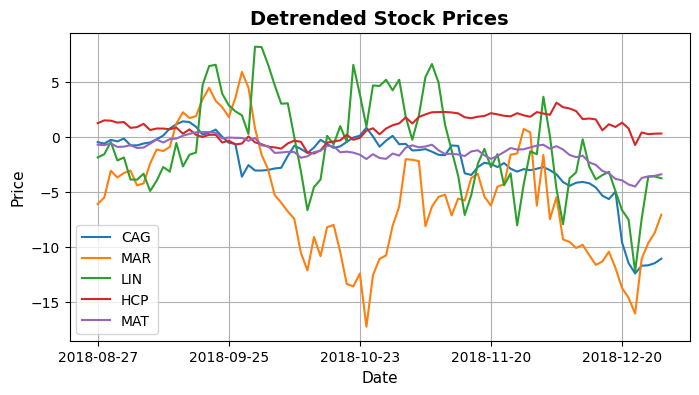

In [282]:
# Detrend with moving average of 66 days (one quarter)
stocks_ma = stocks.rolling(window=66).mean()
stocks_detrended = stocks.sub(stocks_ma).dropna()

# plot detrended stocks 
fig = plt.figure()
plt.rcParams['figure.figsize'] = [8, 4]

fig = stocks_detrended.plot(linewidth = 1.5, alpha = 1).get_figure()
plt.xlabel('Date', fontsize = 11, fontweight = 'normal')
plt.ylabel('Price', fontsize = 11, fontweight = 'normal')
plt.title('Detrended Stock Prices', fontsize = 14, fontweight = 'bold')
plt.grid(visible = True)
plt.show()

# Save figure
fig.savefig(('Section 1/1_3_4_detrended_stock_prices.pdf'), bbox_inches='tight')

In [283]:
# VAR model on detrended stock prices
model = VAR(stocks_detrended)
results = model.fit(1)

# Display the parameters
params = results.params[1:]
display(params)


CAG       MAR       LIN       HCP       MAT
L1.CAG  0.872786  0.113179 -0.281265  0.011912  0.058776
L1.MAR -0.063745  0.895820 -0.184820 -0.005004  0.022917
L1.LIN  0.000134 -0.111678  0.704023  0.004982 -0.025557
L1.HCP -0.084776 -0.083831 -0.401417  0.931708 -0.046406
L1.MAT  0.643072  0.094931  2.033036 -0.012884  0.802974

In [284]:
# Display the eigenvalues
A = params.values
eigA, _ = np.linalg.eig(A)
abs_eig = abs(eigA)
print('Eigenvalues: ')
print(*eigA, sep = "\n")
print('\n')
print('Eigenvalues (absolute values): ')
print(*abs_eig, sep = "\n")

Eigenvalues: 
(0.7144928806785384+0.12927612512613001j)
(0.7144928806785384-0.12927612512613001j)
(1.00635964046102+0j)
(0.8605189429713633+0j)
(0.9114451152082127+0j)


Eigenvalues (absolute values): 
0.7260939285436444
0.7260939285436444
1.00635964046102
0.8605189429713633
0.9114451152082127


The eigenvalues of the VAR matrix provide insights into the diversification and stability of the portfolio, which in turn affect the variance of the portfolio. The eigenvalues of the covariance matrix represent the amount of variance explained by each principal component. It is possible to notice that the magnitude of $\lambda_2$ is greater than one ($|\lambda_2| = 1.006$), which suggests that there might be some instability in the portfolio. It could be an indication that there's some concentration of risk in one or more assets or combinations of assets. This concentration of risk can contribute to the variance of the portfolio, making it more volatile and susceptible to market fluctuations and sector-specific events. However, the other eigenvalues have magnitudes less than 1, indicating that the other components of the portfolio are relatively stable and diversified. This diversification can help reduce the overall variance of the portfolio.

In [285]:
sec = info.set_index('Symbol').T[tickers].loc['GICS Sector'].to_frame()
display(sec)

GICS Sector
Symbol                        
CAG           Consumer Staples
MAR     Consumer Discretionary
LIN                  Materials
HCP                Real Estate
MAT     Consumer Discretionary

#### 1.3.5 Sector-based VAR portfolio analysis

In [286]:
# Define dataframe for eigenvalues and returns.
eig_df = pd.DataFrame(columns = info['GICS Sector'].unique(), index = ['Max Eigenvalue', 'Min Eigenvalue', 'Stable'])

with warnings.catch_warnings(record=True):
    
    # For each sector compute statistics on eigenvalues.
    for sector in info['GICS Sector'].unique():
        
        # Define portfolio of the sector.
        tickers = info.loc[info['GICS Sector'] == sector]['Symbol'].tolist()
        stocks = df[tickers]
        
        # Compute moving average and detrend prices.
        stocks_ma = stocks.rolling(window=66).mean()
        stocks_detrended = stocks.sub(stocks_ma).dropna()

        # Fit model.
        model = VAR(stocks_detrended)
        results = model.fit(1)
        
        # Compute and save eigenvalues.
        A = results.params[1:].values
        eigA, _ = np.linalg.eig(A)
        
        if np.max(abs(eigA) > 1):
            eig_df[sector]['Stable'] = "No"
        else:
            eig_df[sector]['Stable'] = "Yes"

        eig_df[sector]['Max Eigenvalue'] = np.max(abs(eigA))
        eig_df[sector]['Min Eigenvalue'] = np.min(abs(eigA))

    display(eig_df.T)


Max Eigenvalue Min Eigenvalue Stable
Industrials                  0.991721       0.371246    Yes
Health Care                  0.994153       0.092157    Yes
Information Technology       0.992738       0.374081    Yes
Communication Services       0.982263       0.752488    Yes
Consumer Discretionary        0.99065       0.447563    Yes
Utilities                    0.985648       0.042115    Yes
Financials                    1.00434       0.152575     No
Materials                    0.991744       0.137838    Yes
Real Estate                  0.982785       0.763563    Yes
Consumer Staples             0.991508       0.546458    Yes
Energy                       0.985577       0.825707    Yes

Even though constructing a portfolio by grouping stocks by sector may seem beneficial since it reduces the instability when modeling the portfolio, it may lead to higher correlations between the stocks, as they are likely to be affected by similar economic factors and industry trends. This results in a higher overall risk, as the assets in the portfolio are not diversified across different sectors. Therefore, it is advised to construct a more robust portfolio using uncorrelated assets from different sectors to minimise the risk. This can be achieved by carefully selecting the assets and understanding their correlations, which directly influence the overall variance of the portfolio.

## 2. Bond Pricing

### 2.1 Examples of bond pricing

#### 2.1.1 Percentage return per annum

We consider the case that an investor receives USD 1,100 in one year in return for an investment of USD 1,000 now. In order to compute the percentage return per annum, compounding can be used:

$$
    A = P \left(1+\frac{r}{n} \right)^{nt} 
$$

where $A$ is the final amount returned, $P$ is the initial principal investment, $r$ is the interest rate (expressed as decimal),$t$ is the time period (in years) and $n$ is the compounding frequency per time period. The previous equation can be rearranged to obtain the compound return: 

$$
    r_n = n \left[ \left(\frac{A}{P}\right)^{\frac{1}{nt}} -1\right]
$$

It is important to note that for the considered example $t = 1$ since it is over a period of a year. 


* Annual Compounding ($n = 1$):
$$
    r_1 = \left[ \left(\frac{1100}{1000}\right) -1\right] = 0.1 \qquad \Rightarrow \qquad r_1 = 10\%
$$

* Semi-annual Compounding ($n = 2$):
$$
    r_2 = 2 \left[ \left(\frac{1100}{1000}\right)^{\frac{1}{2}} -1\right] = 0.976 \qquad \Rightarrow \qquad r_2 = 9.76\%
$$

* Monthly Compounding($n = 1$):
$$
    r_{12} = 12 \left[ \left(\frac{1100}{1000}\right)^{\frac{1}{12}} -1\right] = 0.957 \qquad \Rightarrow \qquad r_{12} = 9.57\%
$$

* Continous Compounding ($n \to \infty$):
$$
    A = \lim _{n \to \infty } P \left(1+\frac{r}{n} \right)^{nt} \\
$$

Let $k = \frac{n}{r}$, then
$$
\begin{aligned}
    A &= \lim _{k \to \infty } P \left(1+\frac{1}{k} \right)^{krt} = P {\underbrace{\lim _{k \to \infty } \left[ \left(1+\frac{1}{k} \right)^{k}\right]}_{Euler's~Number}}^{rt}
    & = P e^{rt}
\end{aligned}
$$

Therefore the rate of return (with $t=1$) is determined by 
$$
    r_{\infty} = \ln \left(\frac{A}{P} \right) = \ln \left(\frac{1100}{1000} \right) = 0.953 \qquad \Rightarrow \qquad r_{\infty} = 9.53\%
$$


#### 2.1.1 Monthly to continuous compounding

The rate of interest with continuous compounding that is equivalent to $15\%$ per annum with monthly compounding, is obtained in the following steps.
$$
\begin{aligned}
    \left(1+\frac{r_n}{n} \right)^{nt} &= e^{r_{\infty}t} \\
    r_{\infty}t &= \ln \left( \left(1+\frac{r_n}{n} \right)^{nt}\right) \\
    r_{\infty} & = n \ln \left(1+\frac{r_n}{n} \right) 
\end{aligned}
$$

Solving the above equation given $n=12$, $r_{12} = 15\%$:
$$
    r_{\infty} = 12 \times \ln \left(1+\frac{0.15}{12} \right) = 14.91\%
$$


#### 2.1.3 Quarterly to continuous compounding

The continuous compounding interest equivalent to $12\%$ per annum with quarterly compounding is obtained using Equation (26) with $n=4$, $r_{4} = 12\%$:
$$
    r_{\infty} = 4 \times \ln \left(1+\frac{0.12}{4} \right) = 12.18\%
$$

Given an initial deposit of USD $10,000$, the interest paid in each quarter will be:

$$
\begin{aligned}
    Q_1 &= \$10,000\left( e^{\frac{0.1218}{4}} -1 \right) = \$304.5 \\
    Q_2 &= \$(10,000+Q_1)\left( e^{\frac{0.1218}{4}} -1 \right) = \$313.8 \\
    Q_3 &= \$(10,000+Q_1+Q_2)\left( e^{\frac{0.1218}{4}} -1 \right) = \$323.4 \\
    Q_4 &= \$(10,000+Q_1+Q_2+Q_3)\left( e^{\frac{0.1218}{4}} -1 \right) = \$333.2 \\
\end{aligned}
$$


### 2.2 Forward rates

*Suppose that the one–year interest rate, $r_1$ is $5\%$, and the two–year interest rate, $r_2$ is $7\%$. If you invest USD $100$ for one year, your investment grows to $100 \times 1.05 = USD~105$; if you invest for two years, it grows to $100\times1.07^2 = USD~114.49$. The extra return that you earn for that second year is $1.07^2/1.05 - 1 = 0.090$, or $9.0\%$.*

#### 2.2.1.a Would an investor be happy to earn that extra 9\% for investing for two years rather than one?

An investor might be willing to lock their money for an extra year to achieve this extra $9\%$ return as it represents a higher overall return on their investment. However, some investors may prioritize liquidity and flexibility over the additional return. They might prefer to invest for only one year to maintain the option to access their funds sooner or to invest in other opportunities as they arise. Another factor that might play a role in their decision-making process is an investor's risk tolerance. Those with a higher risk tolerance may be more willing to invest for a longer period, while those with a lower risk tolerance might prioritize shorter-term investments.

#### 2.2.1.b 5\%, 7\%, and 9\% investment strategies analysis

The 5\% investment strategy provides a lower return but offers greater flexibility and liquidity. An investor can access their funds after one year, which can be beneficial in case of emergencies or if they want to reinvest in other opportunities that might arise. The two-year investment at 7\% provides a higher overall return compared to the one-year investment, however, the investor's money will be locked for a longer period, which could limit their ability to access funds or invest in other opportunities. The foward rate of 9\% return for the second year of the two-year investment can be attractive to some investors who are willing to commit their funds for a longer period in exchange for a higher return.

If liquidity and flexibility are top priorities, the one-year investment at 5\% may be more suitable. On the other hand, if the investor is willing to commit their funds for a longer period to earn a higher return, the two-year investment at 7\% could be more appealing.

#### 2.2.1.c Advantages and disadvantages of the forward rate of 9\%

The foward rate of 9\% represents an advantage as it provides a higher return in the second year compared to the one-year interest rate of 5\%. Moreover, by investing in a two-year deal the investor locks in their return for two years, providing stability and avoiding potential fluctuations in the one-year interest rate during that time. This can offer some level of protection against negative changes in the near future.

However, longer-term investments generally carry higher risks than shorter-term investments (unforeseen factors can potentially affect the investment). It can be disadvantageous if the investor needs access to their funds sooner or wants to change strategy to take advantage of other investment opportunities that may arise during that time.

#### 2.2.1.d How much would you need to go from 1y investment to 2y investment and what does it depend upon?

The amount needed to go from a 1-year investment  to a 2-year investment strategy can be computed by the following formula:
$$
    (1+r_j)^{j} = (1+r_i)^{i}(1+f_{i,j})^{ji}
$$


### 2.3 Duration of a coupon-bearing bond

#### 2.3.1.a Duration for 1\% bond

The duration of the 1\% 7-year bonds is computed with the following formula

$$
    \text{Duration} =\frac{1 \times P V\left(C_1\right)}{P V}+\frac{2 \times P V\left(C_2\right)}{P V}+\frac{3 \times P V\left(C_3\right)}{P V}+\cdots+\frac{T \times P V\left(C_T\right)}{P V}
$$

In [252]:
table = pd.DataFrame(columns=['year 1','year 2','year 3','year 4','year 5','year 6','year 7','Total'])

table.loc['Payment'] = [10,10,10,10,10,10,1010,1070]
table.loc['PV \u2096'] = [9.52,9.07,8.64,8.23,7.84,7.46,717.79,768.55]
table.loc['PV_k / PV_tot'] = [0.0124,0.0118,0.0112,0.0107,0.0102,0.0097,0.0934,1]
table.loc['t_k * PV_k / PV_tot'] = [0.0124,0.0236,0.0337,0.0428,0.0510,0.0583,6.5377,6.7595]

display(table)

year 1   year 2   year 3   year 4   year 5   year 6  \
Payment              10.0000  10.0000  10.0000  10.0000  10.0000  10.0000   
PV ₖ                  9.5200   9.0700   8.6400   8.2300   7.8400   7.4600   
PV_k / PV_tot         0.0124   0.0118   0.0112   0.0107   0.0102   0.0097   
t_k * PV_k / PV_tot   0.0124   0.0236   0.0337   0.0428   0.0510   0.0583   

                        year 7      Total  
Payment              1010.0000  1070.0000  
PV ₖ                  717.7900   768.5500  
PV_k / PV_tot           0.0934     1.0000  
t_k * PV_k / PV_tot     6.5377     6.7595

#### 2.3.1.b Modified Duration

The modified duration for the 1\% bonds in the above table is computed using the following formula:
$$
    \text{Modified duration} = \text{volatility}~(\%) = \frac{1}{P(\lambda_0)} \frac{dP(\lambda)}{d\lambda}= \frac{\text{Duration}}{1+\frac{\lambda}{n}}
$$

where $\lambda$ represents the yield and $n$ is the number of compounding periods per year, in this case $n=1$. Given a yield to maturity of $5\%$ ($\lambda = 0.05$) and the duration calculated in part (a), the modified duration is: 
$$
    \text{Modified duration} = \frac{6.76}{1+0.05} = 6.44\% \\
$$

From the above euation, for yearly compounding $n = 1$, the $ Modified~ Duration = \frac{\text{Duration}}{1+\text{yield}} $, while for continuous compounding $n = \infty$, the two durations are exactly equivalent: $Modified~Duration = \text{Duration}$.


#### 2.3.1.c Modified Duration Advantages of duration against unexpected changes in interests rates (volatility)

A long-term investment such as a pension plan is characterized by a bigger duration than a shorter investment, thus it is more prone to changes in interest rates. Given that duration measures the average time it takes to receive a bond's cash flows, a higher duration indicates that the bond has a longer time to maturity (or a lower compounding rate), making it more sensitive to interest rate changes. Therefore investors can used it to estimate the percentage change in a bond's price for a given change in interest rates. Using Modified Duration provides the investors with the percentage change in a bond's price for a 1\% change in interest rates. It is a more accurate measure of interest rate sensitivity and directly indicates the bond's price change in response to interest rate changes. Thus by using modified duration, investors can manage the interest rate risk associated with a bond. 

### 2.4 Capital Asset Pricing Model (CAPM) and Arbitrage Pricing Theory (APT)

In [42]:
df = pd.read_csv(data_path + 'fsp_case_31_BSD.csv', index_col = 0, header = [0 ,1]) 

returns = df['ret'].copy().dropna(1)
returns.index = pd.to_datetime(returns.index) 
returns = returns.sort_index() 

market_cap = df['mcap'].copy() 
market_cap.index = pd.to_datetime(market_cap.index) 
market_cap = market_cap[returns.columns]

#### 2.4.1 Equally-weighted Market Returns

The daily equally-weighted market returns, $R_m$, can be estimated by averaging each individual company’s return on a daily basis.

mean return (%):  0.004720252923319845
std:  0.006643939221298659


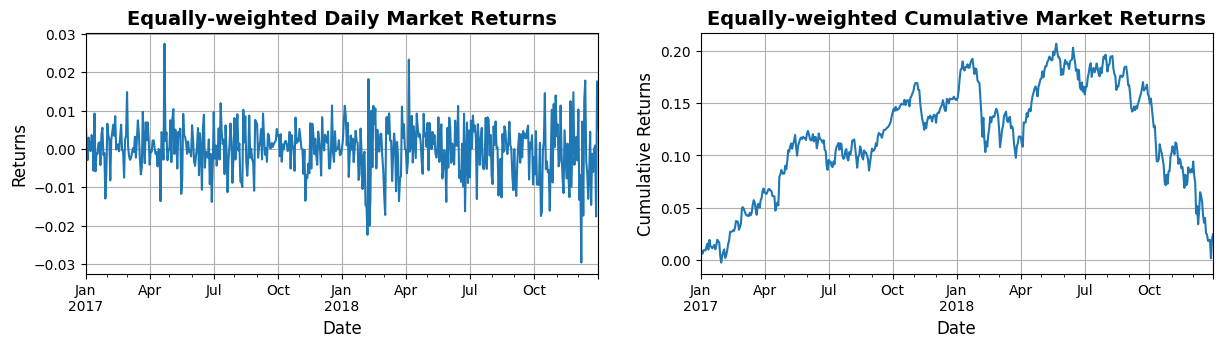

In [70]:
unweighted_returns = returns.mean(1)

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12,3)
fig.tight_layout()
fig.subplots_adjust(hspace = 0.4, wspace = 0.2)


unweighted_returns.plot(ax=ax[0], grid=True)
ax[0].set_title("Equally-weighted Daily Market Returns", fontsize=14, fontweight="bold")
ax[0].set_xlabel('Date', fontsize = 12, fontweight = 'normal')
ax[0].set_ylabel('Returns', fontsize = 12, fontweight = 'normal')
ax[0].grid(visible = True)

unweighted_returns.cumsum().plot(ax=ax[1], grid=True)
ax[1].set_title("Equally-weighted Cumulative Market Returns", fontsize=14, fontweight="bold")
ax[1].set_xlabel('Date', fontsize = 12, fontweight = 'normal')
ax[1].set_ylabel('Cumulative Returns', fontsize = 12, fontweight = 'normal')
ax[1].grid(visible = True)


print('mean return (%): ', np.mean(unweighted_returns.values.reshape(-1))*100)
print('std: ', np.std(unweighted_returns.values.reshape(-1)))

fig.savefig(('Section 2/2_4_1_unweighted_returns.pdf'), bbox_inches='tight')


It can be observed that the market returns present an oscillating trend with a market return average of 0.00472\% per day and a standard deviation of 0.00664. It can also be observed that if a portfolio were to be constructed with equally allocated investments in all assets, the cumulative return would eventually be 0\% at the end of the studied period.

#### 2.4.2 Equally-weighted Rolling Beta

An asset's sensitivity to the market (systematic risk coefficient), $\beta_i$ is defined as 
$$
    \beta_i = \frac{cov(r_i, R_m)}{var(R_m)}
$$

where $r_i$ is the return of the given asset and $R_m$ is the market return. For every company, $i$, the $\beta_i$ systematic risk coefficient can provide the investor with a measure of the volatility of the asset $i$ in correlation to the whole market. The volatility can be interpreted as follows:

* $\beta_i > 1$: the asset $i$ is  more volatile than the market, thus increasing the average risk in a portfolio
* $\beta_i = 1$: the asset $i$ is  as volatile than the market
* $\beta_i < 1$: the asset $i$ is  less volatile than the market, thus reducing the average risk in a portfolio
* $\beta_i = 0$: the asset $i$ is  not correlated to the market
* $\beta_i < 0$: the asset $i$ is  negatively correlated to the market


In [44]:
all_returns = returns.copy() 
all_returns['market'] = unweighted_returns.copy()

unweighted_beta = pd.DataFrame(columns = all_returns.columns) 

w = 22
for t in all_returns.index[(w-1):]: 
    C = all_returns[:t].iloc[-w:].cov() 
    beta = C['market'] / C['market']['market']
    unweighted_beta.loc[t] = beta

In [68]:
def mypdf(data, ax, bins):
        # Get pdf parameters.
    (mu, std) = norm.fit(data)
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    p = p / sum(p) * (100 / bins)

    return x, p

mean:  1.0
std:  0.708104366971137


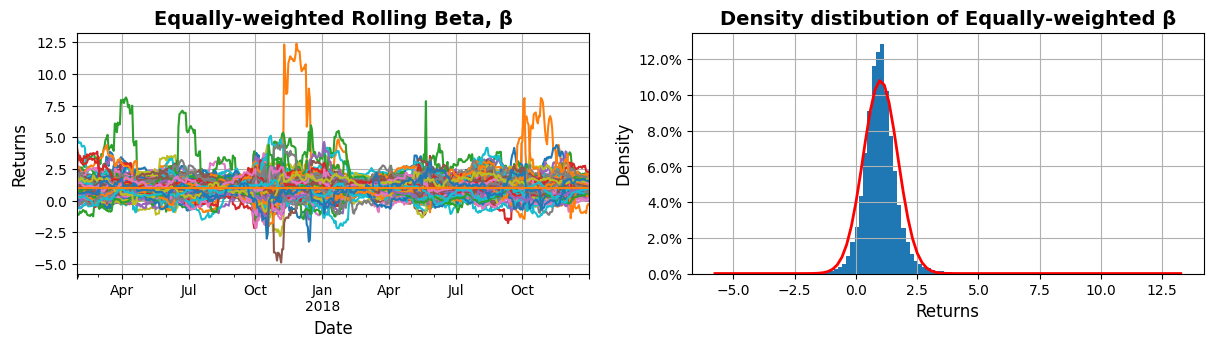

In [69]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12,3)
fig.tight_layout()
fig.subplots_adjust(hspace = 0.4, wspace = 0.2)

unweighted_beta.plot(ax=ax[0], grid=True)
ax[0].set_title("Equally-weighted Rolling Beta, \u03B2", fontsize=14, fontweight="bold")
ax[0].set_xlabel('Date', fontsize = 12, fontweight = 'normal')
ax[0].set_ylabel('Returns', fontsize = 12, fontweight = 'normal')
ax[0].legend().remove()
ax[0].grid(visible = True)

betas = unweighted_beta.values.reshape(-1)
weights = np.ones_like(betas)/float(len(betas))
ax[1].hist(betas, bins=100, weights = weights)
x, p =  mypdf(betas, ax[1], 100)

ax[1].plot(x, p, linewidth = 2, color = 'red')
vals = ax[1].get_yticks()
ax[1].set_yticklabels(['{:,.1%}'.format(y) for y in vals])
ax[1].set_title("Density distibution of Equally-weighted \u03B2", fontsize=14, fontweight="bold")
ax[1].set_xlabel('Returns', fontsize = 12, fontweight = 'normal')
ax[1].set_ylabel('Density', fontsize = 12, fontweight = 'normal')
ax[1].grid(visible = True)

print('mean: ', np.mean(unweighted_beta.values.reshape(-1)))
print('std: ', np.std(unweighted_beta.values.reshape(-1)))

fig.savefig(('Section 2/2_4_2_unweighted_betas.pdf'), bbox_inches='tight')


It can be estimated and also observed from the plot that the average systematic risk coefficient is $\bar{\beta} = 1$ which is expected since all assets in the market are equally weighted in the portfolio. The distribution of values implies that the market is composed of stocks that are diverse in terms of riskiness, it contains both: highly volatile and robust assets. 

#### 2.4.3  Cap-weighted Market Returns

A new market portfolio is created where all assets in the market are weighted with respect to their market capitalisation, thus obtaining a weighted market return, defined as:
$$
    R_m = \sum_i \frac{\text{mcap}_i \times r_i}{\sum_i\text{mcap}_i}
$$

In [48]:
weights = market_cap.divide(market_cap.sum(1), 0)
weighted_returns = (weights * returns.copy()).sum(1)

mean return (%):  0.01884199014214417
std:  0.006592982324617818


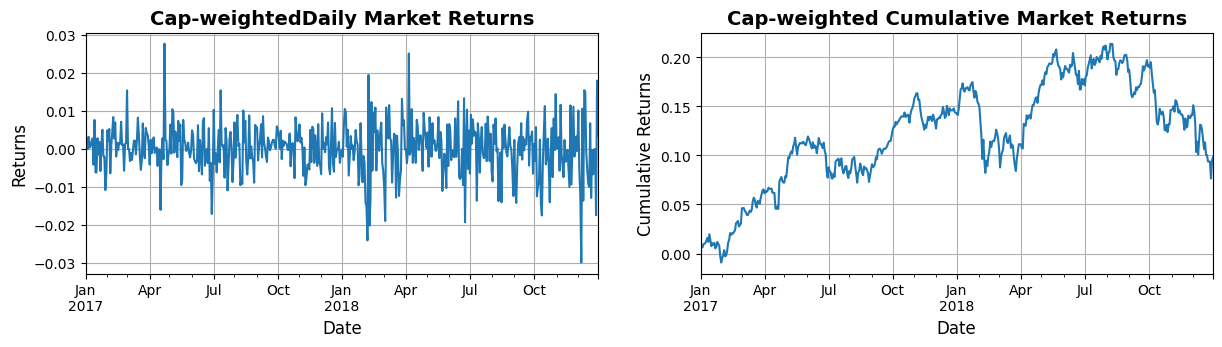

In [73]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12,3)
fig.tight_layout()
fig.subplots_adjust(hspace = 0.4, wspace = 0.2)

weighted_returns.plot(ax=ax[0], grid=True)
ax[0].set_title("Cap-weightedDaily Market Returns", fontsize=14, fontweight="bold")
ax[0].set_xlabel('Date', fontsize = 12, fontweight = 'normal')
ax[0].set_ylabel('Returns', fontsize = 12, fontweight = 'normal')
ax[0].grid(visible = True)

weighted_returns.cumsum().plot(ax=ax[1], grid=True)
ax[1].set_title("Cap-weighted Cumulative Market Returns", fontsize=14, fontweight="bold")
ax[1].set_xlabel('Date', fontsize = 12, fontweight = 'normal')
ax[1].set_ylabel('Cumulative Returns', fontsize = 12, fontweight = 'normal')
ax[1].grid(visible = True)

print('mean return (%): ', np.mean(weighted_returns.values.reshape(-1))*100)
print('std: ', np.std(weighted_returns.values.reshape(-1)))

fig.savefig(('Section 2/2_4_3_weighted_returns.pdf'), bbox_inches='tight')


Given the robust nature of high market cap companies and the riskier nature of low market cap assets, constructing a weighted market portfolio with respect to the market cap allows to include more best-performing companies and less risky assets, thus reducing the overall risk and volatility associated with the weighted market return. 

#### 2.4.4 Cap-weighted Rolling Beta

In [50]:
mc_returns = returns.copy() 
mc_returns['market'] = weighted_returns.copy()

weighted_beta = pd.DataFrame(columns = all_returns.columns) 

w = 22
for t in mc_returns.index[(w-1):]: 
    C = mc_returns[:t].iloc[-w:].cov() 
    beta = C['market'] / C['market']['market']
    weighted_beta.loc[t] = beta

mean:  0.9616577418388089
std:  0.6940217680471462


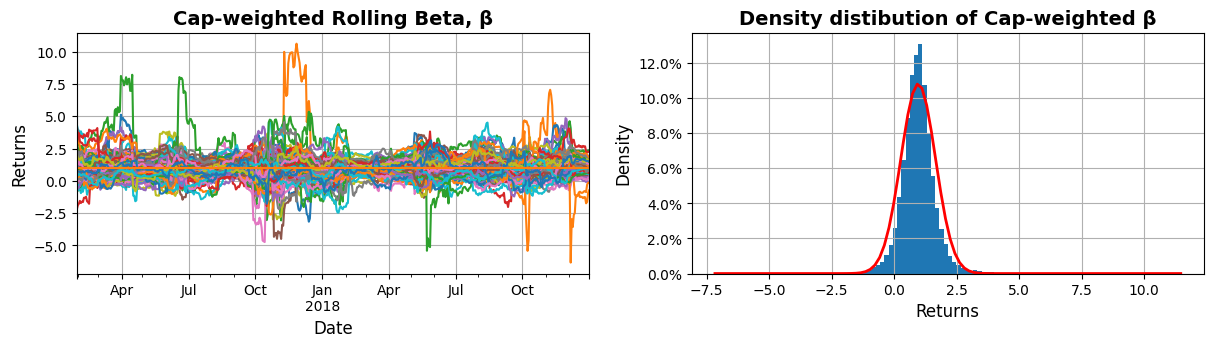

In [63]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12,3)
fig.tight_layout()
fig.subplots_adjust(hspace = 0.4, wspace = 0.2)

weighted_beta.plot(ax=ax[0], grid=True)
ax[0].set_title("Cap-weighted Rolling Beta, \u03B2", fontsize=14, fontweight="bold")
ax[0].set_xlabel('Date', fontsize = 12, fontweight = 'normal')
ax[0].set_ylabel('Returns', fontsize = 12, fontweight = 'normal')
ax[0].legend().remove()
ax[0].grid(visible = True)

betas = weighted_beta.values.reshape(-1)
weights = np.ones_like(betas)/float(len(betas))
ax[1].hist(betas, bins=100, weights = weights)
x, p =  mypdf(betas, ax[1], 100)

ax[1].plot(x, p, linewidth = 2, color = 'red')
vals = ax[1].get_yticks()
ax[1].set_yticklabels(['{:,.1%}'.format(y) for y in vals])
ax[1].set_title("Density distibution of Cap-weighted \u03B2", fontsize=14, fontweight="bold")
ax[1].set_xlabel('Returns', fontsize = 12, fontweight = 'normal')
ax[1].set_ylabel('Density', fontsize = 12, fontweight = 'normal')
ax[1].grid(visible = True)

print('mean: ', np.mean(weighted_beta.values.reshape(-1)))
print('std: ', np.std(weighted_beta.values.reshape(-1)))

fig.savefig(('Section 2/2_4_4_weighted_betas.pdf'), bbox_inches='tight')


The mean systematic risk $\bar{\beta}$ was found to be 0.96, implying less volatility ($\bar{\beta} < 1$),  with a standard deviation of 0.694. Given the lower values obtain when compared to the equally-weighted analysis, it can be concluded that the market portfolio is composed of stocks that are less volatile and therefore less risky. 

#### 2.4.5 Arbitrage Pricing Theory

Arbitrage Pricing Theory (APT) states that the expected return of a risky asset can be expressed as a linear combination of systematic factors, which can be mathematically expressed as the following cross-sectional regression (for two factors):
$$
    r_i = \alpha + \beta_{m,i}R_m + \beta_{s,i}R_s + \epsilon_i
$$

where $r_i$ denotes the return per company, $\epsilon_i$ represents the residual of this regression (company’s specific return), $\alpha$ is the risk-free rate of return, $R_m$ is the market return with a systematic risk $\beta_{m,i}$ while $R_s$ is the return relevant to the market cap (size) of the stock with a sensitivity of $\beta_{s,i}$.

The above equation can be expressed in matrix form as:

$$
    \mathbf{r} = \mathbf{A} \mathbf{x} + \mathbf{\epsilon} \\
$$

$$
\left[\begin{array}{c}
r_{1} \\
r_{2} \\
\vdots \\
r_{i}
\end{array}\right] = \left[\begin{array}{ccc}
1 & \beta_{m, 1} & \beta_{s, 1}\\
1 & \beta_{m, 2} & \beta_{s, 2} \\
\vdots & \vdots & \vdots\\
1 & \beta_{m, i} & \beta_{s, i}
\end{array}\right]\left[\begin{array}{c}
\alpha \\
R_m \\
R_s
\end{array}\right] + \left[\begin{array}{c}
\epsilon_1 \\
\epsilon_2 \\
\vdots \\
\epsilon_i
\end{array}\right]
$$

Therefore it is possible to regress values for $\alpha, R_m, R_s$ for every day of the time series using the Ordinary Least Squares (OLS) method, which corresponds to minimising the following objective function: 

$$
    \min_{\mathbf{x}} ||\mathbf{\epsilon}||^2 = ||\mathbf{r} - \mathbf{A}\mathbf{x}||^2
$$

where the optimal solution computed is:

$$
    \mathbf{x}^{*} = \left[\begin{array}{c}
\alpha \\
R_m \\
R_s
\end{array}\right]= (\mathbf{A}^{\top} \mathbf{A})^{-1} \mathbf{A}^{\top} \mathbf{r}
$$

In [80]:
# part (a)

r = returns.copy().loc[weighted_beta.index]
b_m = weighted_beta.iloc[:, :-1] 
b_s = np.log(market_cap.loc[weighted_beta.index])

R_m = pd.Series(index = r.index, dtype='float64')
R_s = pd.Series(index = r.index, dtype='float64')
a = pd.Series(index = r.index, dtype='float64')
e = pd.DataFrame(index = r.index, columns = r.columns)

for t in r.index: 
    r_i = r.loc[t].values.reshape(-1,1)
    bm_i = b_m.loc[t].values.reshape(-1,1)
    bs_i = b_s.loc[t].values.reshape(-1,1)
    
    ones_matrix = np.ones((bm_i.shape))
    A = np.hstack((ones_matrix, bm_i, bs_i))
    x = (np.linalg.inv(A.T @ A) @ A.T) @ r_i
    
    a[t] = float(x[0])
    R_m[t] = float(x[1])
    R_s[t] = float(x[2])
    e.loc[t] = (r_i-A.dot(x)).reshape(1,-1)


Mean       Std  Variance
Rₘ -0.000286  0.007913  0.000063
Rₛ  0.000192  0.001732  0.000003
α  -0.004216  0.041191  0.001697

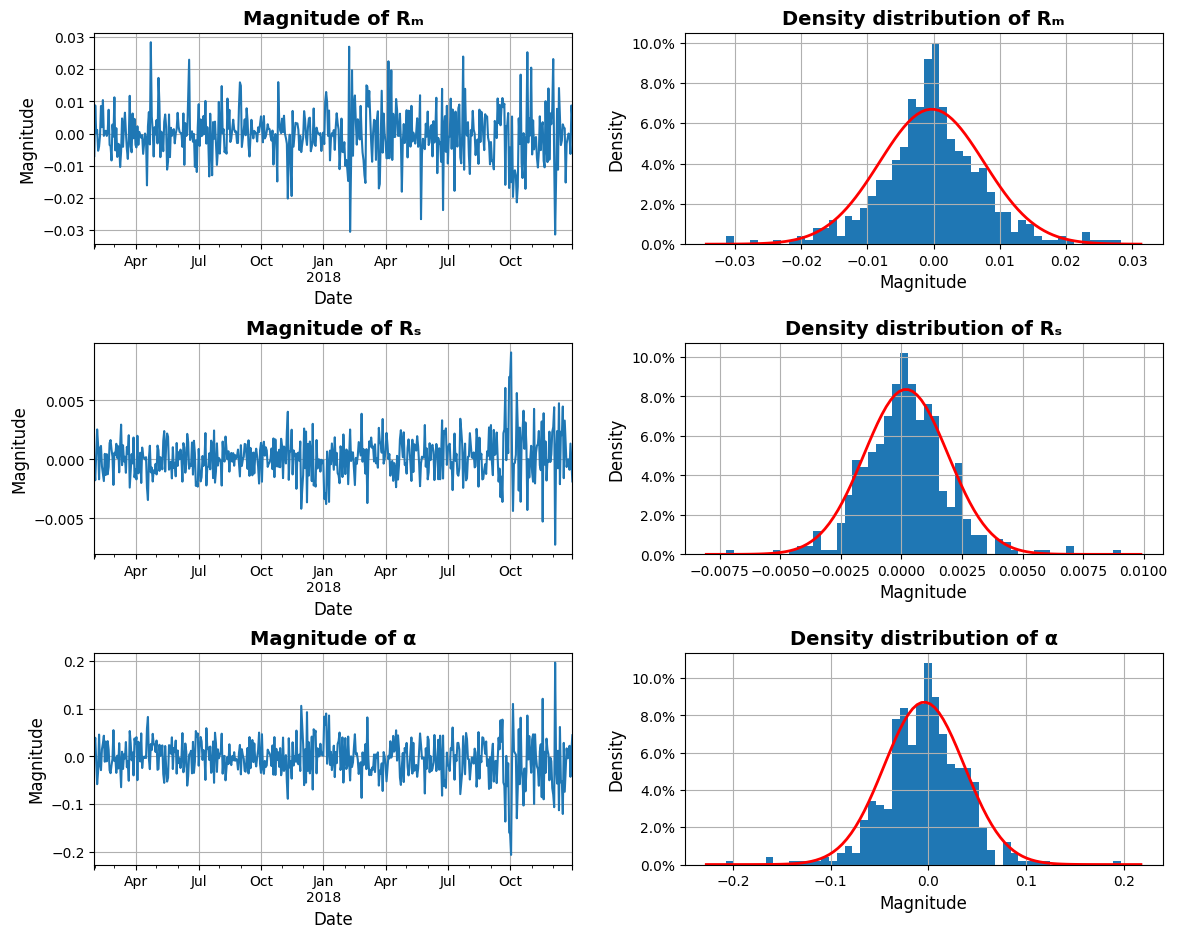

In [79]:
# part (b)

fig, ax = plt.subplots(3,2, figsize = (12.5,10))
fig.tight_layout(pad=5)

var = [R_m, R_s, a]
names = ['R\u2098', 'R\u209b', '\u03B1']
statistics = pd.DataFrame(index=names, columns=['Mean', 'Std', 'Variance'])

for i in range(3):
    var[i].plot(ax=ax[i][0], grid=True)
    ax[i][0].set_title("Magnitude of " + names[i], fontsize=14, fontweight="bold")
    ax[i][0].set_xlabel('Date', fontsize = 12, fontweight = 'normal')
    ax[i][0].set_ylabel('Magnitude', fontsize = 12, fontweight = 'normal')
    ax[i][0].grid(visible = True)

    data = var[i]
    weights = np.ones_like(data)/float(len(data))
    ax[i][1].hist(data, bins=50, weights = weights)
    x, p =  mypdf(data, ax[i][1], bins=50)

    ax[i][1].plot(x, p, linewidth = 2, color = 'red')
    vals = ax[i][1].get_yticks()
    ax[i][1].set_yticklabels(['{:,.1%}'.format(y) for y in vals])
    ax[i][1].set_title("Density distribution of " + names[i], fontsize=14, fontweight="bold")
    ax[i][1].set_xlabel('Magnitude', fontsize = 12, fontweight = 'normal')
    ax[i][1].set_ylabel('Density', fontsize = 12, fontweight = 'normal')
    ax[i][1].grid(visible = True)

    statistics.loc[names[i]] =[var[i].mean(), var[i].std(),(var[i].std()**2)]

display(statistics)
fig.savefig(('Section 2/2_4_5_statistics.pdf'), bbox_inches='tight')

    

Mean        0.811492
Std         0.075925
Variance    0.005765
dtype: float64

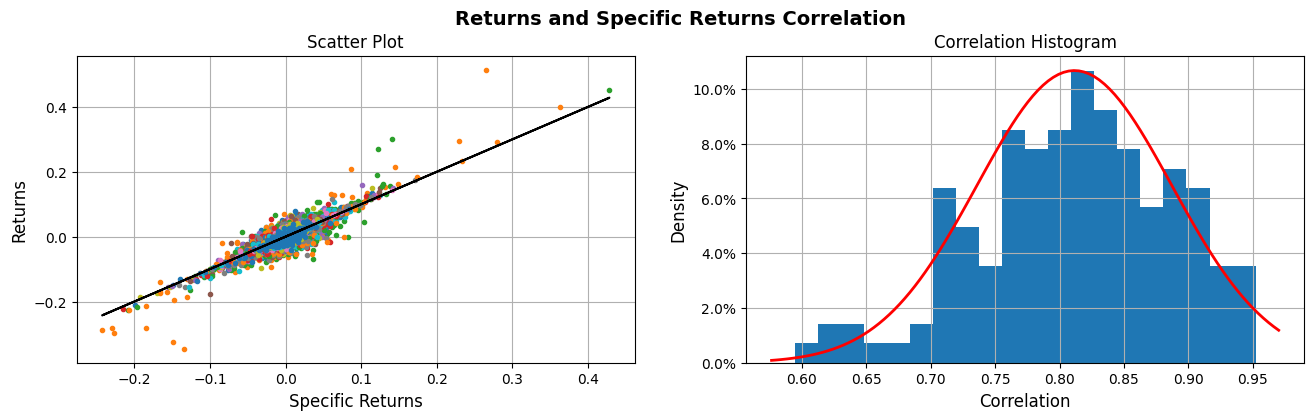

In [54]:
# part (c)

corr = pd.Series(index = e.columns, dtype = 'float64')

fig, ax = plt.subplots(1,2)
fig.suptitle("Returns and Specific Returns Correlation", fontsize=14, fontweight="bold")
fig.set_size_inches(13,4)
fig.tight_layout()
fig.subplots_adjust(wspace = 0.2)

for company in e.columns:
    ax[0].plot(e[company], r[company], '.')
    corr[company] = pearsonr(e[company], r[company])[0]

ax[0].plot(e.values.reshape(-1),e.values.reshape(-1), color='k')
ax[0].set_title('Scatter Plot', fontsize = 12, fontweight = 'normal')
ax[0].set_xlabel('Specific Returns', fontsize = 12, fontweight = 'normal')
ax[0].set_ylabel('Returns', fontsize = 12, fontweight = 'normal')
ax[0].grid(visible = True)

data = corr
weights = np.ones_like(data)/float(len(data))
ax[1].hist(data, bins=20, weights = weights)
x, p =  mypdf(data, ax[1], bins=20)

ax[1].plot(x, p, linewidth = 2, color = 'red')
vals = ax[1].get_yticks()
ax[1].set_yticklabels(['{:,.1%}'.format(y) for y in vals])
ax[1].set_title('Correlation Histogram', fontsize = 12, fontweight = 'normal')
ax[1].set_xlabel('Correlation', fontsize = 12, fontweight = 'normal')
ax[1].set_ylabel('Density', fontsize = 12, fontweight = 'normal')
ax[1].grid(visible = True)

stats = pd.Series({'Mean': corr.mean(), "Std": corr.std(), "Variance": (corr.std())**2})
display(stats)
fig.savefig(('Section 2/2_4_5_correlation.pdf'), bbox_inches='tight')


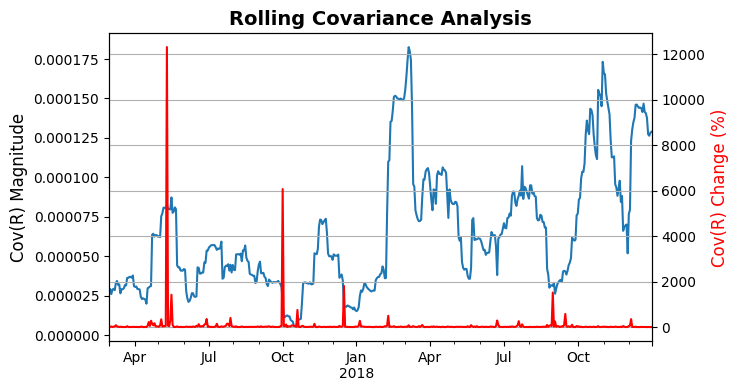

In [61]:
# part (d)

R = pd.DataFrame(columns=['R_m', 'R_s'])
R['R_m']= R_m
R['R_s']= R_s

cov_R = []

w = 22
for t in R.index[(w-1):]:
    Rt = R[:t].iloc[-w:]
    cov_Rt = np.cov(Rt.T)
    cov_R.append(cov_Rt)

cov_R = np.array(cov_R)

mag = pd.Series(index = R.index[(w-1):], dtype = 'float')
change = pd.Series(index = R.index[(w-1):], dtype = 'float')

for i in range(1, cov_R.shape[0]):
    curr, prev = (cov_R[i], cov_R[i-1])

    mag[i] = (np.linalg.norm(curr))
    change[i] = (100 * np.mean(abs((curr - prev) / prev)))

fig, ax = plt.subplots(1)
fig.set_size_inches(7,4)
mag.plot(ax=ax)
plt.ylabel('Cov(R) Magnitude', color='black', fontsize = 12, fontweight = 'normal')
change.plot(ax=ax.twinx(), style='r-')
plt.ylabel('Cov(R) Change (%)', color='r', fontsize = 12, fontweight = 'normal')
plt.title("Rolling Covariance Analysis", fontsize=14, fontweight="bold")
plt.grid(visible = True)

fig.savefig(('Section 2/2_4_5_covariance.pdf'), bbox_inches='tight')


percentage of the variance explained by the 1st Principal Component: 7.37 %
percentage of the variance explained by the 76st Principal Component: 90.22 %


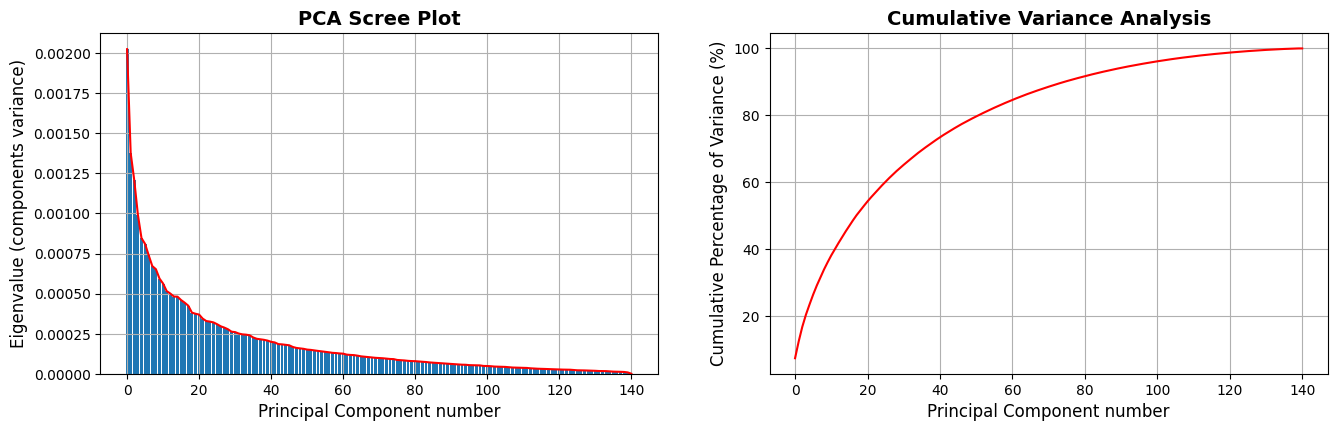

In [89]:
# part (e)

eigvals, _ = np.linalg.eigh(e.astype(float).cov())
eigvals = eigvals[::-1]
cum_var = np.cumsum(eigvals/sum(eigvals) * 100)

fig, ax = plt.subplots(1,2)
fig.set_size_inches(13,4) 
fig.tight_layout()
fig.subplots_adjust(hspace = 0.4, wspace = 0.2)

ax[0].bar(np.arange(len(eigvals)), eigvals.T)
ax[0].plot(eigvals, color ='r')
ax[0].set_title('PCA Scree Plot', fontsize = 14, fontweight = 'bold')
ax[0].set_xlabel('Principal Component number', fontsize = 12, fontweight = 'normal')
ax[0].set_ylabel('Eigenvalue (components variance)', fontsize = 12, fontweight = 'normal')
ax[0].grid(visible = True)

ax[1].plot(cum_var, color ='r')
ax[1].set_title('Cumulative Variance Analysis', fontsize = 14, fontweight = 'bold')
ax[1].set_xlabel('Principal Component number', fontsize = 12, fontweight = 'normal')
ax[1].set_ylabel('Cumulative Percentage of Variance (%)', fontsize = 12, fontweight = 'normal')
ax[1].grid(visible = True)

print("percentage of the variance explained by the 1st Principal Component:", round(cum_var[0],2),"%")
print('percentage of the variance explained by the 76st Principal Component:', round(cum_var[75],2), '%')

fig.savefig(('Section 2/2_4_5_PCA.pdf'), bbox_inches='tight')

It was found that the percentage of the variance explained by the first principal component is 7.37\%. Meaning that only 7.37\% of information on the specific returns is represented by the first component. Moreover, it can be observed that 76 principal components are needed out of 141 in order to explain 90.22\% of the information of the original data. This shows that modeling prices accurately with the 2-factor APT model requires high dimensionality, which implies high computational expansiveness. This is not ideal since PCA aims to reduce dimensionality significantly. 

## 3. Portfolio Optimization

### 3.1 Adaptive minimum-variance portfolio optimization

#### 3.1.1 Optimal minimum variance portfolio

The optimal weights to construct the minimum variance portfolio can be obtained by solving the following optimization problem: 
$$
\begin{aligned}
    \min_{\mathbf{w}} ~~& J(\mathbf{w},\mathbf{C}) = \frac{1}{2}\mathbf{w}^{\top}\mathbf{C}\mathbf{w}\\
    \text{subject to} ~~& \mathbf{w}^{\top}\mathbf{1} = 1
\end{aligned}
$$

where $\mathbf{w}$ is the weights vector, $\mathbf{C}$ is the covariance matrix of all assets. It is important to mention that $\mathbf{C}$ is symmetric and invertible and $\mathbf{C}^{-1}$ is also symmetric. The expected return and variance of the portfolio are defined as:
$$
\begin{aligned}
    \bar{\mu} &= \mathbf{w}^{\top}\mathbf{\mu} \\
    \bar{\sigma}^2 &= \mathbf{w}^{\top}\mathbf{C}\mathbf{w}
\end{aligned}
$$

The above constrained optimization problem is equivalent to optimizing the Lagrangian:
$$
    \min_{\mathbf{w},\lambda} ~~ L(\mathbf{w},\mathbf{C}, \lambda) = \frac{1}{2}\mathbf{w}^{\top}\mathbf{C}\mathbf{w} - \lambda(\mathbf{w}^{\top}\mathbf{1}-1)\\
$$

In order to solve the minimisation problem, the Lagrangian is differentiated with respect to $\mathbf{w}$ and $\lambda$ and then both derivatives are set to zero to obtain the optimal parameters as follows:

$$
\begin{aligned}
    0 &= \nabla_{\mathbf{w}}L = \mathbf{C}\mathbf{w} - \lambda\mathbf{1} \quad \Rightarrow \quad \mathbf{w} = \lambda\mathbf{C}^{-1}\mathbf{1} \\
    0 &= \nabla_{\lambda}L = \mathbf{w}^{\top}\mathbf{1} - 1 \quad~ \Rightarrow \quad \mathbf{w}^{\top}\mathbf{1} = 1
\end{aligned}
$$

Therefore substituting the first equation into the second one yields: 
$$
\begin{aligned}
    \left( \lambda\mathbf{C}^{-1}\mathbf{1} \right)^{\top}\mathbf{1} &= 1 \\
    \lambda &= \frac{1}{\mathbf{1}^{\top} \mathbf{C}^{-1}\mathbf{1}}
\end{aligned}
$$

Hence the optimal weights are found to be:
$$
    \mathbf{w}^{*} = \lambda\mathbf{C}^{-1}\mathbf{1} = \frac{\mathbf{C}^{-1}\mathbf{1}}{\mathbf{1}^{\top} \mathbf{C}^{-1}\mathbf{1}}
$$


The optimal expected return and variance of the portfolio are defined in Equation (31) can be computed using the optimal weights:

$$
\begin{aligned}
    \bar{\mu}^{*} &= {\mathbf{w}^{*}}^{\top}\mathbf{\mu} = \frac{\mathbf{1}^{\top}\mathbf{C}^{-1}}{\mathbf{1}^{\top} \mathbf{C}^{-1}\mathbf{1}}\\
    (\bar{\sigma}^2)^{*} &= {\mathbf{w}^{*}}^{\top}\mathbf{C}\mathbf{w}^{*} = \frac{1}{(\mathbf{1}^{\top} \mathbf{C}^{-1}\mathbf{1})^2} \left( \mathbf{1}^{\top} \mathbf{C}^{-1}~\mathbf{C}~\mathbf{C}^{-1}\mathbf{1} \right) \\
    & \qquad\qquad\quad~ = \frac{\mathbf{1}^{\top} \mathbf{C}^{-1}\mathbf{1}}{(\mathbf{1}^{\top} \mathbf{C}^{-1}\mathbf{1})^2} = \frac{1}{\mathbf{1}^{\top} \mathbf{C}^{-1}\mathbf{1}}
\end{aligned}
$$

#### 3.1.2 Minimum-variance portfolio analysis

<Figure size 800x400 with 0 Axes>

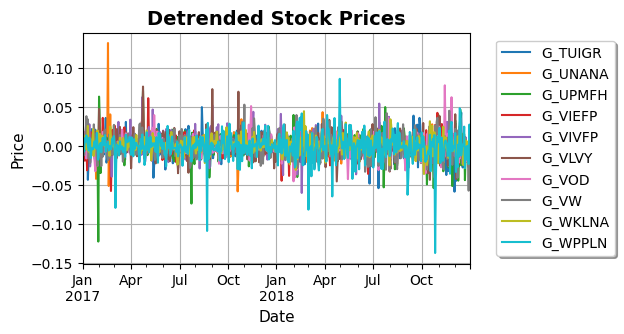

In [287]:
df = pd.read_csv(data_path + 'fsp_case_31_BSD.csv', index_col = 0, header = [0 ,1]) 
returns = df['ret'].copy().dropna(1) 
returns.index = pd.to_datetime(returns.index) 
returns = returns.iloc[:, -10:]

half = int(len(returns) / 2)
returns_train = returns.iloc[:half, :]
returns_test = returns.iloc[half:, :]


fig = plt.figure()
plt.rcParams['figure.figsize'] = [5, 3]

fig = returns.plot(linewidth = 1.5, alpha = 1).get_figure()
plt.xlabel('Date', fontsize = 11, fontweight = 'normal')
plt.ylabel('Price', fontsize = 11, fontweight = 'normal')
plt.title('Detrended Stock Prices', fontsize = 14, fontweight = 'bold')
plt.legend(loc = 'center left',bbox_to_anchor=(1.05, 0.5), fancybox=True, shadow=True)
plt.grid(visible = True)
plt.show()

fig.savefig(('Section 3/3_1_2_returns.pdf'), bbox_inches='tight')

In [288]:
def weights_opt(C, returns):
    """
    C: corr matrix.
    returns: returns data.
    """
    ones = np.ones((returns.shape[1], 1))
    L = float(1 / ones.T.dot(np.linalg.inv(C)).dot(ones))
    w_opt = L * np.linalg.inv(C).dot(ones)
    w_opt = w_opt.reshape(-1, )
    
    return w_opt

In [289]:
equaly_weighted = pd.DataFrame(index = ['Equally Weighted Training', 'Equally Weighted Testing'],
                                  columns = ['Mean Return', 'Cumulative Return', 
                                             'Variance of Returns', 'Theoretical Variance', 'Sharpe Ratio'])

minimum_variance = pd.DataFrame(index = ['Minimum Variance Training', 'Minimum Variance Testing'],
                                  columns = ['Mean Return', 'Cumulative Return', 
                                             'Variance of Returns', 'Theoretical Variance', 'Sharpe Ratio'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Mean Return Cumulative Return Variance of Returns  \
Equally Weighted Training     0.00086          0.223484          3.7495e-05   
Equally Weighted Testing    -0.000473         -0.123503         7.93339e-05   

                          Theoretical Variance Sharpe Ratio  
Equally Weighted Training                  NaN     0.140374  
Equally Weighted Testing                   NaN    -0.053126

Mean Return Cumulative Return Variance of Returns  \
Minimum Variance Training    0.000958          0.249062         2.86163e-05   
Minimum Variance Testing     -0.00016         -0.041823         5.84487e-05   

                          Theoretical Variance Sharpe Ratio  
Minimum Variance Training          2.86163e-05     0.179072  
Minimum Variance Testing           5.84487e-05     -0.02096

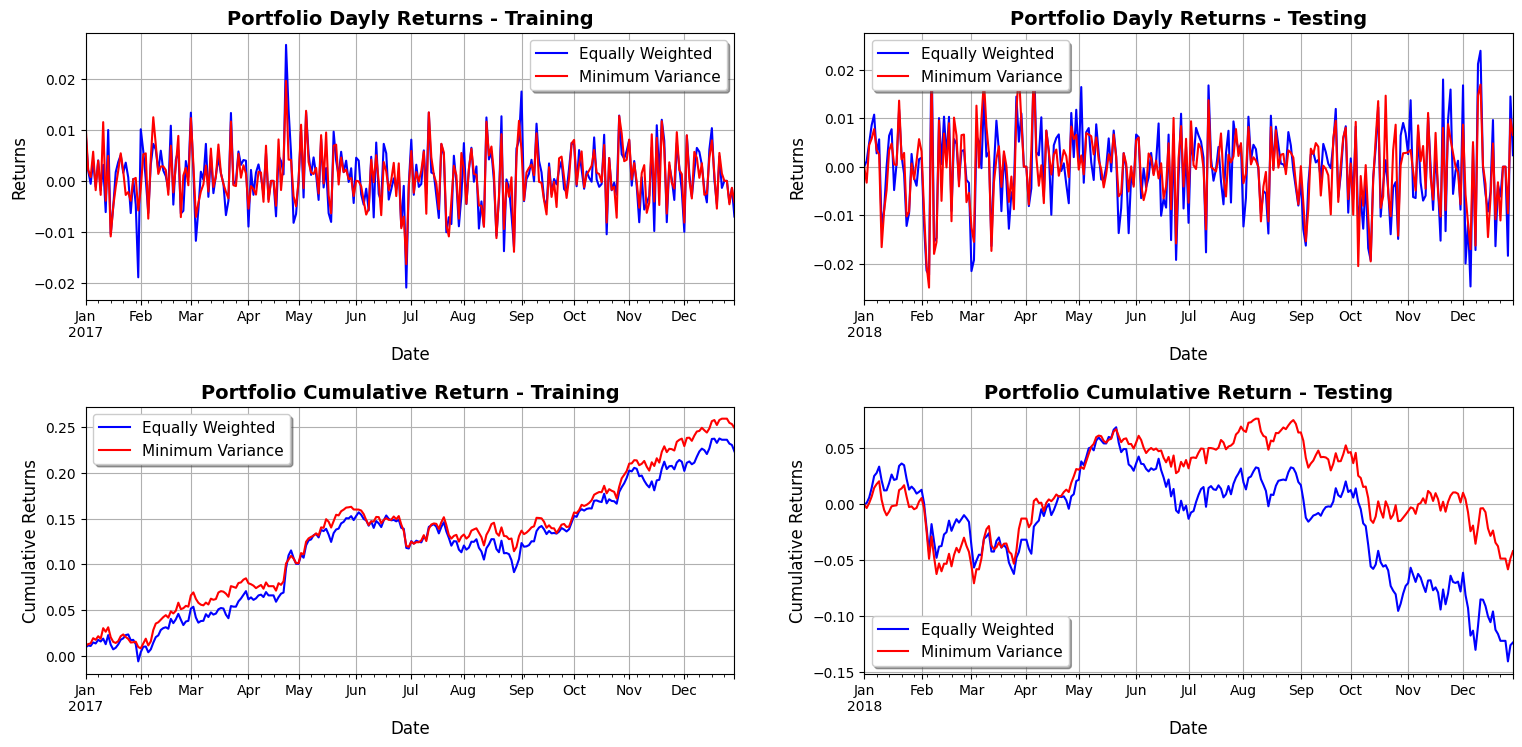

In [290]:
fig, axs = plt.subplots(2,2)
fig.set_figheight(7)
fig.set_figwidth(15)  
fig.tight_layout()
fig.subplots_adjust(hspace = 0.4, wspace = 0.2)

for i in range(0,2):
    if i == 0:
        ret = returns_train
        set = 'Training'
    else:
        ret= returns_test
        set = 'Testing'
    
    portfolio = ret.mean(1)

    # Equally weighted portfolio statistics
    equaly_weighted.loc[equaly_weighted.index[i],'Mean Return'] = portfolio.mean()
    equaly_weighted.loc[equaly_weighted.index[i],'Cumulative Return'] = portfolio.cumsum()[-1]
    equaly_weighted.loc[equaly_weighted.index[i],'Variance of Returns'] = str(round(portfolio.std()**2, 10))
    equaly_weighted.loc[equaly_weighted.index[i],'Sharpe Ratio'] = portfolio.mean() / portfolio.std()

    # Minimum variance portfolio statistics
    C = ret.cov()
    w_opt = weights_opt(C, ret)
    min_var_portfolio = (ret * w_opt).sum(1)
    one_matrix = np.ones((w_opt.shape)).reshape(-1, 1)
    theor_var = 1 / (one_matrix.T @ np.linalg.inv(C).T @ one_matrix)
    
    minimum_variance.loc[minimum_variance.index[i],'Mean Return'] = min_var_portfolio.mean()
    minimum_variance.loc[minimum_variance.index[i],'Cumulative Return'] = min_var_portfolio.cumsum()[-1]
    minimum_variance.loc[minimum_variance.index[i],'Variance of Returns'] = str(round(min_var_portfolio.std()**2, 10))
    minimum_variance.loc[minimum_variance.index[i],'Theoretical Variance'] = str(round(theor_var[0,0], 10))
    minimum_variance.loc[minimum_variance.index[i],'Sharpe Ratio'] = min_var_portfolio.mean() / min_var_portfolio.std()
    
    # plots    
    # Portfolio Returns
    portfolio.plot( ax = axs[0][i], color = 'blue', linewidth = 1.5, label = "Equally Weighted")
    axs[0][0].set_xlabel('Date', fontsize = 12, fontweight = 'normal')
    axs[0][0].set_ylabel('Returns', fontsize = 12, fontweight = 'normal')
    axs[0][0].set_title('Portfolio Dayly Returns - Training', fontsize = 14, fontweight = 'bold')
    axs[0][0].legend(fontsize = 11, fancybox=True, shadow=True)
    axs[0][0].grid(visible = True)

    # ARMA Residuals 
    portfolio.cumsum().plot(ax=axs[1][i], color = 'blue', linewidth = 1.5, label = "Equally Weighted")
    axs[1][0].set_xlabel('Date', fontsize = 12, fontweight = 'normal')
    axs[1][0].set_ylabel('Cumulative Returns', fontsize = 12, fontweight = 'normal')
    axs[1][0].set_title('Portfolio Cumulative Return - Training', fontsize = 14, fontweight = 'bold')
    axs[1][0].legend(fontsize = 11, fancybox=True, shadow=True)
    axs[1][0].grid(visible = True)


    # ARMA Prediction vs true prices (100-day Window)
    min_var_portfolio.plot( ax = axs[0][i], color = 'red', linewidth = 1.5, label = "Minimum Variance")
    axs[0][1].set_xlabel('Date', fontsize = 12, fontweight = 'normal')
    axs[0][1].set_ylabel('Returns', fontsize = 12, fontweight = 'normal')
    axs[0][1].set_title('Portfolio Dayly Returns - Testing', fontsize = 14, fontweight = 'bold')
    axs[0][1].legend(loc = 'upper left', fontsize = 11, fancybox=True, shadow=True)
    axs[0][1].grid(visible = True)

    # ARMA Residuals (100-day Window)
    min_var_portfolio.cumsum().plot( ax = axs[1][i], color = 'red', linewidth = 1.5, label = "Minimum Variance")
    axs[1][1].set_xlabel('Date', fontsize = 12, fontweight = 'normal')
    axs[1][1].set_ylabel('Cumulative Returns', fontsize = 12, fontweight = 'normal')
    axs[1][1].set_title('Portfolio Cumulative Return - Testing', fontsize = 14, fontweight = 'bold')
    axs[1][1].legend(loc = 'lower left', fontsize = 11, fancybox=True, shadow=True)
    axs[1][1].grid(visible = True)


fig.savefig(('Section 3/3_1_2_portfolio_analysis.pdf'), bbox_inches='tight')

display(equaly_weighted)
display(minimum_variance)

#### 3.1.3 Adaptive time-varying minimum variance portfolio analysis

In [7]:
adaptive_MV_portfolio = pd.DataFrame(index = ['Adaptive MV (w = 22)', 'Adaptive MV (w = 44)', 'Adaptive MV (w = 88)', 'Adaptive MV (w = 132)', 'Adaptive MV (w = 176)', 'Adaptive MV (w = 264)'],
                                  columns = ['Mean Return', 'Cumulative Return', 
                                             'Variance of Returns', 'Theoretical Variance', 'Sharpe Ratio'])

Mean Return Cumulative Return Variance of Returns  \
Adaptive MV (w = 22)     0.000286          0.074774        0.0001082415   
Adaptive MV (w = 44)     0.000233           0.06086           7.586e-05   
Adaptive MV (w = 88)     -0.00003         -0.007747          7.1112e-05   
Adaptive MV (w = 132)   -0.000244         -0.063607         6.98857e-05   
Adaptive MV (w = 176)   -0.000311         -0.081049          6.7946e-05   
Adaptive MV (w = 264)   -0.000444         -0.115937         6.66552e-05   

                      Theoretical Variance Sharpe Ratio  
Adaptive MV (w = 22)                   NaN     0.027537  
Adaptive MV (w = 44)                   NaN     0.026772  
Adaptive MV (w = 88)                   NaN     -0.00352  
Adaptive MV (w = 132)                  NaN    -0.029152  
Adaptive MV (w = 176)                  NaN    -0.037672  
Adaptive MV (w = 264)                  NaN    -0.054408

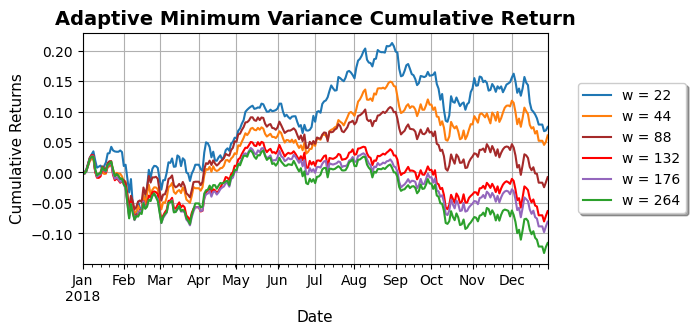

In [23]:
months = [1, 2, 4, 6, 8, 12]
windows =  [22 * i for i in months]
Returns = []
var = []
cum_returns = []
colors = ['tab:blue', 'tab:orange', 'brown', 'red', 'tab:purple', 'tab:green']

fig = plt.figure()
plt.rcParams['figure.figsize'] = [7, 3]
for j, w in enumerate(windows):  
    amv_portfolio = pd.Series(dtype = 'float64') 
    log_ret = []

    for i in returns_test.index:
        ret = returns[:i].iloc[(-w-1):-1] 
        C = ret.cov()
        w_opt = weights_opt(C, ret)

        amv_portfolio[i] = sum(returns_test.loc[i] * w_opt)
        log_ret.append(amv_portfolio[i])
 
    if w == 22:
        amv_22 = amv_portfolio.copy()
    
    Returns.append(log_ret)
    var.append(amv_portfolio.std()**2)

    adaptive_MV_portfolio.loc[adaptive_MV_portfolio.index[j],'Mean Return'] = np.mean(Returns[j]) 
    adaptive_MV_portfolio.loc[adaptive_MV_portfolio.index[j],'Cumulative Return'] = amv_portfolio.cumsum()[-1]
    adaptive_MV_portfolio.loc[adaptive_MV_portfolio.index[j],'Variance of Returns'] = str(round(var[j], 10))
    adaptive_MV_portfolio.loc[adaptive_MV_portfolio.index[j],'Sharpe Ratio'] = np.mean(Returns[j]) / amv_portfolio.std()

    #print('Variance (w = ' + str(w) + '): ' + str(round(var[j],10)))

    amv_portfolio.cumsum().plot(linewidth = 1.5, color = colors[j], alpha = 1, label = 'w = ' + str(w))
    plt.xlabel('Date', fontsize = 11, fontweight = 'normal')
    plt.ylabel('Cumulative Returns', fontsize = 11, fontweight = 'normal')
    plt.title('Adaptive Minimum Variance Cumulative Return', fontsize = 14, fontweight = 'bold')
    plt.legend(loc = 'center left',bbox_to_anchor=(1.05, 0.5), fancybox=True, shadow=True)
    plt.grid(visible = True)

fig.savefig(('Section 3/3_1_3_adaptive_MV_analysis.pdf'), bbox_inches='tight')
display(adaptive_MV_portfolio)


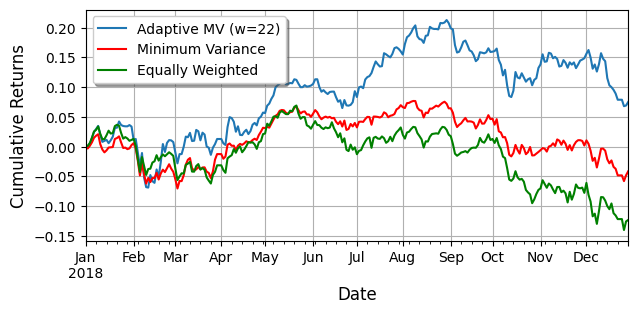

In [22]:
fig = plt.figure(figsize=(7,3))

amv_22.cumsum().plot(linewidth = 1.5, label = "Adaptive MV (w=22)")
min_var_portfolio.cumsum().plot(color = 'red', linewidth = 1.5, label = "Minimum Variance")
portfolio.cumsum().plot(color = 'green', linewidth = 1.5, label = "Equally Weighted")
plt.xlabel('Date', fontsize = 12, fontweight = 'normal')
plt.ylabel('Cumulative Returns', fontsize = 12, fontweight = 'normal')
plt.legend(loc = 'upper left', fontsize = 10, fancybox=True, shadow=True)
plt.grid(visible = True)

fig.savefig(('Section 3/3_1_3_comparison.pdf'), bbox_inches='tight')

The recursive update of the variables allows the model to respond to changing market conditions and maintain its minimum variance objective due to the shorter time periods considered. By continuously adjusting the portfolio weights based on the updated information about asset returns and covariances, the strategy can achieve better risk-adjusted performance compared to a static allocation approach. 

A different method to compute the sample covariance matrixcould be implemented to improve performance. One method is to apply exponential weight decay by assigning higher weights to more recent observations and exponentially decreasing weights to older observations. This approach allows for a more dynamic estimation of the covariance matrix, as it gives more importance to recent data points, making it more responsive to recent market changes.

## 4. Robust Statistics and Non Linear Methods

### 4.1 Data Import and Exploratory Data Analysis

#### 4.1.1 Key Statistics of AAPL, IBM, JPM, DJI

Three stocks: AAPL, IBM, JPM and one index: DJI are considered. For each asset the key descriptive statistics that summarize the distribution of the dataset are generated and reported in Table~\ref{table:8}. The key statistics reported are: mean, median, which give an insight of the data tendencies, standard deviation, median absolute deviation (MAD) and interquartile range (IQR), which quantify data dispersion, skewness to measure the asymmetry and kurtosis to measure the difference of the tail to a Normal distribution. 

In [24]:
# Read price data for AAPL, IBM, JPM and DJI.
AAPL = pd.read_csv(data_path + 'AAPL.csv', index_col = 0) 
AAPL.index = pd.to_datetime(AAPL.index) 

IBM = pd.read_csv(data_path + 'IBM.csv', index_col = 0)
IBM.index = pd.to_datetime(IBM.index)

JPM = pd.read_csv(data_path + 'JPM.csv', index_col = 0)
JPM.index = pd.to_datetime(JPM.index)

DJI = pd.read_csv(data_path + 'DJI.csv', index_col = 0)
DJI.index = pd.to_datetime(DJI.index)

data = {'AAPL': AAPL, 'IBM': IBM, 'JPM': JPM, 'DJI': DJI} 

AAPL.head(3) 

Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-03-16  178.649994  179.119995  177.619995  178.020004  175.349915   
2018-03-19  177.320007  177.470001  173.660004  175.300003  172.670731   
2018-03-20  175.240005  176.800003  174.940002  175.240005  172.611618   

              Volume  
Date                  
2018-03-16  39404700  
2018-03-19  33446800  
2018-03-20  19649400

In [25]:
symbols = ['AAPL', 'IBM', 'JPM', 'DJI'] 
dtypes = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'] 
key_stats = ['Mean', 'Median', 'StdDev', 'MAD', 'IQR', 'Skew', 'Kurtosis'] 

stats_df = pd.DataFrame(index = key_stats, columns = dtypes) 

stats = {'AAPL Stats': stats_df.copy(), 'IBM Stats': stats_df.copy(),'JPM Stats': stats_df.copy(), 'DJI Stats': stats_df.copy()}


In [26]:
for symbol in symbols:
    
    # access the specific stock-index.
    stock = data[symbol].copy()
    title = symbol + ' Stats'

    # For each data type.
    for dtype in dtypes:
        col = stock[dtype]

        # Compute all the statistics.
        stats[title][dtype]['Mean'] = col.mean()
        stats[title][dtype]['Median'] = col.median()
        stats[title][dtype]['StdDev'] = col.std()
        stats[title][dtype]['MAD'] =  median_abs_deviation(col)
        stats[title][dtype]['IQR'] = iqr(col)
        stats[title][dtype]['Skew'] = col.skew()
        stats[title][dtype]['Kurtosis'] = col.kurtosis()

    print("\n\033[1m" + title + "\033[0m")
    display(stats[title])


AAPL Stats


Open        High         Low       Close   Adj Close  \
Mean      187.686694  189.561753  185.823705  187.711953  186.174273   
Median    186.289993  187.399994  184.940002  186.119995  184.351776   
StdDev     22.145621   22.281577   22.008797   22.160721   21.904664   
MAD        15.889999   15.610001   15.919998   15.940002   15.476044   
IQR             36.0   36.339996   36.059998   36.755004    35.68544   
Skew        0.259917    0.300385    0.220489    0.263849     0.29077   
Kurtosis   -0.912594   -0.924602   -0.917632   -0.932425   -0.928017   

                   Volume  
Mean      32704750.199203  
Median         29184000.0  
StdDev    14179721.592994  
MAD             7573900.0  
IQR            16311700.0  
Skew             1.743317  
Kurtosis         4.353182


IBM Stats


Open        High         Low       Close   Adj Close  \
Mean      138.454382  139.492072  137.329243  138.363108  134.902751   
Median    142.809998  143.990005  142.059998  142.710007  138.566391   
StdDev     12.114308   11.913079   12.204633   12.028123   10.671648   
MAD         5.270004    5.309998    5.190002    5.230011    4.493515   
IQR        15.379998   14.720001   16.340004   15.504997   14.103938   
Skew       -0.676024   -0.622707   -0.713446   -0.682246   -0.811222   
Kurtosis   -0.585272   -0.623607   -0.561975   -0.584037   -0.420852   

                  Volume  
Mean      5198937.450199  
Median         4237900.0  
StdDev    3328955.530426  
MAD             920700.0  
IQR            1952950.0  
Skew            3.192896  
Kurtosis       11.796897


JPM Stats


Open        High         Low       Close   Adj Close  \
Mean      108.707689  109.652072  107.682988  108.606574   107.26259   
Median        109.18  110.529999  107.790001  109.019997  107.219269   
StdDev      5.359081     5.20287    5.432537     5.30048    4.833316   
MAD         4.470001    4.309997    4.239998    4.350006    3.450157   
IQR         8.810006    8.845002    8.845001    8.834999    7.222442   
Skew       -0.420811   -0.376221   -0.377517   -0.374853   -0.344491   
Kurtosis   -0.322536   -0.544163     -0.2657   -0.396579   -0.105437   

                   Volume  
Mean      14700689.243028  
Median         13633000.0  
StdDev     5349770.564456  
MAD             3035400.0  
IQR             6233600.0  
Skew             1.693457  
Kurtosis         4.430197


DJI Stats


Open          High           Low         Close  \
Mean      25001.257268  25142.041965  24846.002226  24999.153581   
Median    25025.580078  25124.099609  24883.039063  25044.289063   
StdDev      858.834708    815.203959    903.302186    859.132105   
MAD         543.541015     537.61914     601.56836    590.720703   
IQR         1109.43457   1077.816406   1204.418945   1158.155273   
Skew         -0.372127     -0.239367     -0.456447     -0.380147   
Kurtosis      0.485736      0.118153      0.557592      0.400668   

             Adj Close            Volume  
Mean      24999.153581  332889442.231076  
Median    25044.289063       313790000.0  
StdDev      859.132105    94078038.14115  
MAD         590.720703        50460000.0  
IQR        1158.155273       108930000.0  
Skew         -0.380147           1.73956  
Kurtosis      0.400668          5.857581

In [27]:
for symbol in symbols:
    data[symbol]['Returns'] = data[symbol]['Adj Close'].pct_change()

#### 4.1.2 Histograms and probability density functions

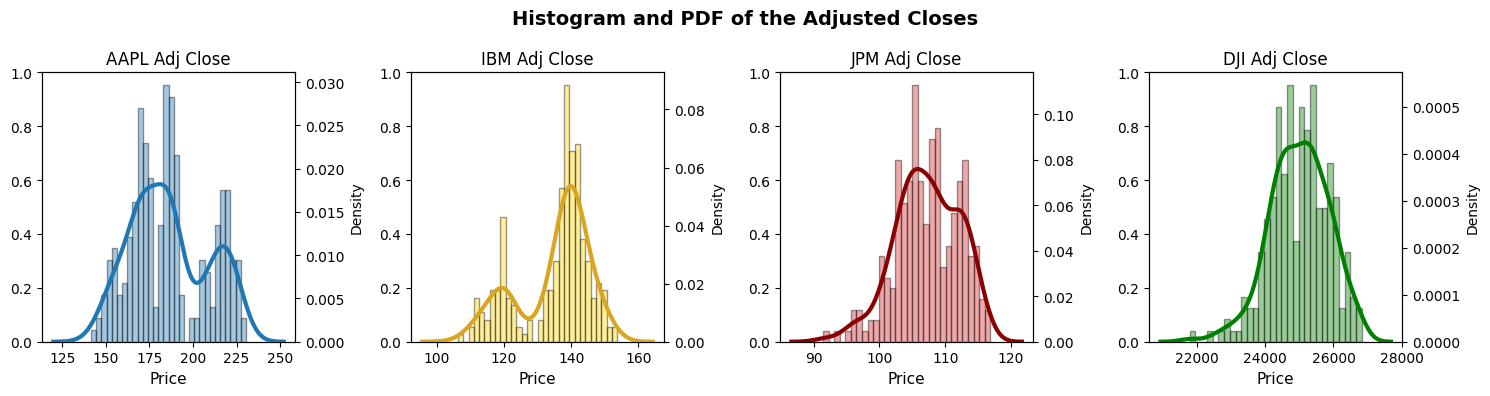

In [28]:
import warnings
warnings.filterwarnings('ignore')

colors_hist = ['tab:blue', 'gold', 'tab:red', 'green']
colors_pdf = ['tab:blue', 'goldenrod', 'darkred', 'green']

fig, axes = plt.subplots(1, 4)
fig.suptitle('Histogram and PDF of the Adjusted Closes', fontsize=14, fontweight="bold")
fig.set_size_inches(15,4)

for i, symbol in enumerate(symbols):
    axes[i].set_title(f'{symbol} Adj Close')
    axes[i].set_xlabel('Price', fontsize = 11, fontweight = 'normal')

    close_returns = data[symbol][['Adj Close']].dropna()
    #sns.histplot(data = close_returns['Adj Close'], ax=axes[i].twinx(), kde=True, bins=30, color=colors_hist[i], line_kws={'linewidth': 3.5})
    sns.distplot(close_returns['Adj Close'], ax=axes[i].twinx(), hist=True, kde=True, bins=30, color=colors_hist[i], hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 3, 'color':colors_pdf[i]})

fig.tight_layout()
fig.savefig(('Section 4/4_1_2_hist_adj.pdf'), bbox_inches='tight')


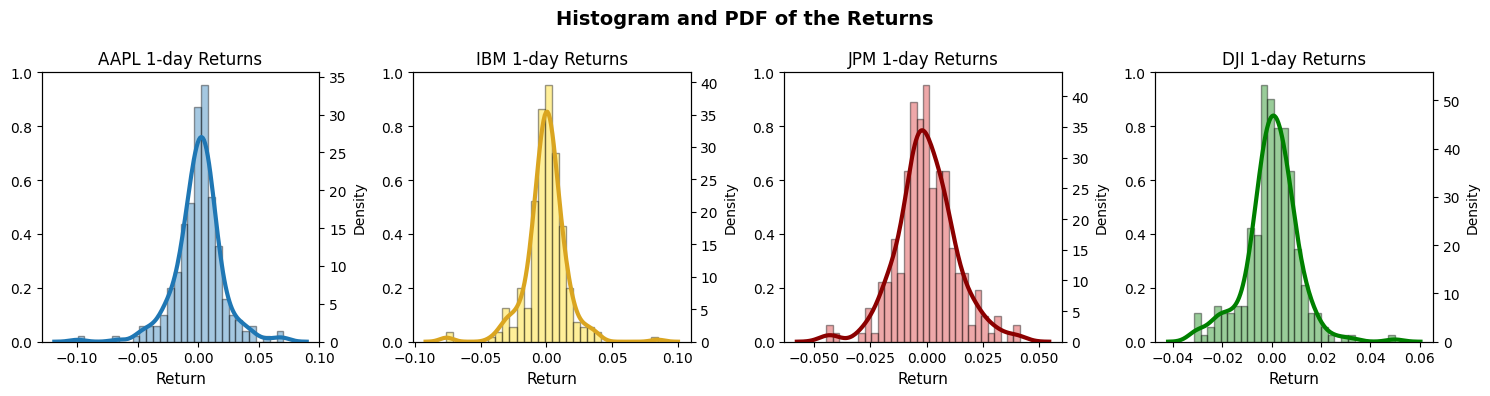

In [29]:
fig, axes = plt.subplots(1, 4)
fig.suptitle('Histogram and PDF of the Returns', fontsize=14, fontweight="bold")
fig.set_size_inches(15,4)

for i, symbol in enumerate(symbols):
    axes[i].set_title(f'{symbol} 1-day Returns')
    axes[i].set_xlabel('Return', fontsize = 11, fontweight = 'normal')

    close_returns = data[symbol][['Returns']].dropna()
    #sns.histplot(data = close_returns['Returns'], ax=axes[i].twinx(), kde=True, bins=30, color=colors_hist[i], line_kws={'linewidth': 3.5, 'color':colors_pdf[i]})
    sns.distplot(close_returns['Returns'], ax=axes[i].twinx(), hist=True, kde=True, bins=30, color=colors_hist[i], hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 3, 'color':colors_pdf[i]})

fig.tight_layout()
fig.savefig(('Section 4/4_1_2_hist_returns.pdf'), bbox_inches='tight')


#### 4.1.3 Rolling Mean and Median Analysis

In [30]:
outliers = pd.DataFrame(index = symbols, columns = ['Mean Method', 'Median Method', 'Mean Method with Outliers', 'Median Method with Outliers'])

Mean Method Median Method Mean Method with Outliers  \
AAPL          30           103                        32   
IBM           31            94                        31   
JPM           33           105                        33   
DJI           30            97                        29   

     Median Method with Outliers  
AAPL                         102  
IBM                           93  
JPM                          101  
DJI                           96

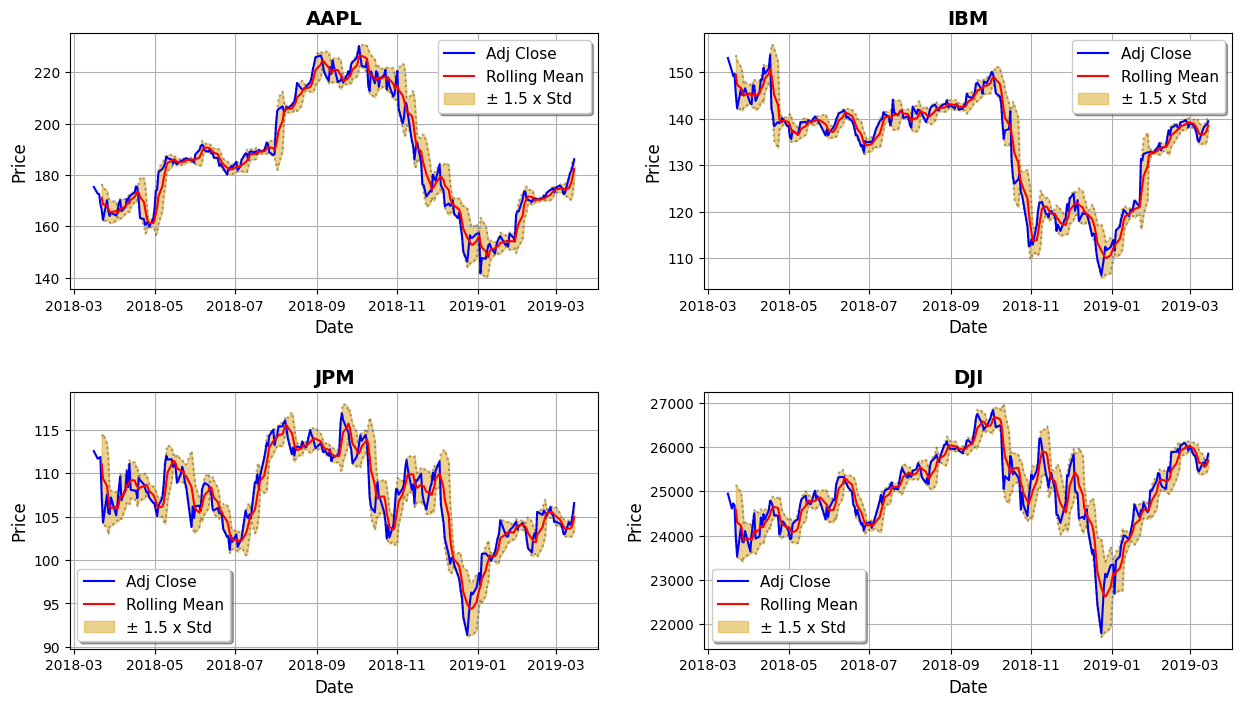

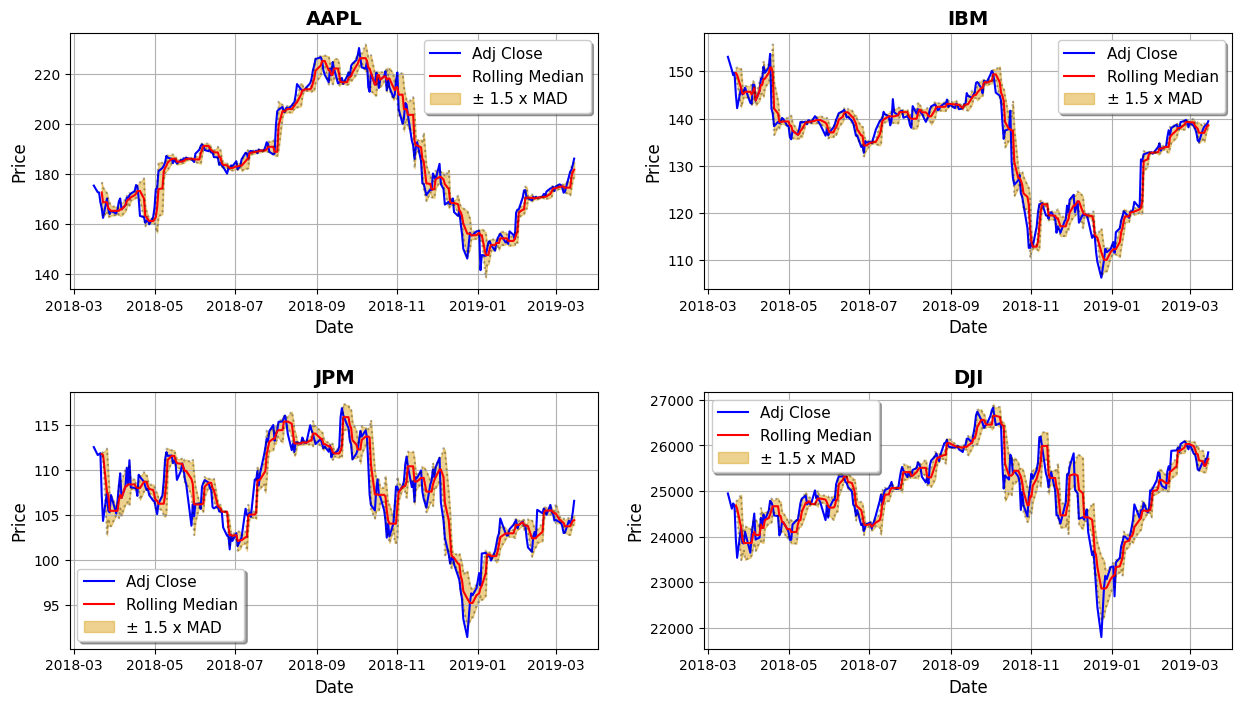

In [35]:
fig1, axes1 = plt.subplots(2, 2)
fig1.set_size_inches(15,8)
fig1.subplots_adjust(hspace = 0.4)
#fig1.suptitle('Mean Method', fontsize=14, fontweight="bold")


fig2, axes2 = plt.subplots(2, 2)
fig2.set_size_inches(15,8)
fig2.subplots_adjust(hspace = 0.4)
#fig2.suptitle('Median Method', fontsize=14, fontweight="bold")


w = 5 
for i, symbol in enumerate(symbols):
    adj_close_data = data[symbol]['Adj Close'].copy()

    # Mean
    rolling_mean = adj_close_data.rolling(w).mean()
    upper_bound_mean = rolling_mean + 1.5 * adj_close_data.rolling(w).std()
    lower_bound_mean = rolling_mean - 1.5 * adj_close_data.rolling(w).std()

    legend1 = ['Adj Close', 'Rolling Mean', '\u00B1 1.5 x Std']
    ax1 = axes1[int(i > 1)][int(i % 2)]

    #plot
    ax1.plot(adj_close_data, color = 'b', label = legend1[0])
    ax1.plot(rolling_mean, color = 'r', label = legend1[1])
    ax1.plot(upper_bound_mean, ':', color = 'k', alpha = 0.3)
    ax1.plot(lower_bound_mean, ':', color = 'k', alpha = 0.3)
    ax1.fill_between(rolling_mean.index, upper_bound_mean, lower_bound_mean, color = 'goldenrod', alpha = 0.5, label = legend1[2])
    ax1.set_xlabel('Date', fontsize = 12, fontweight = 'normal')
    ax1.set_ylabel('Price', fontsize = 12, fontweight = 'normal')
    ax1.set_title(f'{symbol}', fontsize = 14, fontweight = 'bold')
    ax1.legend(fontsize = 11, fancybox=True, shadow=True)
    ax1.grid(visible = True)

    # Median 
    rolling_median = adj_close_data.rolling(w).median()
    upper_bound_median = rolling_median + 1.5 * adj_close_data.rolling(w).apply(median_abs_deviation, raw=True)
    lower_bound_median = rolling_median - 1.5 * adj_close_data.rolling(w).apply(median_abs_deviation, raw=True)
    
    legend2 = ['Adj Close', 'Rolling Median', '\u00B1 1.5 x MAD']
    ax2 = axes2[int(i > 1)][int(i % 2)]

    #plot
    ax2.plot(adj_close_data, color = 'b', label = legend2[0])
    ax2.plot(rolling_median, color = 'r', label = legend2[1])
    ax2.plot(upper_bound_median, ':', color = 'k', alpha = 0.3)
    ax2.plot(lower_bound_median, ':', color = 'k', alpha = 0.3)
    ax2.fill_between(rolling_median.index, upper_bound_median, lower_bound_median, color = 'goldenrod', alpha = 0.5, label = legend2[2])
    ax2.set_xlabel('Date', fontsize = 12, fontweight = 'normal')
    ax2.set_ylabel('Price', fontsize = 12, fontweight = 'normal')
    ax2.set_title(f'{symbol}', fontsize = 14, fontweight = 'bold')
    ax2.legend(fontsize = 11, fancybox=True, shadow=True)
    ax2.grid(visible = True)

    outliers.loc[symbol]['Mean Method'] = len(adj_close_data[adj_close_data > upper_bound_mean]) + len(adj_close_data[adj_close_data < lower_bound_mean])
    outliers.loc[symbol]['Median Method'] = len(adj_close_data[adj_close_data > upper_bound_median]) + len(adj_close_data[adj_close_data < lower_bound_median])
        

display(outliers)

fig1.savefig(('Section 4/4_1_3_mean.pdf'), bbox_inches='tight')
fig2.savefig(('Section 4/4_1_3_median.pdf'), bbox_inches='tight')



#### 4.1.4 Rolling Mean and Median Analysis with outliers

Four outlier points for the adjusted closing prices were introduced in the the dates {14-05-2018, 14-09-2018, 14-12-2018 and 14-01-2019 } with a value equal to $1.2 \times$ the maximum value of the column.

In [33]:
dates = ['2018-05-14', '2018-09-14', '2018-12-14', '2019-01-14']

Mean Method Median Method Mean Method with Outliers  \
AAPL          30           103                        32   
IBM           31            94                        31   
JPM           33           105                        33   
DJI           30            97                        29   

     Median Method with Outliers  
AAPL                         102  
IBM                           93  
JPM                          101  
DJI                           96

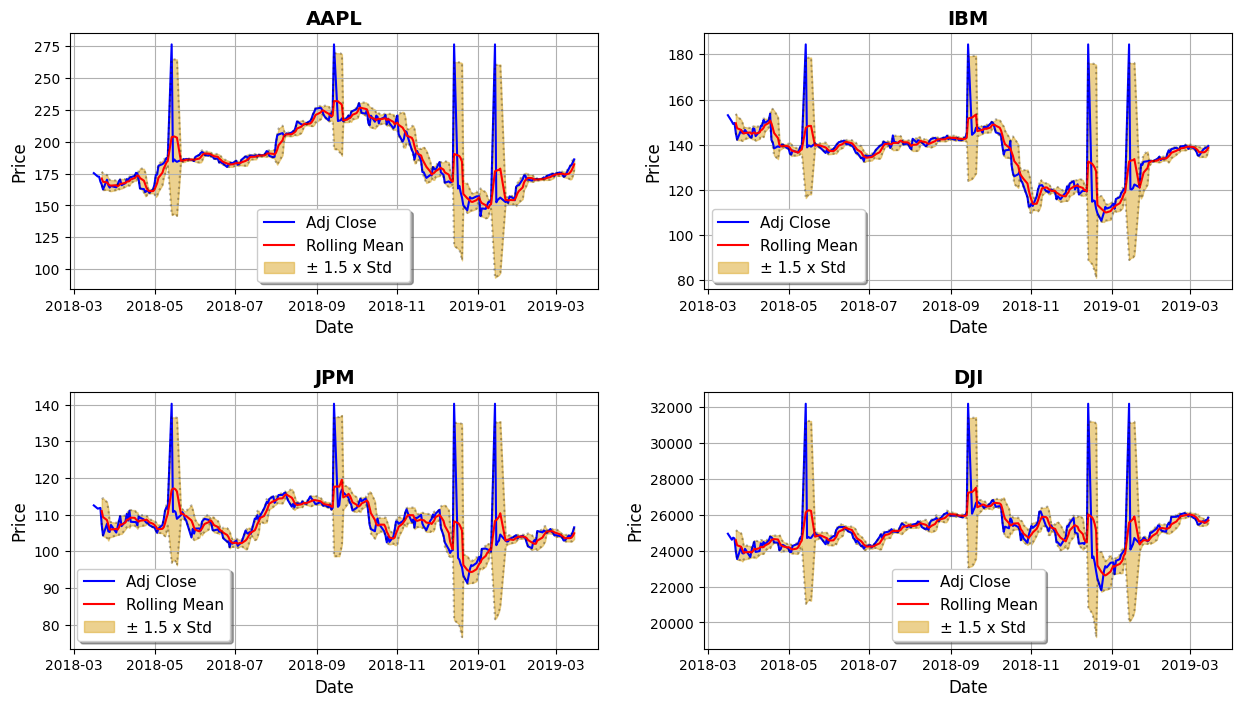

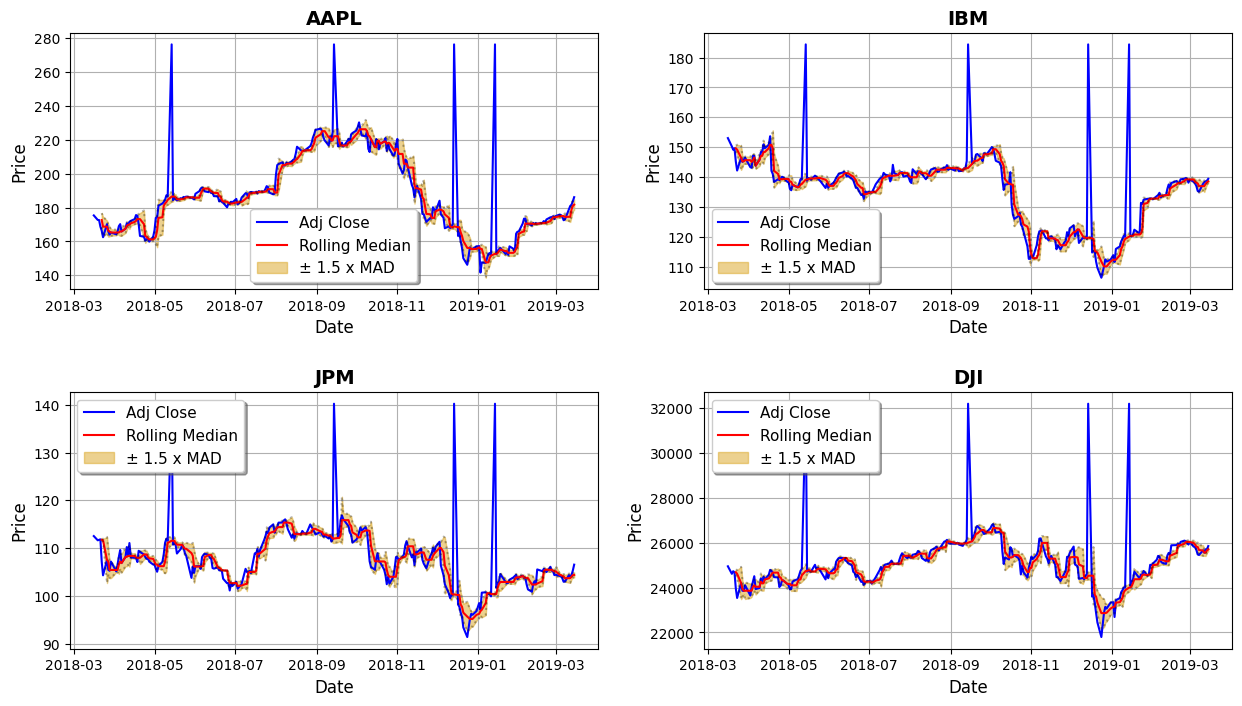

In [36]:
fig1, axes1 = plt.subplots(2, 2)
#fig1.suptitle('Rolling Mean', fontsize=14, fontweight="bold")
fig1.set_size_inches(15,8)
fig1.subplots_adjust(hspace = 0.4)
#fig1.suptitle('Mean Method with Outliers', fontsize=14, fontweight="bold")

fig2, axes2 = plt.subplots(2, 2)
#fig2.suptitle('Rolling Median', fontsize=14, fontweight="bold")
fig2.set_size_inches(15,8)
fig2.subplots_adjust(hspace = 0.4)
#fig2.suptitle('Median Method with Outliers', fontsize=14, fontweight="bold")

w = 5 
for i, symbol in enumerate(symbols):
    adj_close_data = data[symbol]['Adj Close'].copy()
    max_price = adj_close_data.max()

    for date in dates:
        adj_close_data[date] = 1.2 * max_price

    # Mean
    rolling_mean = adj_close_data.rolling(w).mean()
    upper_bound_mean = rolling_mean + 1.5 * adj_close_data.rolling(w).std()
    lower_bound_mean = rolling_mean - 1.5 * adj_close_data.rolling(w).std()

    legend1 = ['Adj Close', 'Rolling Mean', '\u00B1 1.5 x Std']
    ax1 = axes1[int(i > 1)][int(i % 2)]

    #plot
    ax1.plot(adj_close_data, color = 'b', label = legend1[0])
    ax1.plot(rolling_mean, color = 'r', label = legend1[1])
    ax1.plot(upper_bound_mean, ':', color = 'k', alpha = 0.3)
    ax1.plot(lower_bound_mean, ':', color = 'k', alpha = 0.3)
    ax1.fill_between(rolling_mean.index, upper_bound_mean, lower_bound_mean, color = 'goldenrod', alpha = 0.5, label = legend1[2])
    ax1.set_xlabel('Date', fontsize = 12, fontweight = 'normal')
    ax1.set_ylabel('Price', fontsize = 12, fontweight = 'normal')
    ax1.set_title(f'{symbol}', fontsize = 14, fontweight = 'bold')
    ax1.legend(fontsize = 11, fancybox=True, shadow=True)
    ax1.grid(visible = True)

    # Median 
    rolling_median = adj_close_data.rolling(w).median()
    upper_bound_median = rolling_median + 1.5 * adj_close_data.rolling(w).apply(median_abs_deviation, raw=True)
    lower_bound_median = rolling_median - 1.5 * adj_close_data.rolling(w).apply(median_abs_deviation, raw=True)
    
    legend2 = ['Adj Close', 'Rolling Median', '\u00B1 1.5 x MAD']
    ax2 = axes2[int(i > 1)][int(i % 2)]

    #plot
    ax2.plot(adj_close_data, color = 'b', label = legend2[0])
    ax2.plot(rolling_median, color = 'r', label = legend2[1])
    ax2.plot(upper_bound_median, ':', color = 'k', alpha = 0.3)
    ax2.plot(lower_bound_median, ':', color = 'k', alpha = 0.3)
    ax2.fill_between(rolling_median.index, upper_bound_median, lower_bound_median, color = 'goldenrod', alpha = 0.5, label = legend2[2])
    ax2.set_xlabel('Date', fontsize = 12, fontweight = 'normal')
    ax2.set_ylabel('Price', fontsize = 12, fontweight = 'normal')
    ax2.set_title(f'{symbol}', fontsize = 14, fontweight = 'bold')
    ax2.legend(fontsize = 11, fancybox=True, shadow=True)
    ax2.grid(visible = True)

    outliers.loc[symbol]['Mean Method with Outliers'] = len(adj_close_data[adj_close_data > upper_bound_mean]) + len(adj_close_data[adj_close_data < lower_bound_mean])
    outliers.loc[symbol]['Median Method with Outliers'] = len(adj_close_data[adj_close_data > upper_bound_median]) + len(adj_close_data[adj_close_data < lower_bound_median])
        

display(outliers)

fig1.savefig(('Section 4/4_1_4_mean_outliers.pdf'), bbox_inches='tight')
fig2.savefig(('Section 4/4_1_4_median_outliers.pdf'), bbox_inches='tight')

#### 4.1.5 Box Plots Analysis

A box plot is a method for graphically illustrating the descriptive statistics and demonstrating the locality, spread, and skewness of the data. The the black vertical line in the box represents the median while the left and right boundaries of the box represent the first and third quartile respectively, thus the blue shaded area denotes the interquartile range (IQR). The left and right vertical lines away from the box indicate the minimum and maximum respectively, whereas the red dots outside of the plot represent the outliers.

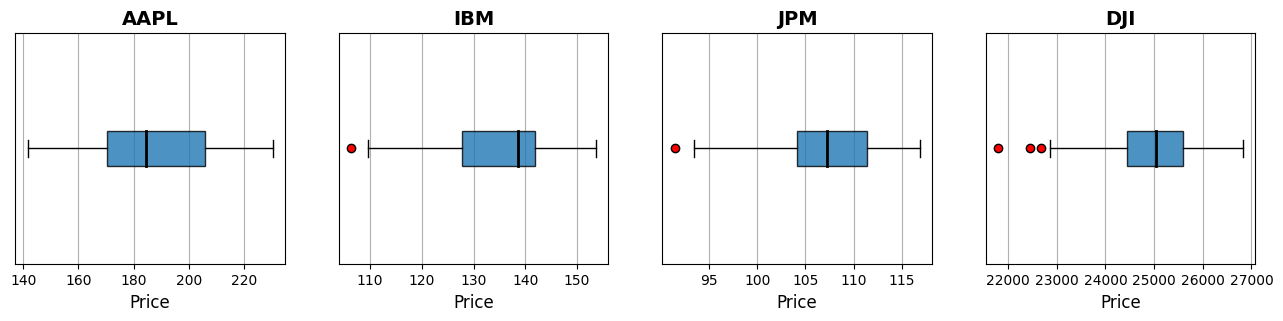

In [37]:
fig, axes = plt.subplots(1, 4)
fig.set_size_inches(16,3)

for i, symbol in enumerate(symbols):  
    bplot = axes[i].boxplot(data[symbol]['Adj Close'], vert=False, boxprops=dict(alpha=0.8), flierprops = dict(markerfacecolor = 'r', marker= 'o'), patch_artist=True, medianprops = dict(color='k', linewidth = 2))
    axes[i].set_yticks([])
    axes[i].grid('on')
    axes[i].set_xlabel('Price', fontsize = 12, fontweight = 'normal')
    axes[i].set_title(f'{symbol}', fontsize = 14, fontweight = 'bold')

fig.savefig(('Section 4/4_1_5_boxplots.pdf'), bbox_inches='tight')


### 4.2 Robust Estimators

#### 4.2.1 Estimators implementations

In [14]:
# Robust location estimator
def median_estimator(data):
    sorted_data = data.sort_values()
    n = len(sorted_data)
    if n % 2 == 0:
        median = (sorted_data.iloc[n // 2 - 1] + sorted_data.iloc[n // 2]) / 2
    else:
        median = sorted_data.iloc[n // 2]
    return median

# Robust scale estimators
def iqr_estimator(data):
    """
    sorted_data = data.sort_values()
    q1 = sorted_data.quantile(0.25)
    q3 = sorted_data.quantile(0.75)
    iqr = q3 - q1
    """
    sorted_data = data.sort_values()
    n = len(sorted_data)
    if n % 4 == 0:
        q1 = sorted_data.iloc[n // 4]
        q3 = sorted_data.iloc[(3 * n) // 4]
    else:
        q1 = (sorted_data.iloc[n // 4 - 1] + sorted_data.iloc[n // 4]) / 2
        q3 = (sorted_data.iloc[(3 * n) // 4 - 1] + sorted_data.iloc[(3 * n) // 4]) / 2
    iqr = q3 - q1
    return iqr

def mad_estimator(data):
    mad = median_estimator(abs(data - median_estimator(data)))
    return mad

In [125]:
# Initialise and populate comparison dataframe.
compare = pd.DataFrame(columns = ['Built-in Median','median_estimator', 'Built-in IQR', 'iqr_estimator','Built-in MAD', 'mad_estimator'], index = tickers)

for symbol in symbols:
    adj_close_data = data[symbol]['Adj Close'].copy()
    compare.loc[symbol] = [adj_close_data.median(), median_estimator(adj_close_data),iqr(adj_close_data), iqr_estimator(adj_close_data),median_abs_deviation(adj_close_data), mad_estimator(adj_close_data)]

display(compare)

Built-in Median median_estimator Built-in IQR iqr_estimator Built-in MAD  \
AAPL      184.351776       184.351776     35.68544     35.691315    15.476044   
IBM       138.566391       138.566391    14.103938     14.684692     4.493515   
JPM       107.219269       107.219269     7.222442      7.287441     3.450157   
DJI     25044.289063     25044.289063  1158.155273   1171.695312   590.720703   

     mad_estimator  
AAPL     15.476044  
IBM       4.493515  
JPM       3.450157  
DJI     590.720703

#### 4.2.2 Computational Efficiency Analysis

The computational complexity of `median_estimator` can be determined by analysizing its individual components. Sorting the data using the Pandas built-in function `sort_values` that applies a quicksort algorithm, has a complexity of $\mathcal{O}(n~log(n))$, where $n$ is the length of the `pandas.Series`. The other operations have complexity $\mathcal{O}(1)$ because  accessing specific elements in a `pandas.Series`, performing arithmetic (modulus) and the built-in `len` function that accesses the length of the series, are constant-time operations. Therefore the overall computational complexity is $\mathcal{O}(n~log(n))$. 
    
Similarly to the `median_estimator`, the `iqr_estimator` requires sorting using quicksort, uses `len`, performs arithmetic operations and accesses specific elements in a `pandas.Series`. Hence, the overall computational complexity is the same: $\mathcal{O}(n~log(n))$.

The `mad_estimator` requires finding the median which has complexity of $\mathcal{O}(n~log(n))$, as previously discussed. Then, subtracting the median from the data and taking the absolute values of the resulting `pandas.Series` takes $\mathcal{O}(n)$ time, as each element in the list has to be visited once. In the end the `median_estimator` is called again on the absolute deviations which has again $\mathcal{O}(n~log(n))$ complexity. Therefore the overall complexity is $\mathcal{O}(n~log(n)) + \mathcal{O}(n~log(n)) + \mathcal{O}(n)$ which can which can be simplified to $\mathcal{O}(n~log(n))$ complexity.

#### 4.2.3 Breakdown Points

Breakdown point analysis is a statistical technique used to evaluate the robustness of an estimator in the presence of outliers. The breakdown point of an estimator refers to the percentage of outliers that the estimator can tolerate before it completely breaks down and gives incorrect results.

The breakdown point of the median is 50\%, meaning that up to 50\% of the data can be contaminated or replaced with extreme values before the median becomes an arbitrary or excessively large value. This high breakdown point makes the median a robust statistic that is resistant to the influence of outliers. 

Similarly, the IQR needs to estimate the 25th and
75th percentiles, which is equivalent to splitting the data in half and finding the median of each half series. Therefore the breakdown point of the IQR is 25\%. Hence a quarter of the data can be contaminated or replaced before the estimator breaks down. 

Finally, since MAD is based on the median (calculated by finding the median of the absolute deviations of each data point from the overall median of the dataset), it inherits the median's robustness and resistance to outliers. Therefore the breakdown point is 50\%.

### 4.3 Robust and Ordinary Least Squares (OLS) Regression

#### 4.3.1 Ordinary Least Squares (OLS) Regression

The regression problem solved with OLS is defined by:
$$
    \mathbf{r} = \mathbf{A}\mathbf{x} + \mathbf{e}
$$

where $\mathbf{r}$ is the vector of returns of the stock, $\mathbf{A}$ is a matrix containing one column with ones and one with the DJI returns, $\mathbf{e}$ is the error and $\mathbf{x}$ is the coefficient vectors that relates the returns of the stock with the ones of DJI. 

OLS regression seeks to minimize the mean squared error expressed as: 
$$
    \min_{\mathbf{x}} ||\mathbf{e}||^2 = ||\mathbf{r} - \mathbf{A}\mathbf{x}||^2
$$

where the optimal solution can be computed to be

$$
    \mathbf{x}^{*} = (\mathbf{A}^{\top} \mathbf{A})^{-1} \mathbf{A}^{\top} \mathbf{r}
$$

However, in the case of an outlying point, the error that is objective to minimization will be very large. This high sensitivity to data corruption affects significantly the performance of the underlying regression model. 

In [14]:
returns = pd.DataFrame(columns = symbols)
for symbol in symbols:
    returns[symbol] = data[symbol]['Returns'].copy().dropna()


params = pd.DataFrame(index = symbols, columns = ['OLS \u03B1', 'OLS \u03B2', 'OLS MSE','Huber \u03B1', 'Huber \u03B2', 'Huber MSE' ])
#params = params.drop(index='DJI')

In [15]:
def regression_model(returns, regressor, method, parameters):
    fig, ax = plt.subplots(2,3, figsize = (16,7))
    #fig.set_size_inches(15,7)
    #fig.subplots_adjust(hspace = 0.8, wspace = 0.2)
    fig.tight_layout(pad=4)

    x = returns['DJI'].copy().values.reshape(-1,1)
    x_vals = np.linspace(x.min()-0.01, x.max()+0.01)

    for i, symbol in enumerate(symbols):
        y = returns[symbol].copy().values.reshape(-1, 1)

        # Fit regression model
        model = regressor.fit(x, y.ravel())

        parameters[f'{method} \u03B1'][symbol] = float(model.intercept_)
        parameters[f'{method} \u03B2'][symbol] = float(model.coef_)

        if symbol != 'DJI':
            #prediction
            prediction = regressor.predict(x)
            parameters[f'{method} MSE'][symbol] = mean_squared_error(y, prediction)

            ax[0][i].plot(returns[symbol].index, y, label = 'original')
            ax[0][i].plot(returns[symbol].index, prediction, color = 'r', label = f'{method} prediction')
            ax[0][i].set_xlabel('Date', fontsize = 12, fontweight = 'normal')
            ax[0][i].set_ylabel('Returns', fontsize = 12, fontweight = 'normal')
            ax[0][i].set_title(f'{symbol} {method} Prediction', fontsize = 14, fontweight = 'bold')
            #ax[0][i].set_xticklabels(ax[0][i].get_xticklabels(), rotation=10, horizontalalignment='right')
            ax[0][i].legend(fontsize = 11, fancybox=True, shadow=True)
            ax[0][i].grid(visible = True)

            # Regression
            reg_line = model.coef_ * x_vals + model.intercept_
            
            ax[1][i].plot(x, y, '.')
            ax[1][i].plot(x_vals, reg_line, color = 'r')
            ax[1][i].set_xlabel('DJI Returns', fontsize = 12, fontweight = 'normal')
            ax[1][i].set_ylabel(f'{symbol} Returns', fontsize = 12, fontweight = 'normal')
            ax[1][i].set_title(f'{symbol} vs DJI {method} Regression', fontsize = 14, fontweight = 'bold')
            ax[1][i].grid(visible = True)

    display(parameters)
    fig.savefig(('Section 4/4_3_'+ method +'.pdf'), bbox_inches='tight')



OLS α     OLS β   OLS MSE Huber α Huber β Huber MSE
AAPL  0.000165   1.32558   0.00018     NaN     NaN       NaN
IBM  -0.000441  0.960092   0.00014     NaN     NaN       NaN
JPM  -0.000316  0.931408  0.000076     NaN     NaN       NaN
DJI        0.0       1.0       NaN     NaN     NaN       NaN

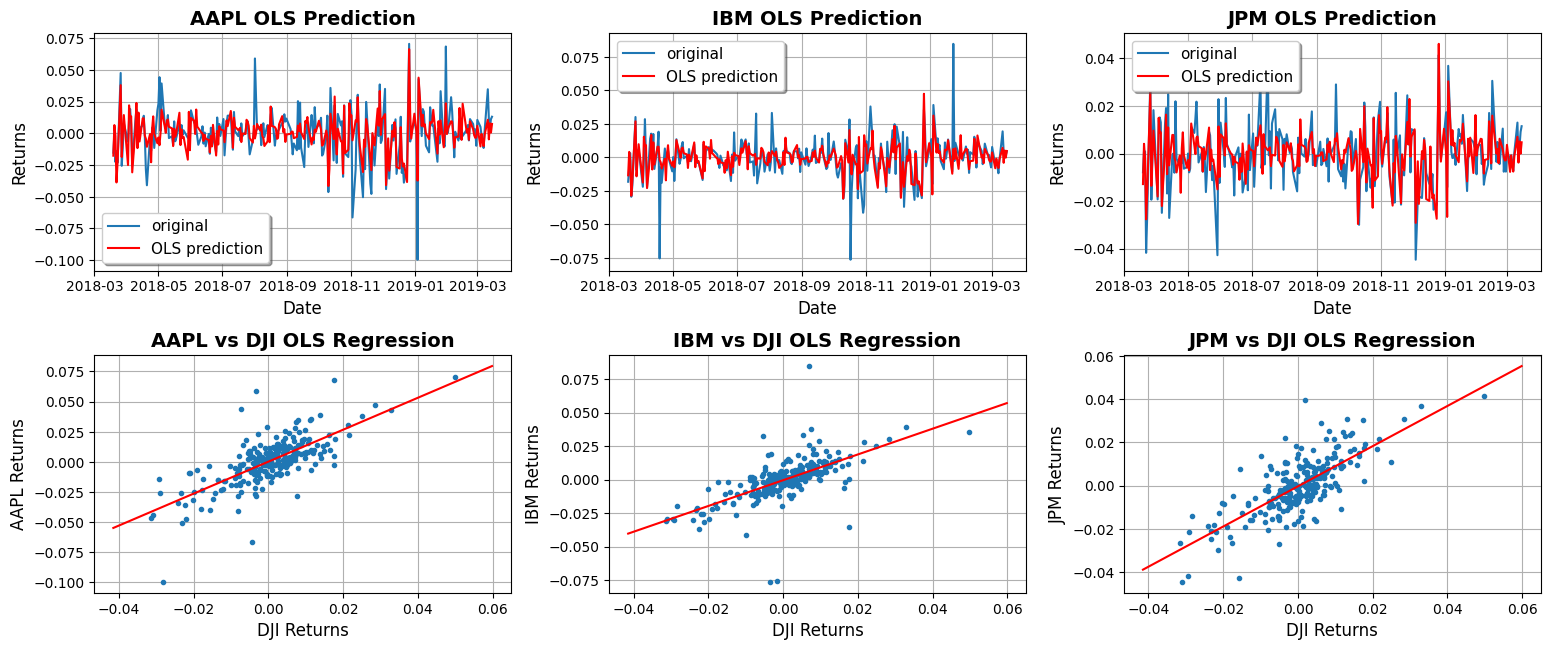

In [16]:
ols_regressor = linear_model.LinearRegression().predict()
regression_model(returns, ols_regressor, 'OLS', params) 


#### 4.3.2 Huber (robust) Regression

Huber regression improves on the OLS method by transforming the minimization problem if the error values exceed a threshold $\epsilon$. Thus limiting the overshoot of the error caused by an outlier. 
$$
    \min_{\mathbf{x}} \begin{cases}||\mathbf{e}||^2 = ||\mathbf{r} - \mathbf{A}\mathbf{x}||^2, & \text {~ for ~} \frac{||\mathbf{r} - \mathbf{A}\mathbf{x}||}{\sigma}<\epsilon \\ 
    ||\mathbf{e}|| = ||\mathbf{r} - \mathbf{A}\mathbf{x}||, & \text {~ for ~} \frac{||\mathbf{r} - \mathbf{A}\mathbf{x}||}{\sigma} \geq \epsilon\end{cases}
$$

The parameter $\epsilon$ represents the value after which a point is considered an outlier. Therefore by imposing a threshold $\epsilon$ and modifying the objective function, the impact of the outlier is reduced as they are on a linear scale rather than quadratic. Thus making the regression method more robust.

OLS α     OLS β   OLS MSE   Huber α   Huber β Huber MSE
AAPL  0.000165   1.32558   0.00018  -0.00013  1.270212   0.00018
IBM  -0.000441  0.960092   0.00014 -0.000509  0.973562   0.00014
JPM  -0.000316  0.931408  0.000076 -0.000801  0.919662  0.000076
DJI        0.0       1.0       NaN       0.0       1.0       NaN

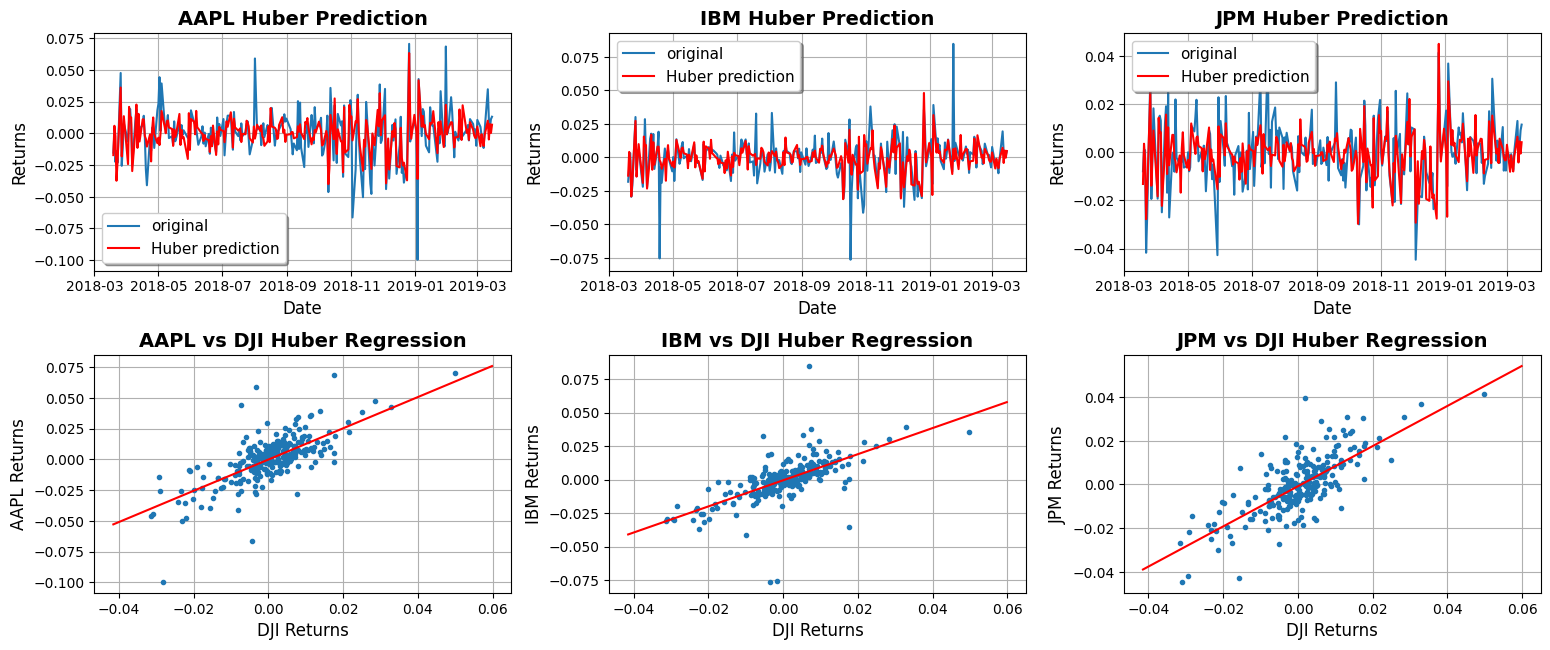

In [17]:
huber_regressor = linear_model.HuberRegressor()
regression_model(returns, huber_regressor, 'Huber', params)

#### 4.3.3 Performance assessment of both regression methods against outliers

In [18]:
dates = ['2018-05-14', '2018-09-14', '2018-12-14', '2019-01-14']
for symbol in symbols:
    max_val = returns[symbol].max()
    for date in dates:
        returns[symbol][date] = 1.2 * max_val
        
outliers = pd.DataFrame(index = symbols, columns = ['OLS with Outliers \u03B1', 'OLS with Outliers \u03B2', 'OLS with Outliers MSE', \
                                                    'Huber with Outliers \u03B1', 'Huber with Outliers \u03B2', 'Huber with Outliers MSE' ])

In [19]:
def comparison(returns, regressor1, regressor2, parameters):
    fig, ax = plt.subplots(2,3, figsize = (16,7))
    fig.tight_layout(pad=4)

    x = returns['DJI'].copy().values.reshape(-1,1)
    x_vals = np.linspace(x.min()-0.01, x.max()+0.01)

    for i, symbol in enumerate(symbols):
        y = returns[symbol].copy().values.reshape(-1, 1)

        # Fit regression model
        ols = regressor1.fit(x, y.ravel())
        huber = regressor2.fit(x, y.ravel())

        parameters['OLS with Outliers \u03B1'][symbol] = float(ols.intercept_)
        parameters['OLS with Outliers \u03B2'][symbol] = float(ols.coef_)

        parameters['Huber with Outliers \u03B1'][symbol] = float(huber.intercept_)
        parameters['Huber with Outliers \u03B2'][symbol] = float(huber.coef_)

        if symbol != 'DJI':
            #prediction
            prediction1 = regressor1.predict(x)
            prediction2 = regressor2.predict(x)

            parameters['OLS with Outliers MSE'][symbol] = mean_squared_error(y, prediction1)
            parameters['Huber with Outliers MSE'][symbol] = mean_squared_error(y, prediction2)


            ax[0][i].plot(returns[symbol].index, y, label = 'original + outliers', color ='b')
            ax[0][i].plot(returns[symbol].index, prediction1, color ='r', label = 'OLS prediction')
            ax[0][i].plot(returns[symbol].index, prediction2, color ='limegreen', label = 'Huber prediction')

            ax[0][i].set_xlabel('Date', fontsize = 12, fontweight = 'normal')
            ax[0][i].set_ylabel('Returns', fontsize = 12, fontweight = 'normal')
            ax[0][i].set_title(f'{symbol} Prediction with Outliers', fontsize = 14, fontweight = 'bold')
            #ax[0][i].set_xticklabels(ax[0][i].get_xticklabels(), rotation=10, horizontalalignment='right')
            ax[0][i].legend(fontsize = 11, fancybox=True)
            ax[0][i].grid(visible = True)

            # Regression
            reg_line1 = ols.coef_ * x_vals + ols.intercept_
            reg_line2 = huber.coef_ * x_vals + huber.intercept_
            
            ax[1][i].plot(x, y, '.',color ='b')
            ax[1][i].plot(x_vals, reg_line1, linewidth = 2, color ='r', label = 'OLS prediction')
            ax[1][i].plot(x_vals, reg_line2, linewidth = 2, color ='limegreen', label = 'Huber prediction')
            ax[1][i].set_xlabel('DJI Returns', fontsize = 12, fontweight = 'normal')
            ax[1][i].set_ylabel(f'{symbol} Returns', fontsize = 12, fontweight = 'normal')
            ax[1][i].set_title(f'{symbol} vs DJI Regressions with Outliers', fontsize = 14, fontweight = 'bold')
            ax[1][i].legend(fontsize = 11, fancybox=True, shadow=True)
            ax[1][i].grid(visible = True)

    display(parameters)
    fig.savefig(('Section 4/4_3_outliers.pdf'), bbox_inches='tight')


OLS with Outliers α OLS with Outliers β OLS with Outliers MSE  \
AAPL             0.00035            1.350465              0.000179   
IBM            -0.000063             1.22204               0.00016   
JPM            -0.000467            0.906468              0.000075   
DJI                  0.0                 1.0                   NaN   

     Huber with Outliers α Huber with Outliers β Huber with Outliers MSE  
AAPL              0.000122              1.330773                0.000179  
IBM              -0.000339              1.066643                0.000164  
JPM              -0.000933              0.890359                0.000075  
DJI                    0.0                   1.0                     NaN

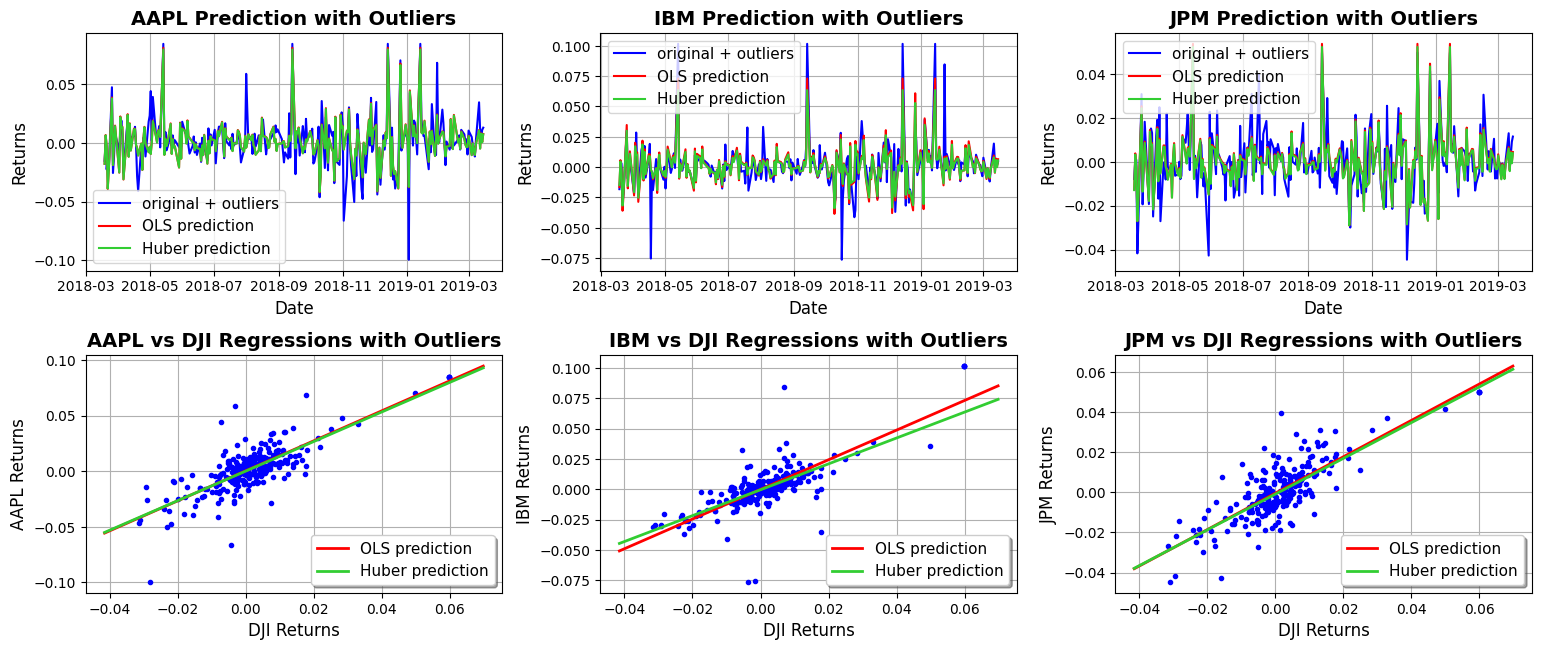

In [20]:
comparison(returns, ols_regressor, huber_regressor, outliers)

From the above table, it can be observed that the Huber regression displays a more robust behavior to the abrupt changes in returns as the model parameters remain relatively constant. There is a more significant impact on the OLS regressor coefficients.

### 4.4 Robust Trading Strategies

#### 4.4.1 Moving Average Crossover

In [38]:
np.random.seed(1)

adj_close_data = pd.DataFrame(columns = symbols)
adj_close_outliers = pd.DataFrame(columns = symbols)

for symbol in symbols:
    adj_close_data[symbol] = data[symbol]['Adj Close'].copy()

    adj_close_outliers[symbol] = adj_close_data[symbol].copy()
    outlier_price = adj_close_data[symbol].max() - adj_close_data[symbol].mean() 
    for i in range(0, 250, 25):
        adj_close_outliers[symbol][i] += float([-2,2][np.random.randint(0, 2)] * outlier_price)
    

In [39]:
similarity = pd.DataFrame(index=symbols, columns=["Moving Average", "Moving Median"])

def strategy(method, similarity): 
    fig, ax = plt.subplots(4,2, figsize = (14,16))
    fig.tight_layout(pad=5)
    for i, symbol in enumerate(symbols):
        
        decision = []
        outliers_decision = []

        # labels 
        ma_20_label = 'MA 20' if method == 'Mean' else 'MM 20'
        ma_50_label = 'MA 50' if method == 'Mean' else 'MM 20'

        for j, adj_data in enumerate([adj_close_data, adj_close_outliers]):
            close_data = adj_data[symbol].dropna()
            ma_20 = close_data.rolling(20).mean() if method == 'Mean' else close_data.rolling(20).median()
            ma_50 = close_data.rolling(50).mean() if method == 'Mean' else close_data.rolling(50).median()
            ma_buy = np.sign((ma_20 - ma_50).dropna())

            ax[i][j].plot(close_data[ma_buy.index[0]:], color = 'b', label = 'Adj Close')
            ax[i][j].plot(ma_20[ma_buy.index[0]:] , color = 'g', label = ma_20_label)
            ax[i][j].plot(ma_50[ma_buy.index[0]:] , color = 'r', label = ma_50_label)


            crossover_points = []
            for k,point in enumerate(ma_buy.index[:-1]):
                if k == 0 or k == len(ma_buy.index[:-1])-1 or (ma_buy[point] + ma_buy.iloc[k+1])**2 < 2:
                    crossover_points.append((point, ma_buy.iloc[k+1]))

            count1 = 0
            count2 = 0
            for k, pointAndSign in enumerate(crossover_points[:-1]):
                point, sign = pointAndSign
                color = 'g' if sign > 0 else 'r'
                label = 'Buy' if sign > 0 else 'Sell'

                if (label == 'Buy' and count1 == 0):
                    ax[i][j].axvline(x = point, alpha = 0.6, color=color, linewidth = 2, linestyle = '--', label = label)
                    ax[i][j].axvspan(point, crossover_points[k+1][0], color=color, alpha=0.1, lw=0)
                    count1 += 1
                elif (label == 'Sell' and count2 == 0):
                    ax[i][j].axvline(x = point, alpha = 0.6, color=color, linewidth = 2, linestyle = '--', label = label)
                    ax[i][j].axvspan(point, crossover_points[k+1][0], color=color, alpha=0.1, lw=0)
                    count2 += 1
                else:
                    ax[i][j].axvline(x = point, alpha = 0.6, color=color, linewidth = 2, linestyle = '--')
                    ax[i][j].axvspan(point, crossover_points[k+1][0], color=color, alpha=0.1, lw=0)


            outliers = "(outliers)" if j == 1 else ""
            avg = "Average" if method == 'Mean' else "Median"
            ax[i][j].set_title(f'{symbol} Moving {avg} {outliers}', fontsize = 14, fontweight = 'bold')
            ax[i][j].set_xlabel('Date', fontsize = 12, fontweight = 'normal')
            ax[i][j].set_ylabel('Price', fontsize = 12, fontweight = 'normal')
            ax[i][j].set_xticklabels(ax[i][j].get_xticklabels(), rotation=20, horizontalalignment='right')
            ax[i][j].legend(fontsize = 11, fancybox=True, shadow=True)

            if j == 0:
                decision = ma_buy 
            else:
                outliers_decision = ma_buy

        if method == 'Mean':
            similarity.loc[symbol]['Moving Average'] = len(outliers_decision[outliers_decision == decision]) / len(decision) * 100
        elif method == 'Median':
            similarity.loc[symbol]['Moving Median'] = len(outliers_decision[outliers_decision == decision]) / len(decision) * 100

    fig.savefig(('Section 4/4_4_'+ method +'_strategy.pdf'), bbox_inches='tight')

    return similarity


Moving Average Moving Median
AAPL      93.564356           NaN
IBM       83.663366           NaN
JPM        90.09901           NaN
DJI       98.514851           NaN

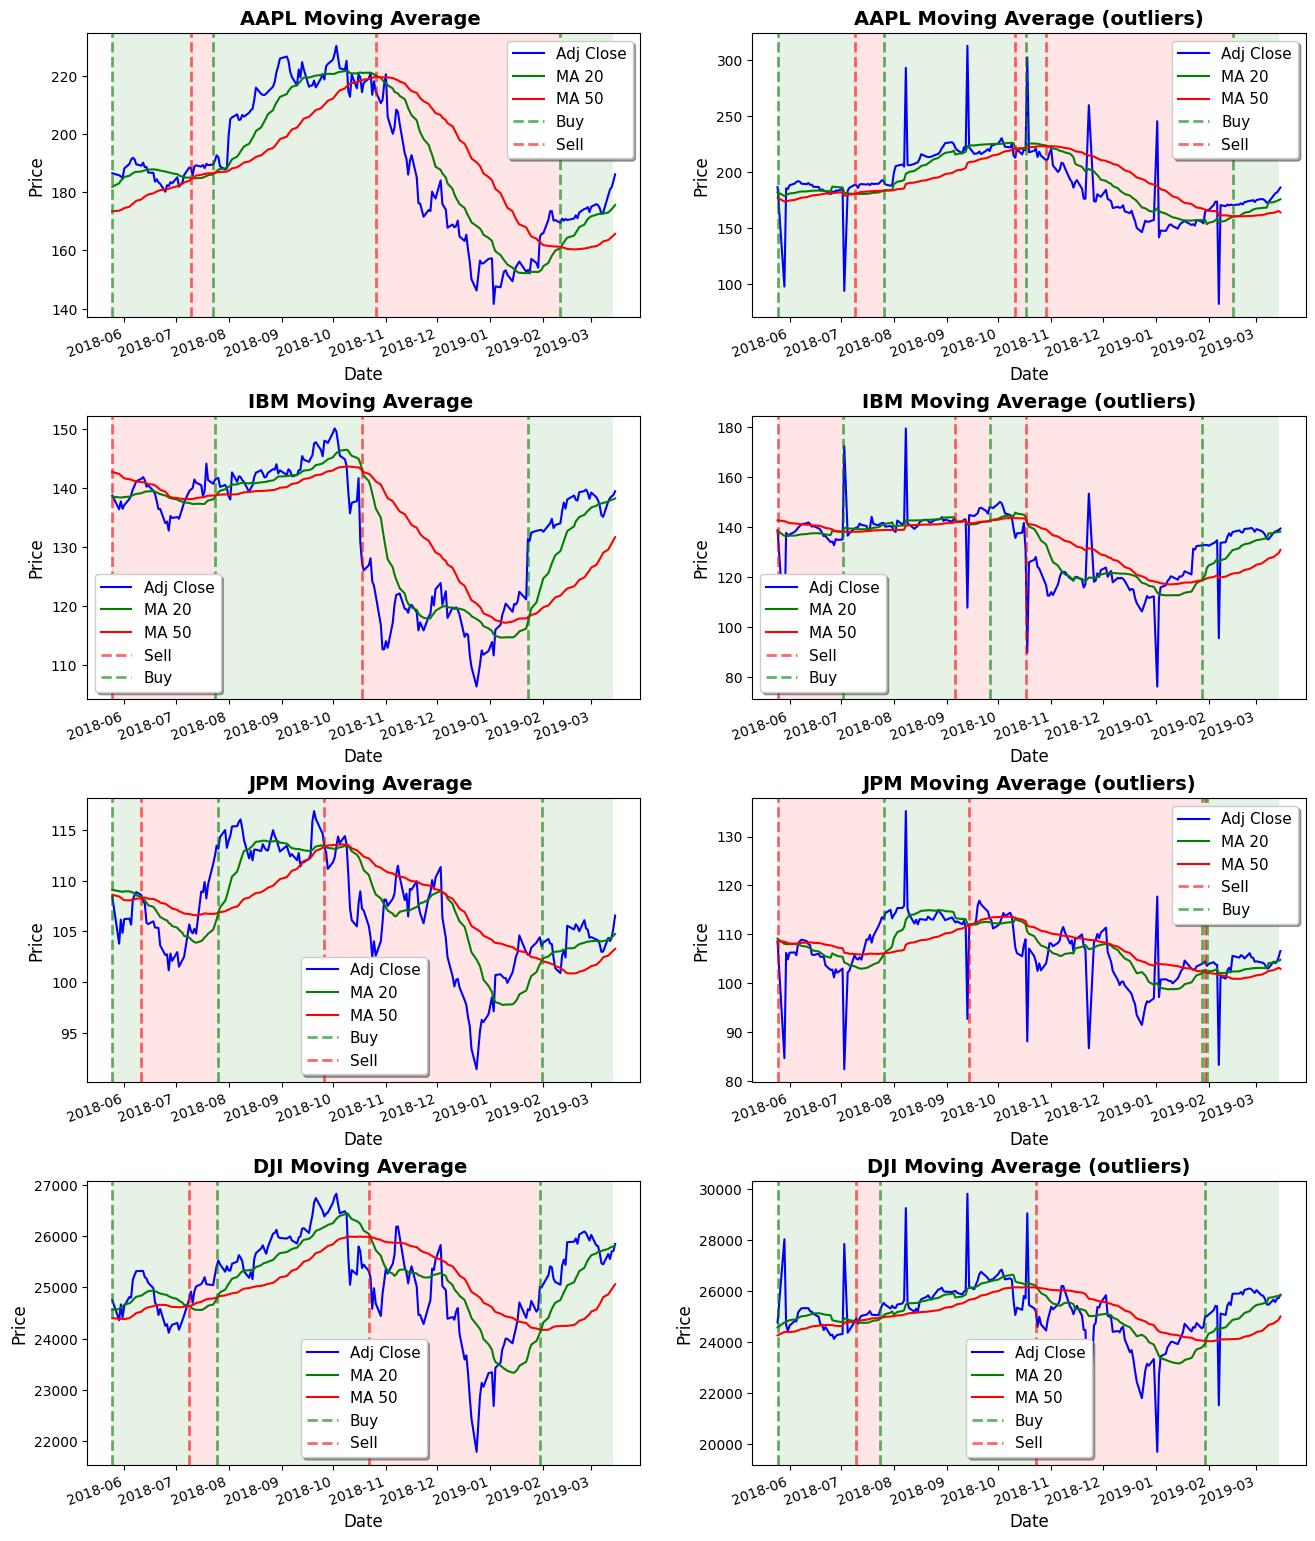

In [40]:
strategy('Mean', similarity)

The presence of artificial outliers has a significant impact on the moving average crossover strategy.
This is an expected behavior since the mean is not a robust descriptive statistic and
is susceptible to abrupt changes in the data

#### 4.4.2 Moving Median Crossover

Moving Average Moving Median
AAPL      93.564356     98.514851
IBM       83.663366     98.019802
JPM        90.09901      99.50495
DJI       98.514851     99.009901

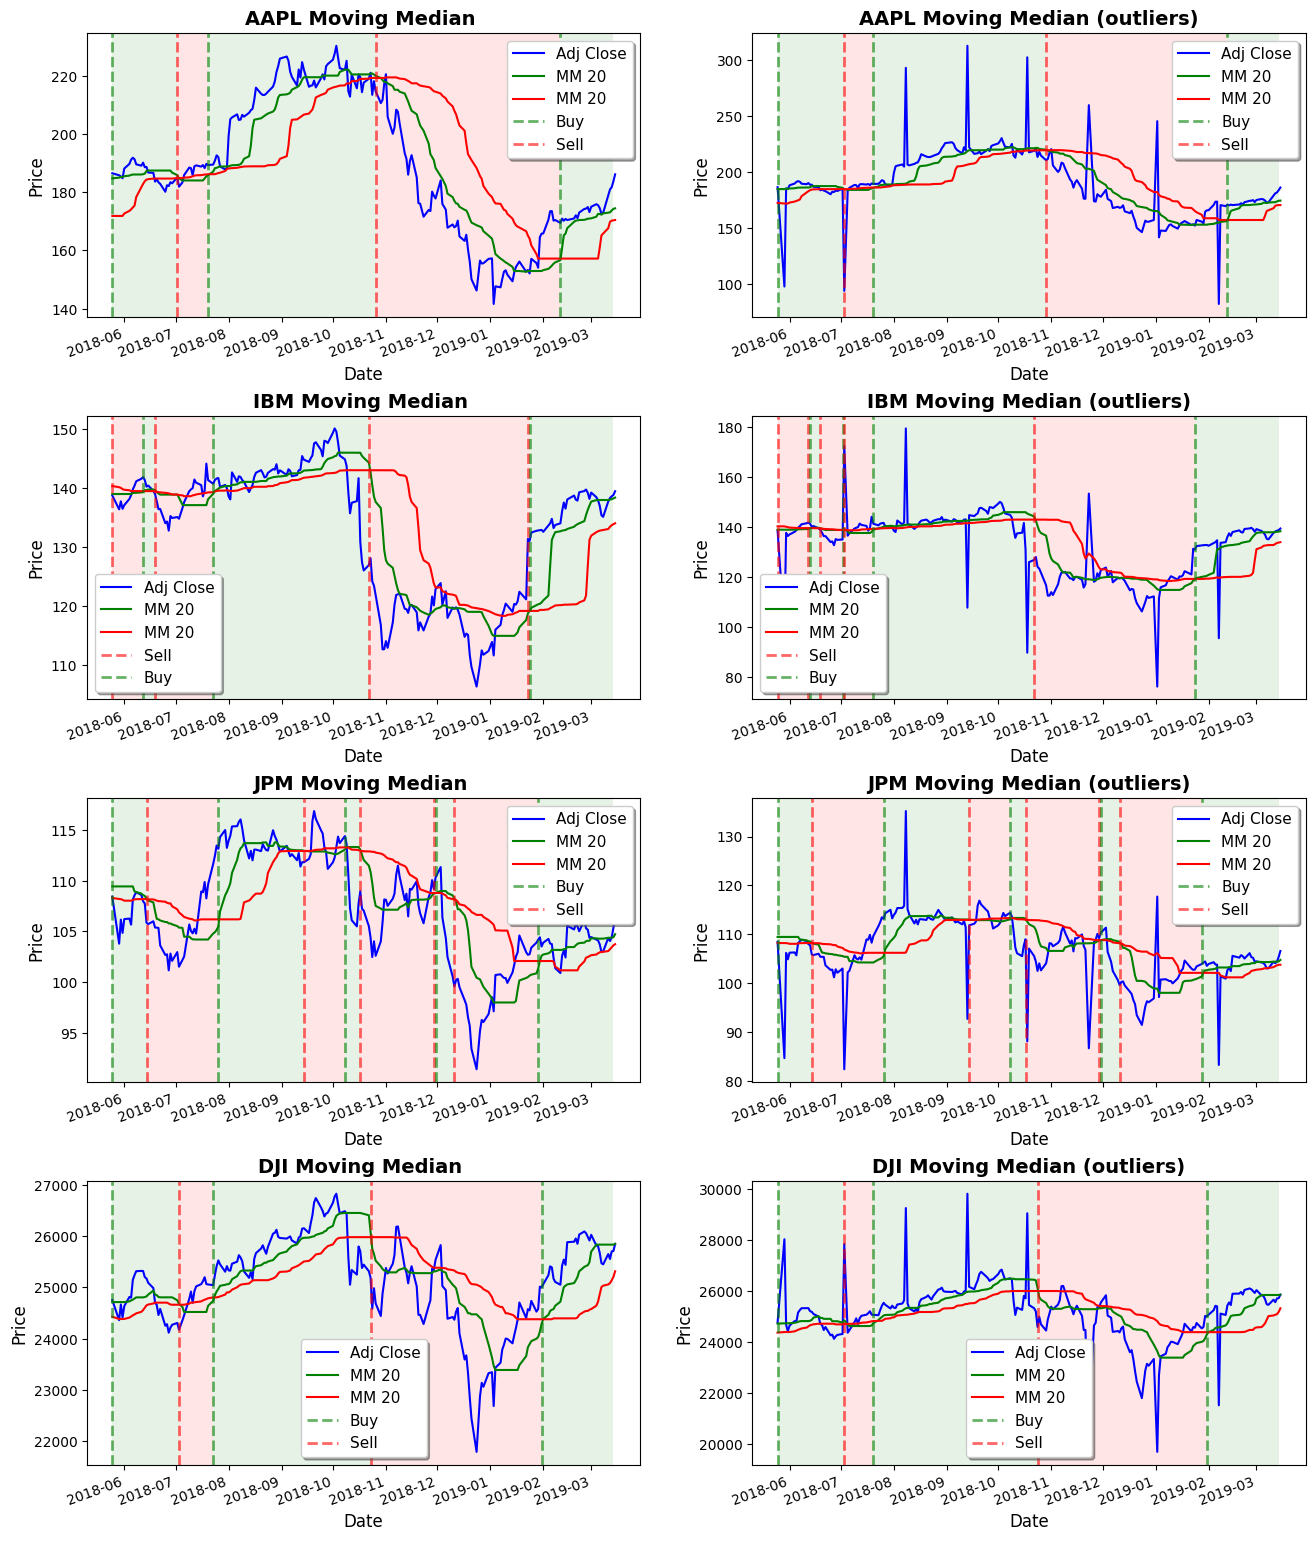

In [41]:
strategy('Median', similarity)

The moving median strategy applied to the corrupted data presents more overlapping to the real data, thus providing almost identical buy and sell decisions.

## 5. Graphs in Finance

### 5.1 S&P 500 Stock Selection

Before running thsi section reset Python kernel 

In [249]:
# Section 5
import networkx as nx
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

# Data folder
data_path = "Data/"

In [2]:
snp_all = pd.read_csv(data_path + 'snp_allstocks_2015_2019.csv', header = 0, index_col = 0)
snp_info = pd.read_csv(data_path + 'snp_info.csv', index_col = 0)

In [187]:
symbols = ['GS', 'JPM', 'BLK', 'MS', 'AIG', 'COF', 'DFS', 'MET', 'USB', 'PNC']
#symbols = ['GS', 'JPM', 'BLK', 'MS', 'STT', 'COF', 'DFS', 'MET', 'USB', 'PNC']
#symbols = ['GS', 'JPM', 'BLK', 'MS', 'C', 'BAC', 'USB', 'WFC', 'SCHW', 'PNC']
chosen_assets = snp_info.copy().set_index('Symbol').loc[symbols]

stocks = chosen_assets.index
returns = np.log(snp_all[stocks]).diff(1).dropna() 

display(chosen_assets)

Security SEC filings GICS Sector  \
Symbol                                                         
GS               Goldman Sachs Group     reports  Financials   
JPM             JPMorgan Chase & Co.     reports  Financials   
BLK                        BlackRock     reports  Financials   
MS                    Morgan Stanley     reports  Financials   
AIG     American International Group     reports  Financials   
COF            Capital One Financial     reports  Financials   
DFS      Discover Financial Services     reports  Financials   
MET                     MetLife Inc.     reports  Financials   
USB                     U.S. Bancorp     reports  Financials   
PNC           PNC Financial Services     reports  Financials   

                       GICS Sub Industry     Headquarters Location  \
Symbol                                                               
GS        Investment Banking & Brokerage        New York, New York   
JPM                    Diversified Banks        New York, New York   
BLK     Asset Management & Custody Banks        New York, New York   
MS        Investment Banking & Brokerage        New York, New York   
AIG        Property & Casualty Insurance        New York, New York   
COF                     Consumer Finance   Tysons Corner, Virginia   
DFS                     Consumer Finance      Riverwoods, Illinois   
MET              Life & Health Insurance        New York, New York   
USB                    Diversified Banks    Minneapolis, Minnesota   
PNC                       Regional Banks  Pittsburgh, Pennsylvania   

       Date first added[3][4]      CIK Founded  
Symbol                                          
GS                 2002-07-22   886982     NaN  
JPM                1975-06-30    19617     NaN  
BLK                2011-04-04  1364742     NaN  
MS                        NaN   895421    1935  
AIG                1980-03-31     5272    1919  
COF                1998-07-01   927628    1935  
DFS                2007-07-02  1393612     NaN  
MET                       NaN  1099219    1868  
USB                       NaN    36104    1968  
PNC                1988-04-30   713676     NaN

The 10 selected stocks  from the S&P 500 are from the GICS sector of "Financials" and with their headquarters in the East Coast of the US. The overall motivation for selecting these stocks is their strong market position, well-established brands, and diversified product and service offerings within the financial sector. These companies represent a mix of banking, investment services, credit, insurance, and asset management firms. They benefit from a combination of factors such as economic growth, increasing consumer spending, and the global trend toward digital payments. 

### 5.2 Graphs based on Correlation Matrix

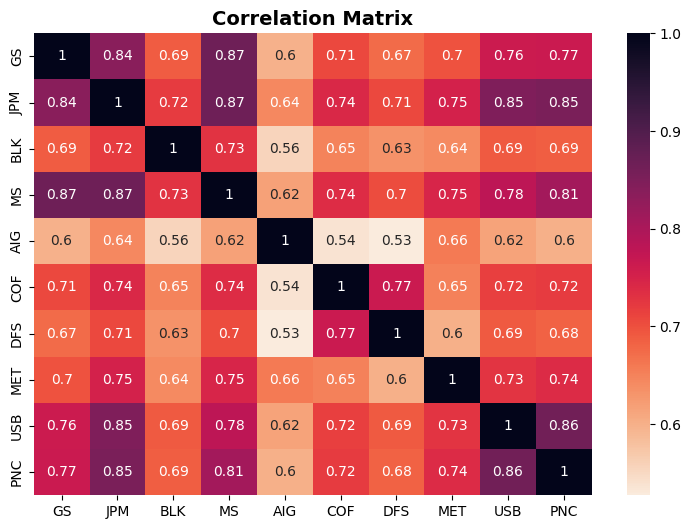

In [213]:
cmap = sns.color_palette("rocket_r", as_cmap=True) # plt.cm.GnBu  

corr = returns.corr()

fig = plt.figure(figsize=(9,6))
sns.heatmap(corr, annot=True, cmap=cmap)
plt.title('Correlation Matrix', fontsize = 14, fontweight = 'bold')
fig.savefig(('Section 5/5_2_corr_matrix.pdf'), bbox_inches='tight')

/var/folders/w7/0yztbh_d3xb2zjyb8sy29q000000gn/T/ipykernel_13226/1104985044.py:18: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


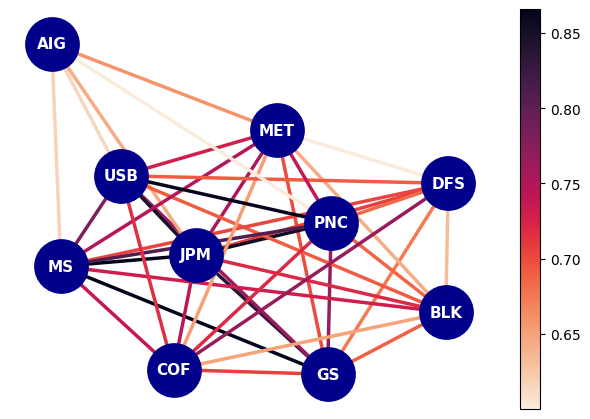

In [217]:
links = corr.stack().reset_index()
links.columns = ['var1', 'var2', 'value']

links_filtered=links.loc[ (links['value'] > 0.6) & (links['var1'] != links['var2']) ]
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')

weights = []
for var1, var2 in G.edges:
    idx1 = links.index[links['var1'] == var1].tolist()
    idx2 = links.index[links['var2'] == var2].tolist()
    intx = list(set(idx1).intersection(idx2))
    if len(intx) == 0: weights.append(0)
    else: weights.append(links.loc[intx[0]].value)

fig = plt.figure(figsize=(6,4))
nx.draw(G, pos = nx.spring_layout(G), with_labels=True, node_color='darkblue', node_size=1400, edgelist = G.edges, edge_cmap = cmap, edge_color=weights, linewidths=2, width = 2.5, font_color='white', font_size = 11, font_weight = 'bold')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min(weights), vmax=max(weights)))
cbar = plt.colorbar(sm)
fig.savefig(('Section 5/5_2_graph_corr.pdf'), bbox_inches='tight')

The edges connecting the node (stocks) are colour-coded based on their correlation, with darker colors indicating stronger correlations between assets. Companies such as Morgan Stanley (MS), J.P. Morgan (JPM) Goldman Sachs (GS) and PNC, hold a central position and show strong correlation amongst themselves as well as numerous connections with other companies reflecting the diversified nature of their business operations. Since they have divisions such as investment banking, asset management, brokerage, they are correlated with most companies in the Financials sector. On the other hand, companies are less linked with the others given their business activities such such as American International Group (AIG) that is related to insurance, thus it less prone to interactions with the other firms and exhibits lower correlation. Additionally, this is also an indicator that their market presence might not be as substantial as the other companies'.

### 5.3 Correlation graph analysis

/var/folders/w7/0yztbh_d3xb2zjyb8sy29q000000gn/T/ipykernel_13226/3775555181.py:20: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


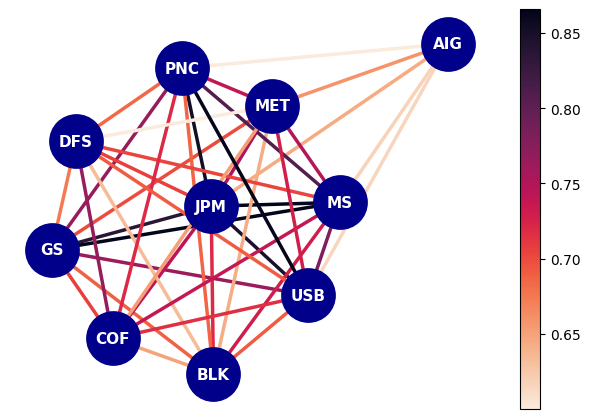

In [224]:
corr = returns.sample(frac=1, axis=0).corr()

links = corr.stack().reset_index()
links.columns = ['var1', 'var2', 'value']

links_filtered=links.loc[ (links['value'] > 0.6) & (links['var1'] != links['var2']) ]
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')

weights = []
for var1, var2 in G.edges:
    idx1 = links.index[links['var1'] == var1].tolist()
    idx2 = links.index[links['var2'] == var2].tolist()
    intx = list(set(idx1).intersection(idx2))
    if len(intx) == 0: weights.append(0)
    else: weights.append(links.loc[intx[0]].value)

fig = plt.figure(figsize=(6,4))
nx.draw(G, with_labels=True, node_color='darkblue', node_size=1400, edgelist = G.edges, edge_cmap = cmap, edge_color=weights, linewidths=2, width = 2.5, font_color='white', font_size = 11, font_weight = 'bold')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min(weights), vmax=max(weights)))
cbar = plt.colorbar(sm)

fig.savefig(('Section 5/5_3_graph_reorder.pdf'), bbox_inches='tight')

Re-ordering of the graph vertices or the re-ordering of the timer-series would
not affect the structure of the graph. This is because the graph is based on the correlation matrix and correlation is independent of data reordering since it measures the similarity of the assets. Hence, re-ordering the vertices would change the positions of the stocks in the matrix but not their values, thus the graph would is unchanged. 

### 5.4 Graphs based on Dynamic Time Warping Matrix

Dynamic Time Warping (DTW) provides the similarity between two temporal sequences, and find optimal alignments even if the sequences have different speeds or are shifted in time. When using euclidean distance as a measure, DTW calculates the shortest (or least cost) path that matches the points of the two series.

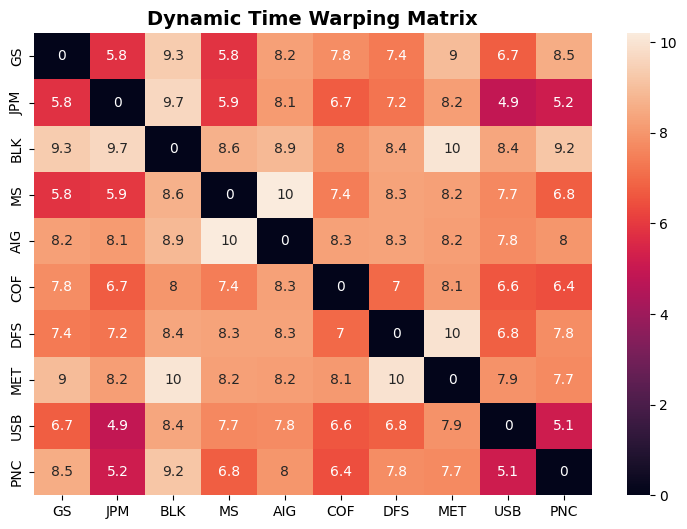

In [238]:
cmap = sns.color_palette("rocket", as_cmap=True)

dtw_matrix = corr.copy()
for i in returns.columns:
    for j in returns.columns:
        dist, _ = fastdtw(returns[i], returns[j], dist=euclidean)
        dtw_matrix[i][j] = dist

fig = plt.figure(figsize=(9,6))
sns.heatmap(dtw_matrix, annot=True, cmap=cmap)
plt.title('Dynamic Time Warping Matrix', fontsize = 14, fontweight = 'bold')
fig.savefig(('Section 5/5_4_dtw_matrix.pdf'), bbox_inches='tight')

/var/folders/w7/0yztbh_d3xb2zjyb8sy29q000000gn/T/ipykernel_13226/834032791.py:18: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


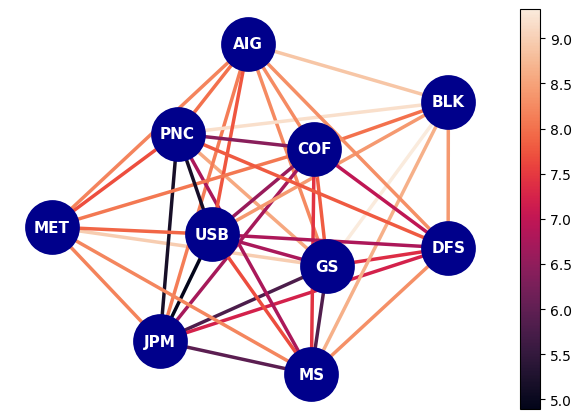

In [240]:
links = dtw_matrix.stack().reset_index()
links.columns = ['var1', 'var2', 'value']

links_filtered=links.loc[ (links['value'] < 9.5) & (links['var1'] != links['var2']) ]
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')

weights = []
for var1, var2 in G.edges:
    idx1 = links.index[links['var1'] == var1].tolist()
    idx2 = links.index[links['var2'] == var2].tolist()
    intx = list(set(idx1).intersection(idx2))
    if len(intx) == 0: weights.append(0)
    else: weights.append(links.loc[intx[0]].value)

fig = plt.figure(figsize=(6,4))
nx.draw(G, with_labels=True, node_color='darkblue', node_size=1400, edgelist = G.edges, edge_cmap = cmap, edge_color=weights, linewidths=2, width = 2.5, font_color='white', font_size = 11, font_weight = 'bold')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min(weights), vmax=max(weights)))
cbar = plt.colorbar(sm)

fig.savefig(('Section 5/5_4_graph_dtw.pdf'), bbox_inches='tight')

Darker edges indicate stronger similarities between assets. Once again, it is possible to observe companies like GS, JPM, MS, and PNC being more connected than AIG.

/var/folders/w7/0yztbh_d3xb2zjyb8sy29q000000gn/T/ipykernel_13226/1055767389.py:36: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


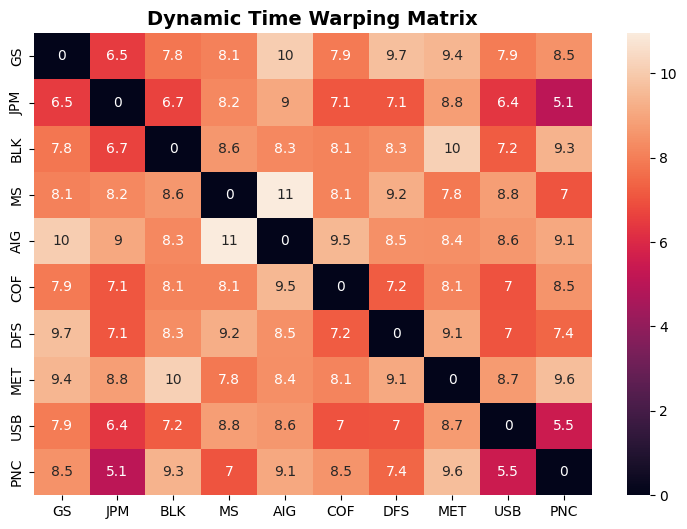

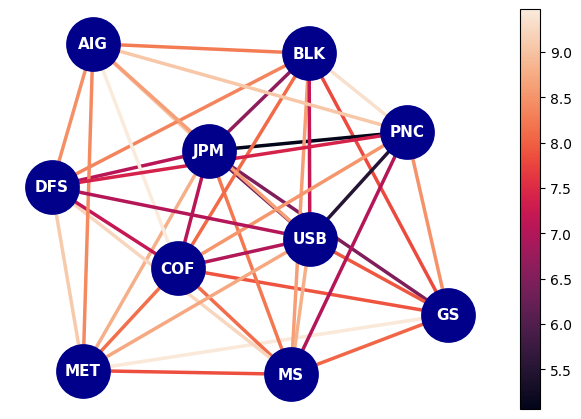

In [234]:
shuffle_returns = returns.sample(frac=1, axis=0)
dtw_matrix_shuffled = shuffle_returns.corr()

for i in shuffle_returns.columns:
    for j in shuffle_returns.columns:
        dist, _ = fastdtw(shuffle_returns[i], shuffle_returns[j], dist=euclidean)
        dtw_matrix_shuffled[i][j] = dist

fig = plt.figure(figsize=(9,6))
sns.heatmap(dtw_matrix_shuffled, annot=True, cmap=cmap)
plt.title('Dynamic Time Warping Matrix', fontsize = 14, fontweight = 'bold')
fig.savefig(('Section 5/5_4_dtw_matrix_shuffled.pdf'), bbox_inches='tight')

for i in shuffle_returns.columns:
    for j in shuffle_returns.columns:
        dist, _ = fastdtw(shuffle_returns[i], shuffle_returns[j], dist=euclidean)
        dtw_matrix[i][j] = dist

links = dtw_matrix.stack().reset_index()
links.columns = ['var1', 'var2', 'value']

links_filtered=links.loc[ (links['value'] < 9.5) & (links['var1'] != links['var2']) ]
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')

weights = []
for var1, var2 in G.edges:
    idx1 = links.index[links['var1'] == var1].tolist()
    idx2 = links.index[links['var2'] == var2].tolist()
    intx = list(set(idx1).intersection(idx2))
    if len(intx) == 0: weights.append(0)
    else: weights.append(links.loc[intx[0]].value)

fig = plt.figure(figsize=(6,4))
nx.draw(G, with_labels=True, node_color='darkblue', node_size=1400, edgelist = G.edges, edge_cmap = cmap, edge_color=weights, linewidths=2, width = 2.5, font_color='white', font_size = 11, font_weight = 'bold')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min(weights), vmax=max(weights)))
cbar = plt.colorbar(sm)

fig.savefig(('Section 5/5_4_graph_dtw_shuffled.pdf'), bbox_inches='tight')

DTW is dependent on the time-series data order, therefore reshuffling the assets returns would change the resulting graph. As seen from the DFT matrix and resulting graph, the relationships between the stocks changed drastically. 

### 5.5 Raw Prices analysis

In the previous sections, log returns were used instead of raw prices. As it was discussed in Section 1, raw prices are not stationary and often contain trending components for a given asset, often upward. Therefore the graphs would represent the relationships between the upward trends of the stocks, which would have more correlated values, rather than finding patterns in price fluctuations within the sector. The results obtained would contain little information about the general patterns and would not present the intrinsic relationships and connections between the companies. 